In [1]:
# Importamos las librerias necesarias
from Busquedas import *
import datetime
import pymongo
from pymongo import MongoClient
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Descarga de Datos

## 1.1 Conexion y descarga de datos desde Instancia de BBDD NoSQL MongoDB

In [2]:
# Autentificacion
def auth_mongo(username, password, database):
    
    # Conexion con BD NoSQL MongoDB - Creacion de BD y Colección

    username_url = urllib.parse.quote_plus(username)
    password_url = urllib.parse.quote_plus(password)

    # Fuera de GCP - Direccion Ip Externa
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    # Dentro de GCP - Direccion Ip Interna
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    url = 'mongodb://%s:%s@3XXXX:XXXX/'+database # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    try: 
        client = MongoClient(url % (username_url, password_url))
        print("Conectado satisfactoriamente!!!") 
    except:   
        print("No se logro conectar a MongoDB")
    return client

# Extraer datos de mongo
def extract_mongo(client, database, collection_name):
    
    try:
        db = client[database]
        collection = db[collection_name]
        info = collection.find()
        df = pd.DataFrame(list(info))
        df.drop_duplicates('id_post', inplace=True)
        df['reactions_count'] = df['reactions_count'].astype(int)
        df['date'] = df['date'].astype('datetime64[ns]')
        print("Los datos de la coleccion %s de la base de datos %s fueron extraidos satisfactoriamente!" %(collection_name, database))
    
    except:
        print("Los datos de la coleccion %s de la base de datos %s NO fueron extraidos" %(collection_name, database))
    
    return df

# Insertar un dataframe en mongo
def insert_mongo (client, database, collection_name, df):
    
    try:
        db = client[database]
        collection = db[collection_name]
        data_dict = df.to_dict("records")
        collection.insert_many(data_dict)
        print("Los datos fueron insertados correctamente en la coleccion %s, de la base de datos %s." %(collection_name, database))
    
    except:
        print("Los datos NO fueron insertados en la coleccion %s, de la base de datos %s." %(collection_name, database))
    

In [3]:
# Definicion de parametros de descarga
database = 'GNN'
client = auth_mongo('XXXX', 'XXXX', database)   # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
clave = 'fvf'

Conectado satisfactoriamente!!!


In [4]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
# df = extract_mongo(client, database, 't_fvf_progephi_merge') 
# df = extract_mongo(client, database, 't_fvf_indice_influencia_v1') ## (Antes)
df = extract_mongo(client, database, 't_fvf_indice_influencia_v3') ## (Ahora)
df.shape

Los datos de la coleccion t_fvf_indice_influencia_v3 de la base de datos GNN fueron extraidos satisfactoriamente!


(7369, 108)

In [5]:
df.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name',
       ...
       'Y', 'Size', 'Color', 'count_user', 'reactions_name', 'tipo_usuario',
       'pageranks_desnormalizado', 'aceptacion_50_pct', 'relacion_50_pct',
       'indice_influencia'],
      dtype='object', length=108)

# 2. Preparacion de los datos - dftotal

## 2.1 AED 

In [6]:
df.head()

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,Y,Size,Color,count_user,reactions_name,tipo_usuario,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,NaN,NaN,0,...,0.400068,0.108221,#c0c0c0,64,0,0,0.5057,0.09375,26.29640,26.39015
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,NaN,NaN,0,...,0.699044,0.001041,#36ae00,3,klon_perez,2,0.0044,0.00000,0.00220,0.00220
2,6442ae573c00c6c014a4798d,2023-04-20 23:54:41,1649199942404022274,1649199942404022274,rt __ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,Twitter for Android,False,NaN,NaN,0,...,0.452327,0.002081,#00b2e6,3,SOLOVENEX_,2,0.0044,0.00000,0.00440,0.00440
3,6442ae573c00c6c014a4798e,2023-04-20 23:54:01,1649199776104161283,1649199776104161283,rt Somos mundialistas!!!!!\n\nFelicitaciones! Chamos.\n\n@SeleVinotinto @FVF_Oficial @LigaFUTVE @LigaFUTVE2 https://t.co/XTUeILmJaX,Twitter for Android,False,NaN,NaN,0,...,0.431104,0.002081,#c0c0c0,6,dosisdepor710,2,0.0044,0.00000,0.00440,0.00440
4,6442ae573c00c6c014a47990,2023-04-20 23:52:47,1649199465822142464,1649199465822142464,"rt ¡En La Guaira inició un sueño! 😍🇻🇪\n\nEste jueves 20 de abril, el presidente de la #FVF, 𝗝𝗼𝗿𝗴𝗲 𝗚𝗶𝗺𝗲́𝗻𝗲𝘇 (@jandresgimenez), inauguró oficialmente la cancha de fútbol de Camurí Chico, en el estado La Guaira, como parte del proyecto 24 asociaciones - 24 canchas. https://t.co/AQjr5lfar9",Twitter for Android,False,NaN,NaN,0,...,0.889447,0.003122,#da5ed6,4,FVF_Oficial,1,0.0049,0.00000,0.00735,0.00735


In [7]:
# Verificar que columnas son de tipo diccionario
is_dict = df.applymap(lambda x: isinstance(x, dict))
print(is_dict)

        _id  created_at  id_post  id_str  message  source  truncated  \
0     False       False    False   False    False   False      False   
1     False       False    False   False    False   False      False   
2     False       False    False   False    False   False      False   
3     False       False    False   False    False   False      False   
4     False       False    False   False    False   False      False   
...     ...         ...      ...     ...      ...     ...        ...   
7364  False       False    False   False    False   False      False   
7365  False       False    False   False    False   False      False   
7366  False       False    False   False    False   False      False   
7367  False       False    False   False    False   False      False   
7368  False       False    False   False    False   False      False   

      in_reply_to_status_id  in_reply_to_user_id  in_reply_to_screen_name  \
0                     False                False          

In [8]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_dict.sum().sort_values(ascending=False)[:10]

_id                  0
link_user            0
enlaces              0
message_clean        0
country              0
country_code         0
full_name            0
category             0
word                 0
frecuencia_fuente    0
dtype: int64

In [9]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 'extended_entities', 'bounding_box', 'attributes']

In [10]:
df_ = df.loc[:, ~df.columns.isin(col_dict)]
df_.shape

(7369, 108)

In [11]:
# Verificar que columnas son de tipo lista
is_list = df_.applymap(lambda x: isinstance(x, list))
print(is_list)

        _id  created_at  id_post  id_str  message  source  truncated  \
0     False       False    False   False    False   False      False   
1     False       False    False   False    False   False      False   
2     False       False    False   False    False   False      False   
3     False       False    False   False    False   False      False   
4     False       False    False   False    False   False      False   
...     ...         ...      ...     ...      ...     ...        ...   
7364  False       False    False   False    False   False      False   
7365  False       False    False   False    False   False      False   
7366  False       False    False   False    False   False      False   
7367  False       False    False   False    False   False      False   
7368  False       False    False   False    False   False      False   

      in_reply_to_status_id  in_reply_to_user_id  in_reply_to_screen_name  \
0                     False                False          

In [12]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_list.sum().sort_values(ascending=False)[:10]

citas                 7369
emojis                7369
enlaces               7369
hashtags              7369
profile_image_url        0
link_retweet             0
profile_text_color       0
message_clean            0
country                  0
country_code             0
dtype: int64

In [13]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 
            'extended_entities', 'bounding_box', 'attributes', 'urls', 'withheld_in_countries', 'matching_rules', 'user_mentions', 
            'symbols', 'hashtags', 'display_text_range', 'media']

In [14]:
df_ = df.loc[:, ~df.columns.isin(col_dict)]
df_.shape

(7369, 107)

### 2.1.1 Valores Duplicados

In [16]:
# df_[df_.duplicated()] # Verificar si hay datos duplicados, unicamente funciona para df con variables numericas

### 2.1.2 Valores Faltantes 

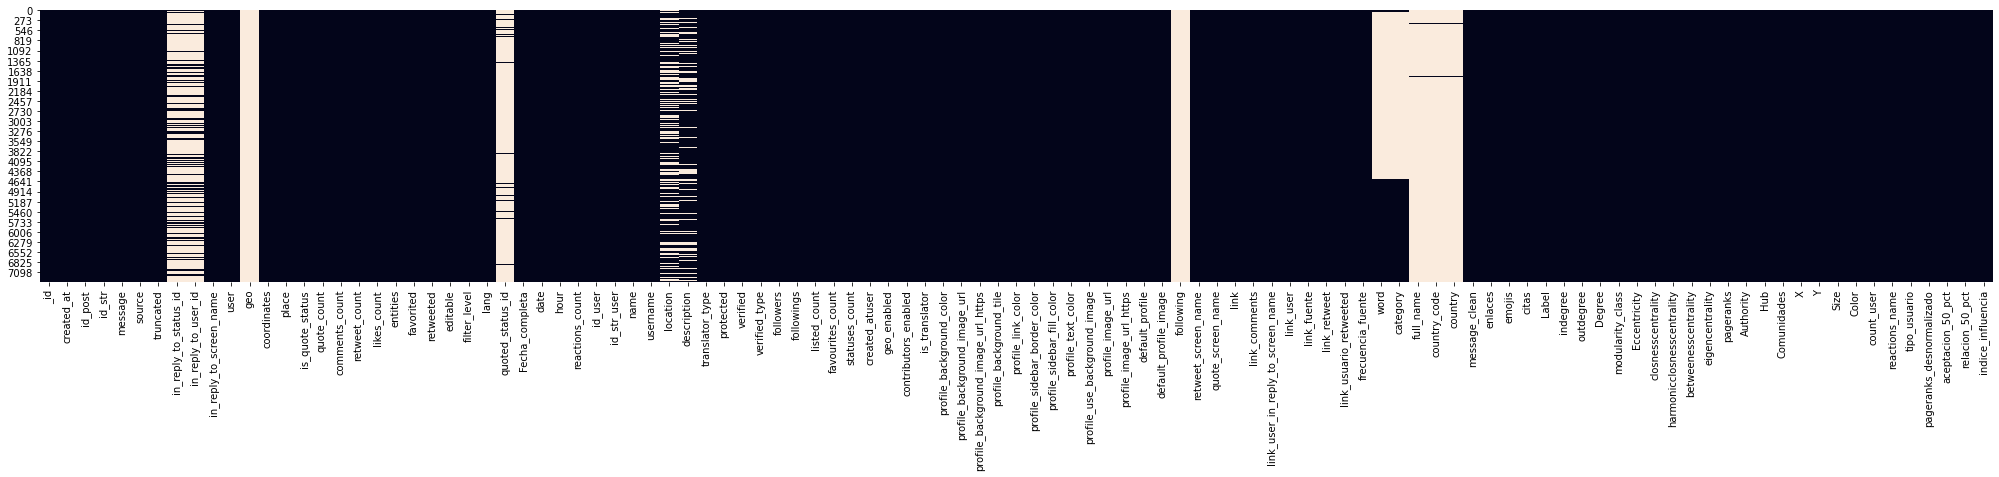

In [189]:
plt.figure(figsize=(35,5))
sns.heatmap(df_.isnull(), cbar=False)
plt.show()

In [17]:
df_.shape

(7369, 107)

In [18]:
# Numero de valores faltantes por variable
df_.isna().sum().sort_values(ascending=False)[:40]

following                            7369
geo                                  7369
country_code                         7294
full_name                            7294
country                              7294
quoted_status_id                     6978
in_reply_to_status_id                5595
in_reply_to_user_id                  5544
word                                 4504
category                             4504
location                             2442
description                          1461
_id                                     0
link_usuario_retweeted                  0
message_clean                           0
enlaces                                 0
frecuencia_fuente                       0
link_fuente                             0
link_retweet                            0
citas                                   0
link_user                               0
link_user_in_reply_to_screen_name       0
link_comments                           0
link                              

In [19]:
df_['pageranks'].describe()

count    7369.000000
mean        0.000824
std         0.003787
min         0.000044
25%         0.000044
50%         0.000044
75%         0.000120
max         0.033240
Name: pageranks, dtype: float64

In [20]:
df_[df_.pageranks.isna()][['username', 'retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name','followers', 'followings', 'tipo_usuario','count_user', 'retweet_count', 'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia','indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality','pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color']]

,username,retweet_screen_name,quote_screen_name,in_reply_to_screen_name,followers,followings,tipo_usuario,count_user,retweet_count,Degree,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color


In [21]:
df_[df_.pageranks.isna()][['username', 'retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name','followers', 'followings', 'tipo_usuario','count_user', 'retweet_count', 'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia','indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality','pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size','Color']].index

Int64Index([], dtype='int64')

In [22]:
df_[df_[['pageranks']].isna()][['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']]

,indegree,outdegree,Degree,modularity_class,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Nota: en gephi se eliminaron los usuarios o las cuentas pertenecientes a la FVF**
1. @FVF_Oficial (*, **, ***, ****)
2. @SeleVinotinto
3. @FemeninoFVF (*, ***)
4. @juvenilesfvf (***, ****)
5. @FutsalFVF
6. @vinotintoplaya
7. @FVFeSports (*)

+ (*) -> Presente en los datos recolectados (username)
+ (**) -> Presente en los datos recolectados (retweet_screen_name)
+ (***) -> Presente en los datos recolectados (in_reply_to_screen_name)
+  (****) -> Presente en los datos recolectados (quote_screen_name)

In [23]:
df_.loc[df_['username'].str.contains('fvf', case=False)][['username']]

,username
1173,fvfbff
1396,fvfbff
4215,fvfbff
4330,fvfbff
4337,fvfbff
5057,fvfbff
5058,fvfbff
5618,fvfbff
5712,fvfbff


In [24]:
df_[['username','retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name']]

,username,retweet_screen_name,quote_screen_name,in_reply_to_screen_name
0,foro_todofutbol,0,0,0
1,miguel28gangel,klon_perez,0,0
2,RichardZapata8,SOLOVENEX_,0,0
3,correajorge,dosisdepor710,CONMEBOL,0
4,LeafarPetit,FVF_Oficial,0,0
...,...,...,...,...
7364,javisu2272,0,0,Karlapgil
7365,carlospa200,Karlapgil,0,0
7366,wagg321,Karlapgil,0,0
7367,Gustavo_BHR,Karlapgil,0,0


In [25]:
df_[['username','retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name']].isna().sum()

username                   0
retweet_screen_name        0
quote_screen_name          0
in_reply_to_screen_name    0
dtype: int64

In [26]:
df_[['username']].value_counts()

username       
pulidojorge        103
foro_todofutbol     64
DvoRayoZuliano      58
nuevodiaenlinea     56
raykar57            54
                  ... 
fcastro80            1
GletsyB              1
GranatesdelEste      1
Granggero            1
FFCM_es              1
Length: 2057, dtype: int64

In [27]:
df_[['retweet_screen_name']].value_counts()

retweet_screen_name
0                      3119
klon_perez              517
FVF_Oficial             328
delcyrodriguezv         315
Naranjazos10            232
                       ... 
elsiglocomve              1
EduardoSosa_F             1
TotEsport914              1
elextraditable9           1
emiliomedicen             1
Length: 330, dtype: int64

In [28]:
df_[['in_reply_to_screen_name']].value_counts()

in_reply_to_screen_name
0                          5546
pulidojorge                 180
klon_perez                  125
FVF_Oficial                  99
Naranjazos10                 73
                           ... 
MaeloGmz                      1
MGonzalez1994                 1
MARIOITALIA10                 1
MARIOEMD                      1
zuricht94                     1
Length: 625, dtype: int64

In [29]:
df_[['quote_screen_name']].value_counts()

quote_screen_name
0                    6979
klon_perez             44
Naranjazos10           23
martringut             20
FVF_Oficial            13
                     ... 
diarioas                1
edgarddeportes          1
MundoTachira            1
FranciscoNewsVe         1
SportsVZLA2             1
Length: 126, dtype: int64

In [30]:
df_.loc[df_['username'].str.contains('fvf', case=False, na=False)][['username']].value_counts()

username
fvfbff      9
dtype: int64

In [31]:
df_.loc[df_['retweet_screen_name'].str.contains('fvf', case=False, na=False)][['retweet_screen_name']].value_counts()

retweet_screen_name
FVF_Oficial            328
EFF_FVF                  8
FVF_Madrid               4
dtype: int64

In [32]:
df_.loc[df_['in_reply_to_screen_name'].str.contains('fvf', case=False, na=False)][['in_reply_to_screen_name']].value_counts()

in_reply_to_screen_name
FVF_Oficial                99
FVF_Arts                    6
juvenilesfvf                6
EFF_FVF                     3
irma_fvf                    2
dtype: int64

In [33]:
df_.loc[df_['quote_screen_name'].str.contains('fvf', case=False, na=False)][['quote_screen_name']].value_counts()

quote_screen_name
FVF_Oficial          13
juvenilesfvf          7
EFF_FVF               3
FVFgame               1
dtype: int64

**Nota: en gephi se eliminaron los usuarios o las cuentas pertenecientes a la FVF. Por esta razon procedemos a eliminar las filas correspondientes en las que se tienen valores NaN en las siguientes columnas:**
- 'indegree'
- 'outdegree'
- 'Degree'
- 'modularity_class'
- 'Eccentricity'
- 'closnesscentrality'
- 'harmonicclosnesscentrality'
- 'betweenesscentrality'
- 'eigencentrality'
- 'pageranks'
- 'Authority'
- 'Hub' 
- 'Comunidades'
- 'X'
- 'Y'
- 'Size',
- 'Color'

**Particularmente las columnas generadas o exportadas de Gephi**

In [34]:
df_.shape

(7369, 107)

In [35]:
# Verificamos las filas que contienen NaNs
df_.dropna(subset=['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']).reset_index(drop=True)

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,Y,Size,Color,count_user,reactions_name,tipo_usuario,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,NaN,NaN,0,...,0.400068,0.108221,#c0c0c0,64,0,0,0.5057,0.09375,26.29640,26.39015
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,NaN,NaN,0,...,0.699044,0.001041,#36ae00,3,klon_perez,2,0.0044,0.00000,0.00220,0.00220
2,6442ae573c00c6c014a4798d,2023-04-20 23:54:41,1649199942404022274,1649199942404022274,rt __ ¿VAMOS AL MUNDIAL?\n\n__ ¡𝗩𝗔𝗠𝗢𝗦 𝗔𝗟 𝗠𝗨𝗡𝗗𝗜𝗔𝗟!\n\nLa reacción tras el pitazo final: 😭🇻🇪\n\n.@juvenilesfvf • @FVF_Oficial https://t.co/WI56VgVH6o,Twitter for Android,False,NaN,NaN,0,...,0.452327,0.002081,#00b2e6,3,SOLOVENEX_,2,0.0044,0.00000,0.00440,0.00440
3,6442ae573c00c6c014a4798e,2023-04-20 23:54:01,1649199776104161283,1649199776104161283,rt Somos mundialistas!!!!!\n\nFelicitaciones! Chamos.\n\n@SeleVinotinto @FVF_Oficial @LigaFUTVE @LigaFUTVE2 https://t.co/XTUeILmJaX,Twitter for Android,False,NaN,NaN,0,...,0.431104,0.002081,#c0c0c0,6,dosisdepor710,2,0.0044,0.00000,0.00440,0.00440
4,6442ae573c00c6c014a47990,2023-04-20 23:52:47,1649199465822142464,1649199465822142464,"rt ¡En La Guaira inició un sueño! 😍🇻🇪\n\nEste jueves 20 de abril, el presidente de la #FVF, 𝗝𝗼𝗿𝗴𝗲 𝗚𝗶𝗺𝗲́𝗻𝗲𝘇 (@jandresgimenez), inauguró oficialmente la cancha de fútbol de Camurí Chico, en el estado La Guaira, como parte del proyecto 24 asociaciones - 24 canchas. https://t.co/AQjr5lfar9",Twitter for Android,False,NaN,NaN,0,...,0.889447,0.003122,#da5ed6,4,FVF_Oficial,1,0.0049,0.00000,0.00735,0.00735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,6441a34a3c00c6c014a47978,2023-02-01 00:43:37,1620583615007694848,1620583615007694848,"@Karlapgil @SomosAfel @DeportivoLara @FVF_Oficial Rescaten a su equipo, el Deportivo Lara, tiene que Levantarse de las cenizas, y salir adelante...",Twitter Web App,True,1.620452e+18,27176196.0,Karlapgil,...,0.743740,0.004261,#57782f,2,Karlapgil,1,0.0044,0.00000,0.00440,0.00440
7365,6441a34a3c00c6c014a47979,2023-02-01 00:41:08,1620582988777160704,1620582988777160704,"rt EL DEPORTIVO LARA ES EMPLEO, SON SUEÑOS DE MILES DE NIÑOS EN LAS CANTERAS QUE PREPARAN SUEÑOS VINOTINTO, EL DEPORTIVO LARA SON HINCHAS QUE AMAN LOS COLORES Y DEJARIAN LA VIDA POR SU EQUIPO #LARA @SomosAfel @DeportivoLara @FVF_Oficial https://t.co/y0bCDCfwS9",Twitter for Android,False,NaN,NaN,0,...,0.711966,0.008523,#57782f,5,Karlapgil,1,0.0044,0.00000,0.00880,0.00880
7366,6441a34a3c00c6c014a4797b,2023-02-01 00:36:34,1620581841299283968,1620581841299283968,"rt EL DEPORTIVO LARA ES EMPLEO, SON SUEÑOS DE MILES DE NIÑOS EN LAS CANTERAS QUE PREPARAN SUEÑOS VINOTINTO, EL DEPORTIVO LARA SON HINCHAS QUE AMAN LOS COLORES Y DEJARIAN LA VIDA POR SU EQUIPO #LARA @SomosAfel @DeportivoLara @FVF_Oficial https://t.co/y0bCDCfwS9",Twitter for iPhone,False,NaN,NaN,0,...,0.713416,0.004261,#57782f,2,Karlapgil,1,0.0044,0.00000,0.00440,0.00440
7367,6441a34a3c00c6c014a4797e,2023-02-01 00:19:41,1620577590468837378,1620577590468837378,"rt EL DEPORTIVO LARA ES EMPLEO, SON SUEÑOS DE MILES DE NIÑOS EN LAS CANTERAS QUE PREPARAN SUEÑOS VINOTINTO, EL DEPORTIVO LARA SON HINCHAS QUE AMAN LOS COLORES Y DEJARIAN LA VIDA POR SU EQUIPO #LARA @SomosAfel @DeportivoLara @FVF_Ofic

In [36]:
# Eliminamos las 12 filas en las que unicamente hay NaN's para el siguiente subset
df_1 = df_.dropna(subset=['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']).reset_index(drop=True)
df_1.shape

(7369, 107)

In [37]:
# Diferencia entre los dos dfs df_ y df_1 (Ya fueron eliminados en el notebook TFM_Proc.ipynb)
df_.shape[0] - df_1.shape[0]

0

In [38]:
# Numero de valores faltantes por variable
df_1.isna().sum().sort_values(ascending=False)[:40]

following                            7369
geo                                  7369
country_code                         7294
full_name                            7294
country                              7294
quoted_status_id                     6978
in_reply_to_status_id                5595
in_reply_to_user_id                  5544
word                                 4504
category                             4504
location                             2442
description                          1461
_id                                     0
link_usuario_retweeted                  0
message_clean                           0
enlaces                                 0
frecuencia_fuente                       0
link_fuente                             0
link_retweet                            0
citas                                   0
link_user                               0
link_user_in_reply_to_screen_name       0
link_comments                           0
link                              

- **Las unicas columna que aun mantienen valores faltantes son las que se observan como salida de la celda anterior (following, geo,country,country_code, full_name, quoted_status_id, in_reply_to_status_id, in_reply_to_user_id, category, word, location, description) destacando description, que contiene la descripcion de perfil que colocan los usuarios. Lo cual es razonable tomando en cuenta que no todas las personas poseen descripcion en sus perfiles.**

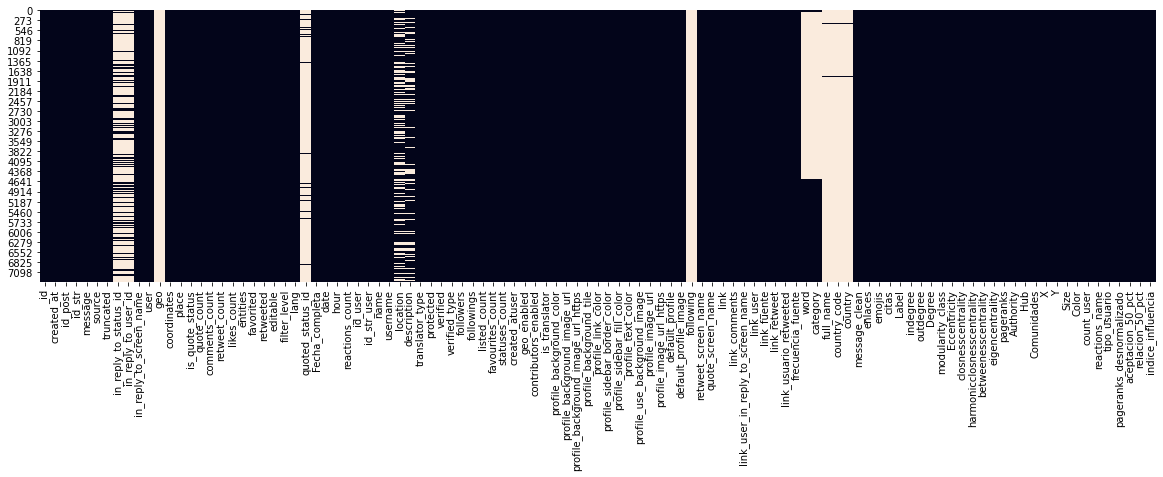

In [212]:
plt.figure(figsize=(20,5))
sns.heatmap(df_1.isnull(), cbar=False)
plt.show()

In [39]:
df_1['Color'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7369 entries, 0 to 7368
Series name: Color
Non-Null Count  Dtype 
--------------  ----- 
7369 non-null   object
dtypes: object(1)
memory usage: 57.7+ KB


### 2.1.3 Variables Numericas

In [40]:
# Seleccionamos las variables numericas, sin la variable 'Comunidades' y 'Color' ya que es de tipo str
df_2 = df_1[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia', 'Authority', 'Hub', 'X', 'Y', 'Size']] 
df_2.shape

(7369, 30)

In [41]:
df_2.select_dtypes(include=np.number).describe()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,eigencentrality,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia,Authority,Hub,X,Y,Size
count,7.369000e+03,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7.369000e+03,...,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000,7369.000000
mean,2.653673e+04,1382.237074,97.512688,24486.647035,3.151038,1.066902,0.100556,0.445786,4.764283,7.989747e+04,...,0.021641,0.082360,0.218801,17.290666,17.509467,0.008811,0.010749,0.436069,0.539157,0.022403
std,2.430733e+05,3238.559200,722.606302,52759.351582,26.745094,15.346628,1.242157,5.232574,42.777011,2.420157e+05,...,0.100119,0.378727,5.632197,136.019498,136.521397,0.078268,0.015606,0.227242,0.235374,0.094715
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,...,0.000000,0.004400,0.000000,0.000000,0.000000,0.000000,0.000000,0.004420,0.000000,0.000000
25%,1.070000e+02,231.000000,0.000000,792.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.666000e+03,...,0.000000,0.004400,0.000000,0.004400,0.004400,0.000000,0.000002,0.247309,0.363970,0.002081
50%,4.230000e+02,678.000000,2.000000,5702.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.346300e+04,...,0.000000,0.004400,0.000000,0.008800,0.008800,0.000000,0.001780,0.415232,0.546864,0.003122
75%,1.682000e+03,1604.000000,14.000000,25258.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.633400e+04,...,0.002882,0.012000,0.000000,0.041800,0.064800,0.000041,0.031260,0.616125,0.729141,0.008325
max,5.548273e+06,97083.000000,19299.000000,706679.000000,1133.000000,636.000000,65.000000,316.000000,1951.000000,3.089672e+06,...,1.000000,3.324000,318.000000,1597.182000,1603.852213,0.972579,0.049748,1.000000,0.992875,1.000000


In [42]:
def box_plot(cols, df):
    fig, axes = plt.subplots(5,5, figsize=(22,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Box plots of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

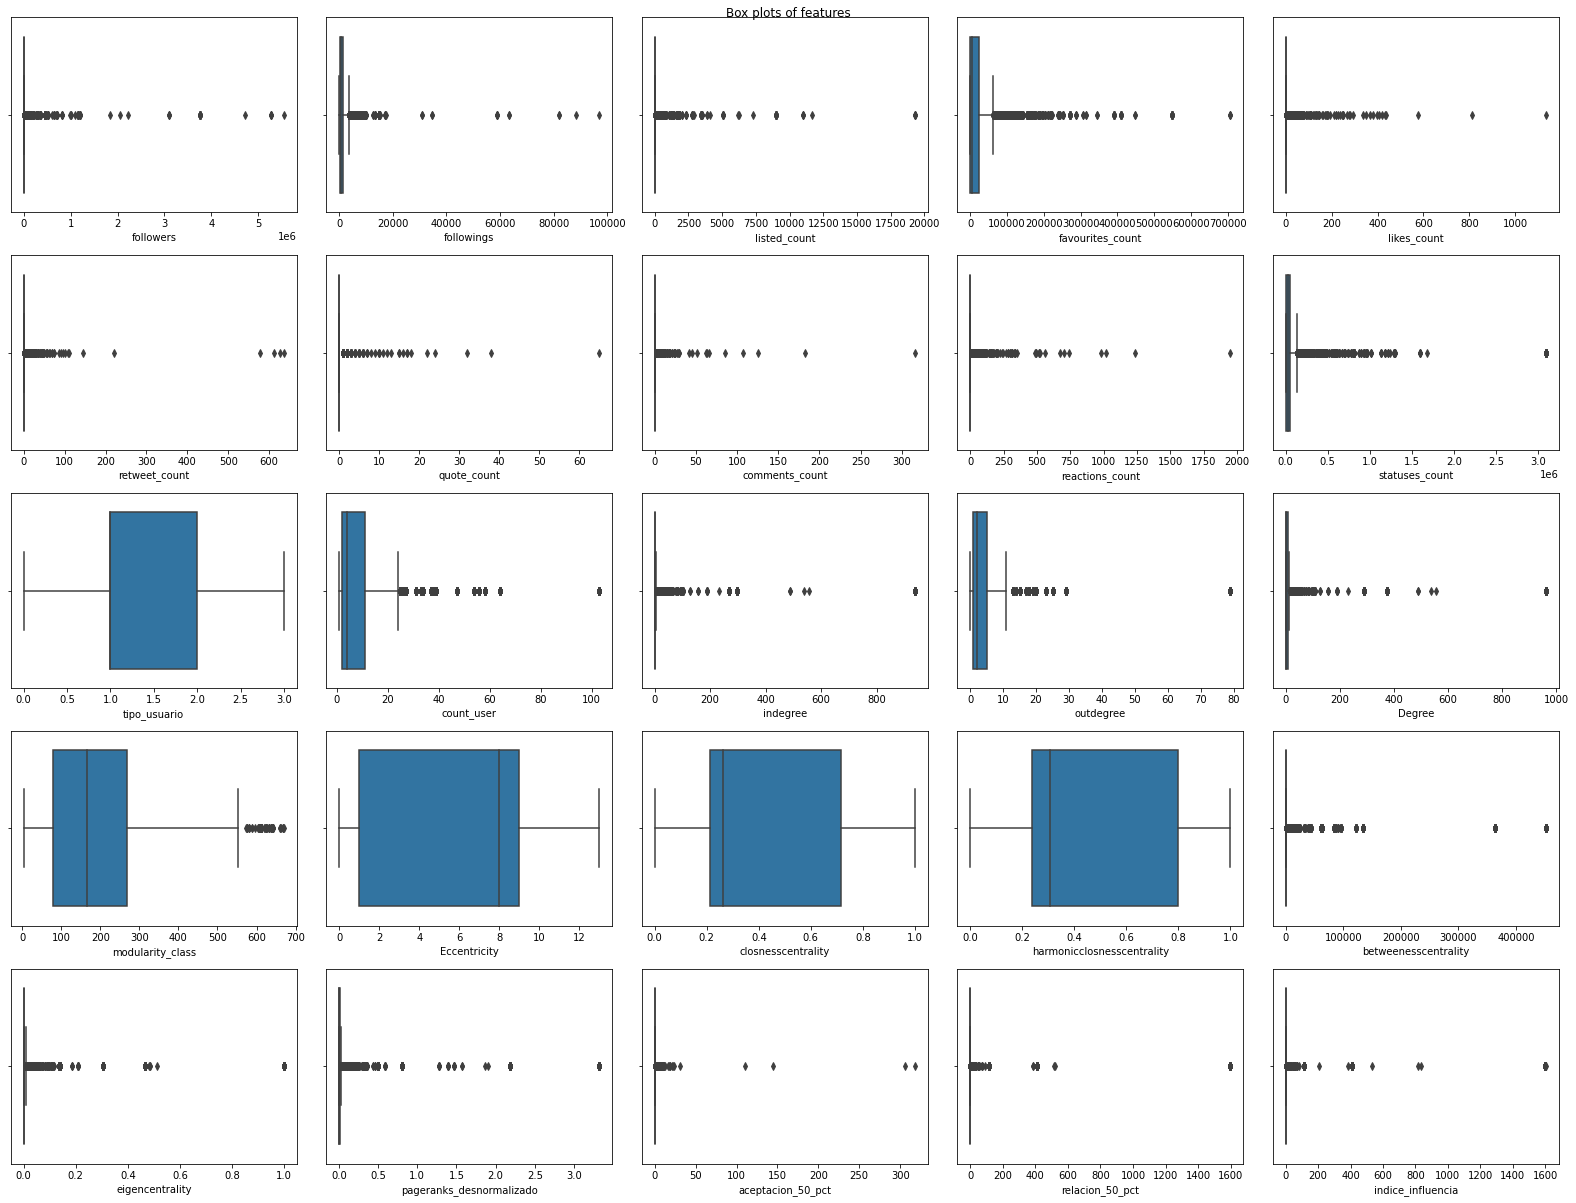

In [217]:
box_plot(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia', 'Authority', 'Hub', 'X', 'Y', 'Size'], df_2)  

#### 2.1.3.1 Gráficos de distribución

In [218]:
# Check the distribution of numerical features in the original dataset
def distributions(cols, df):
    fig, axes = plt.subplots(6,3, figsize=(26,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

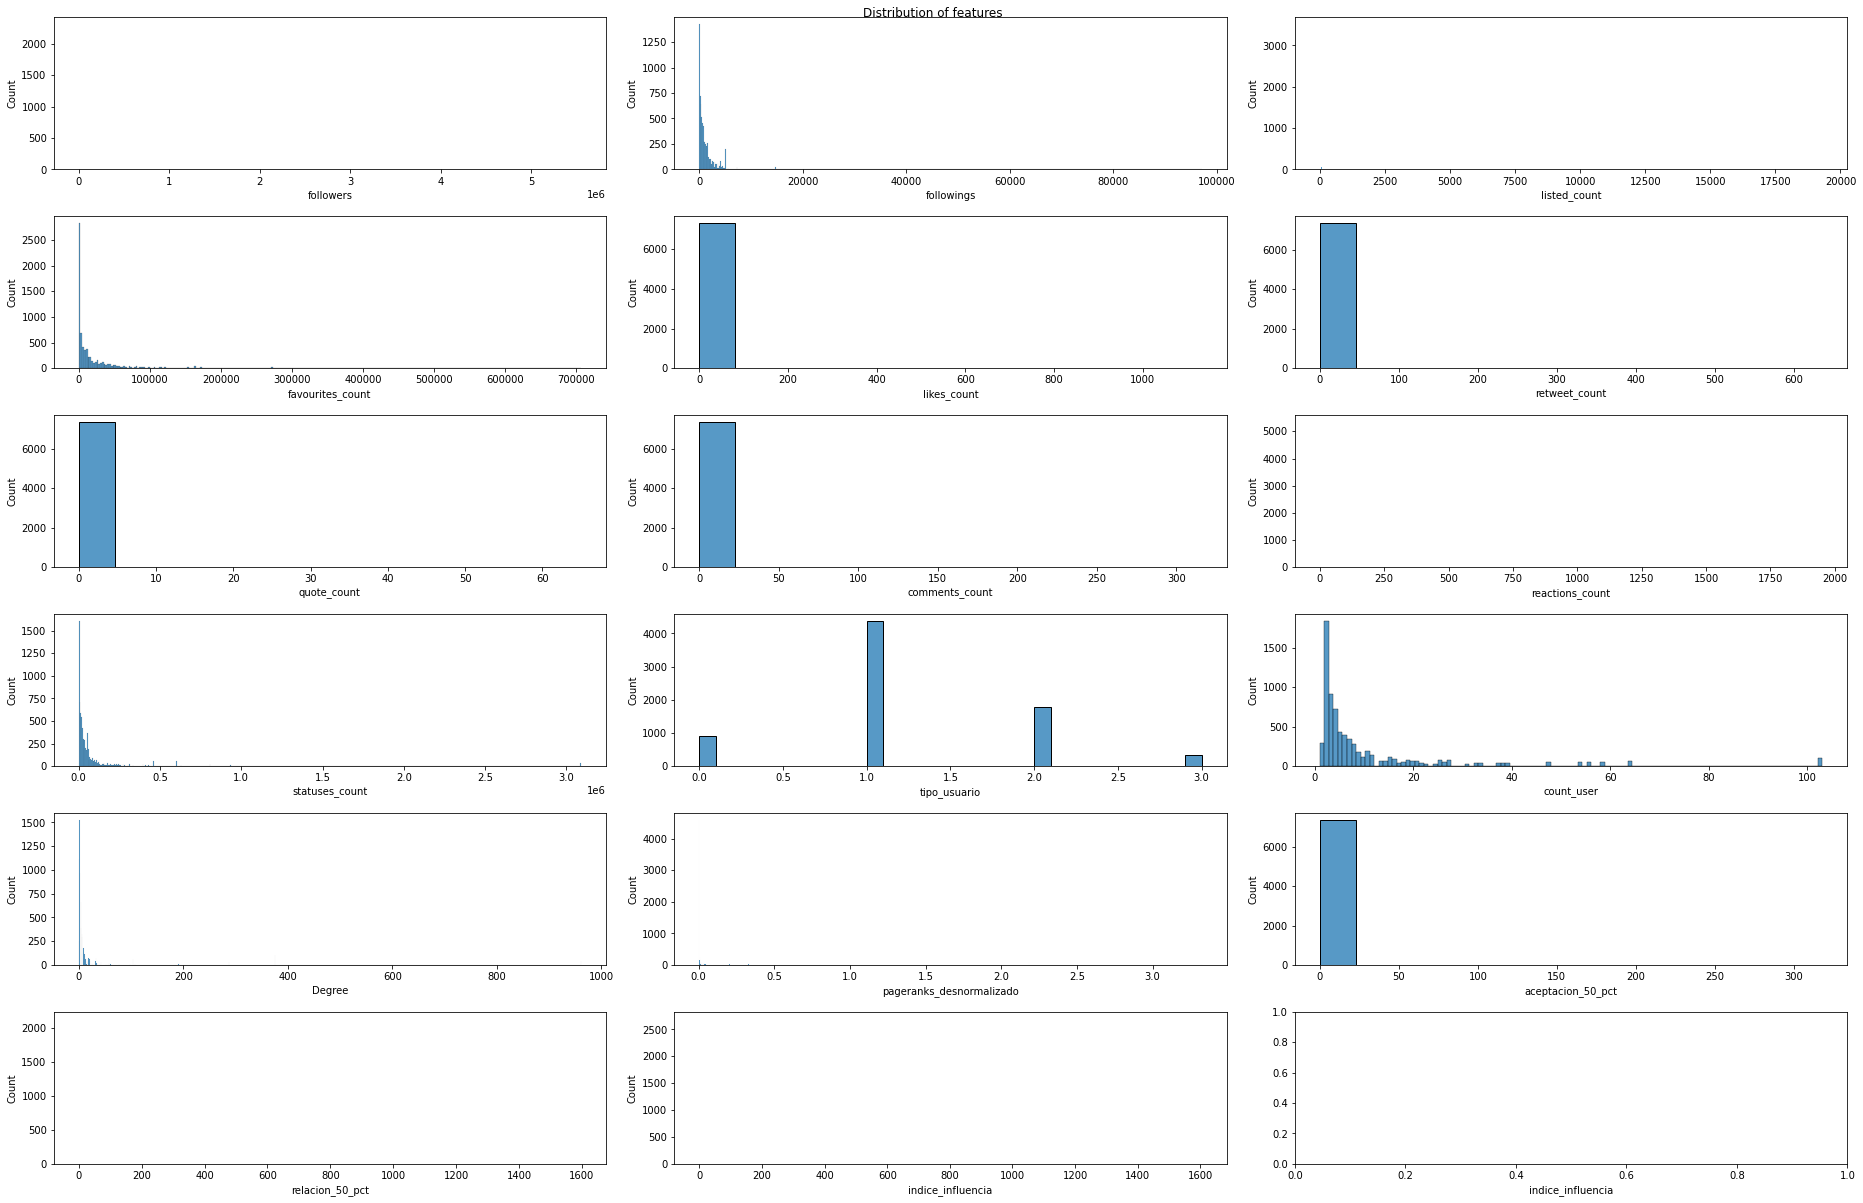

In [219]:
distributions(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
      'Degree','pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia'], df_2)    

#### 2.1.3.2 Correlacion

In [220]:
# Columnas numericas seleccionadas para evaluar el modelo
#  retirabamos reactions_count ya que es la suma de df['reactions_count'] = df['likes_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
cols_num = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
      'Degree','pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct','indice_influencia']

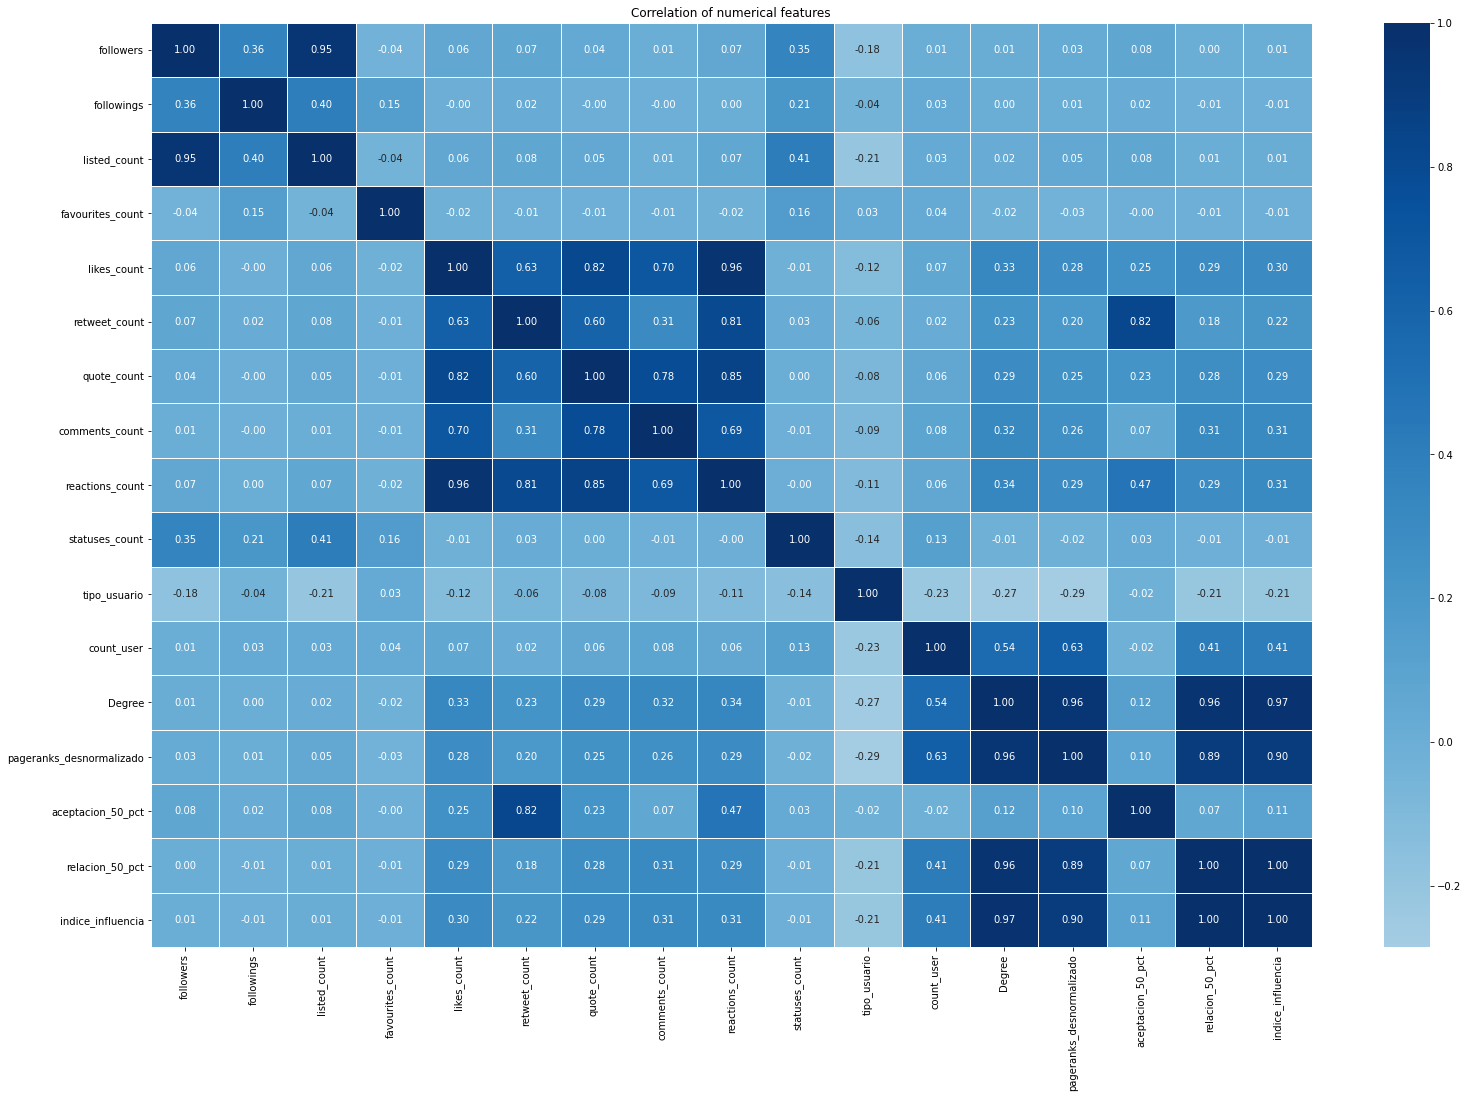

In [221]:
# Correlacion de las variables numericas
plt.figure(figsize=(26,17))
plt.title('Correlation of numerical features')
sns.heatmap(df_2[cols_num].corr(), annot=True, fmt='.2f', cmap='Blues',  center=0, linewidths=1)
plt.show()

- **Nota: las variable que presentan una mayor correlacion con la variable indice_influencia son relacion_50_pct y Degree, lo cual tiene sentido ya que aunque la relacion es apenas un 50% del calculo del indice de influencia, Tener un Degree alto asegura un valor alto de PageRank, es decir que al medir la influencia esta relacion (definida en funcion del grafo) genera un gran impacto. Lo cual puede ser contrastado con que el usuario tenga 1 unica publicacion pero esta haya generado gran cantidad de interacciones, obteniendo asi en el periodo y tematica de busqueda una publicacion viral / tendencia.**

# 3. Definicion de arquitecturas de los diferentes modelos

## 3.1 Modelado experimental (Data 3) - v1

Variables: 

+ Predictoras
    - 'followers' 
    - 'followings' 
    - 'listed_count' 
    - 'favourites_count' 
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
    - 'comments_count' 
    - 'reactions_count' 
    - 'statuses_count'
    - 'tipo_usuario'
    - 'count_user'
    - 'indegree' 
    - 'outdegree' 
    - 'Degree'
    - 'modularity_class'
    - 'Eccentricity' 
    - 'closnesscentrality',
    - 'harmonicclosnesscentrality'
    - 'betweenesscentrality'
    - 'eigencentrality'
    - 'pageranks_desnormalizado'
    - 'Authority' 
    - 'Hub'
    - 'X'
    - 'Y'
    - 'Size'
+ Objetivo:
   - 'indice_influencia' 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

In [337]:
df_2.shape

(7369, 30)

### 3.1.1 Separacion de variables predictoras y objetivo

In [265]:
# Realizamos la separación de la data para poder utilizarla en el modelado
## Para las "features", seleccionamos las siguientes del dataframe cargado
# X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
#      'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
#        'Authority', 'Hub', 'X', 'Y', 'Size']]
X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']]
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
y = df_2['indice_influencia']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    followers  followings  listed_count  favourites_count  likes_count  \
0      17771        4132           214               494           36   
1       1430        1773            10              8738            0   
2       2236        2418             6             21815            0   
3        130         100             1              1865            0   
4       2750        4957             9             34413            0   

   retweet_count  quote_count  comments_count  reactions_count  \
0             12            4               8               60   
1              0            0               0                0   
2              0            0               0                0   
3              0            0               0                0   
4              0            0               0                0   

   statuses_count  tipo_usuario  count_user  Degree  pageranks_desnormalizado  \
0           16772             0          64 

### 3.1.2 Modelo Linear Regressor

In [45]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -2.5182936213176496e-13
El RMSE para la data de entrenamiento: 4.219432865060734e-14
El RMSE para la data de prueba: 3.831075688766387e-14
CPU times: user 566 ms, sys: 1.25 s, total: 1.82 s
Wall time: 2.44 s


In [46]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': False}
La mejor precisión con estos parametros fue:  -1.8145341601337425e-13
El RMSE para la data de entrenamiento: 1.7530987484615856e-13
El RMSE para la data de prueba: 1.9970092160962376e-13
CPU times: user 1.57 s, sys: 2.07 s, total: 3.64 s
Wall time: 984 ms


In [47]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 1.7530987484615856e-13
El RMSE para la data de prueba: 1.9970092160962376e-13


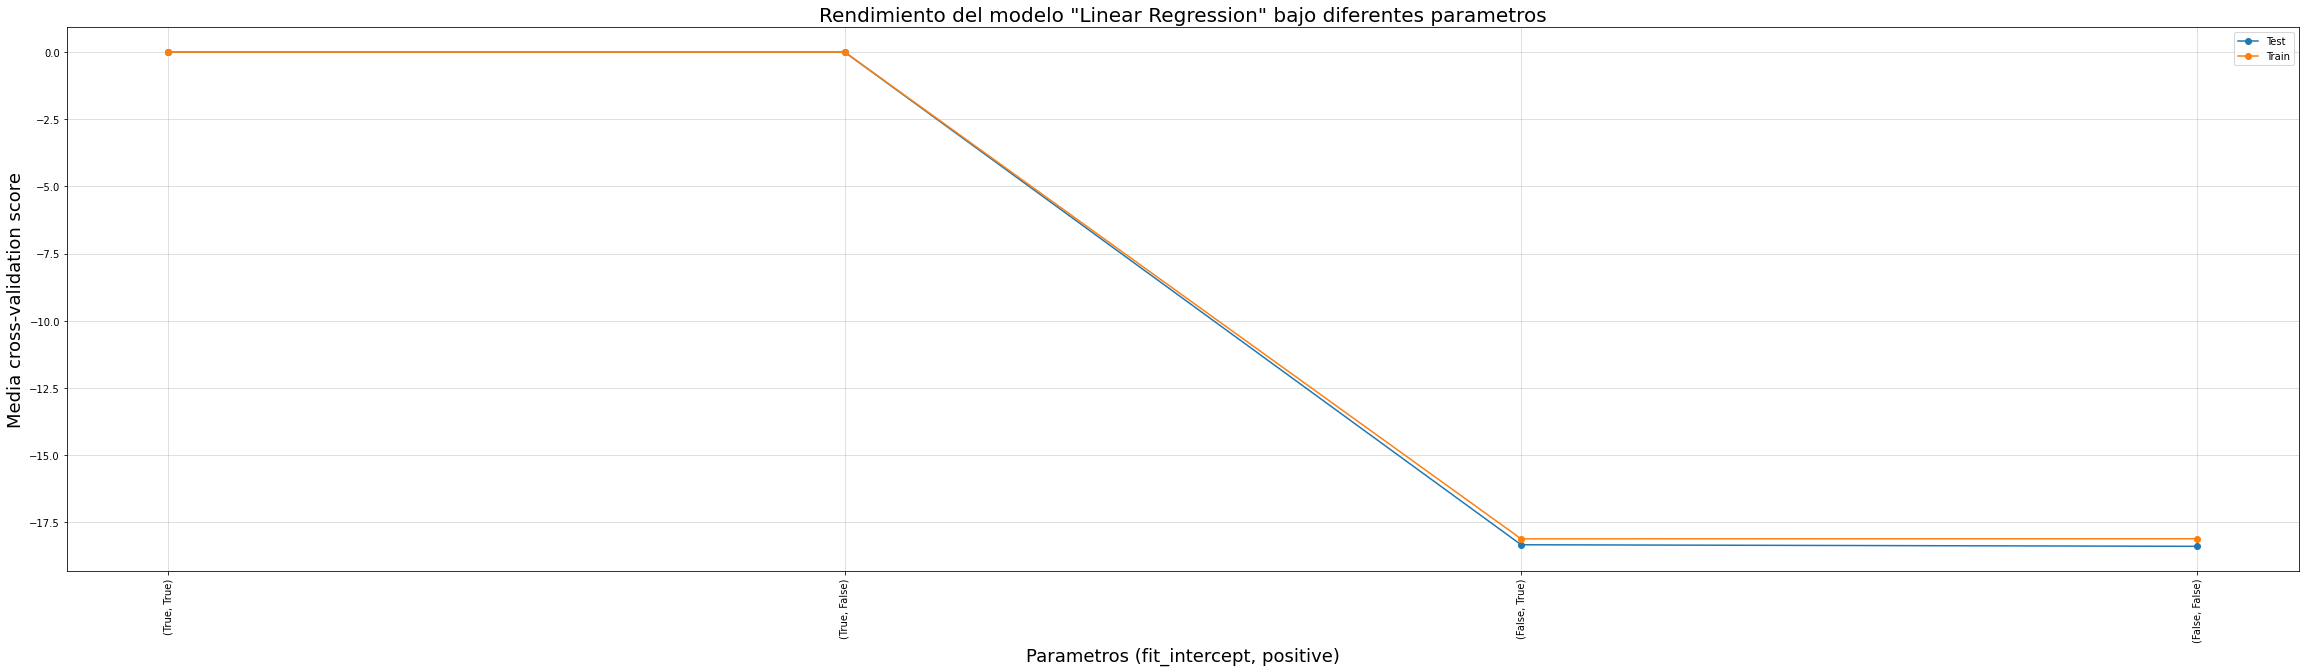

In [48]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [52]:
#predicciones
y_pred = lr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
0,-0.110380,-0.265640,-0.130000,-0.447351,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.187046,1.127061,-0.522031,-0.205264,-0.204686,-0.040689,-0.127855,0.0047,0.0047,7.845460e-14
1,-0.112391,-0.316904,-0.138069,-0.339244,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.257347,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.0066,4.723652e-15
2,-0.108636,-0.124454,-0.112519,0.075323,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238314,1.127061,0.337510,-0.129857,-0.197616,-0.040689,-0.127651,0.0333,0.0333,6.550316e-15
3,-0.112255,-0.349400,-0.138069,-0.465566,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.202019,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.0066,1.170938e-15
4,-0.111238,0.090127,-0.138069,1.089086,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.107874,-0.289455,-0.522031,-0.205264,-0.205471,-0.040689,-0.127858,0.0044,0.0044,4.578195e-14


In [53]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 4.547473508864641e-12
Minima diferencia: 0.0


In [54]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
379,-0.02831,-0.224461,-0.054696,0.011663,50.733047,39.473371,82.570916,42.883897,54.314514,-0.109606,-1.705971,2.240778,10.125557,8.486778,0.953186,11.316456,1603.852213,1603.852213,4.547474e-12


In [55]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
457,-0.110859,-0.136219,-0.135379,-0.392100,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.274380,-0.289455,-0.460635,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0
984,-0.112020,-0.231464,-0.136724,-0.439016,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.324334,-0.289455,-0.460635,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0
1130,-0.110731,0.141391,-0.136724,-0.449463,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.322210,-0.289455,-0.522031,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0
1464,-0.071019,-0.337354,-0.026457,-0.445239,1.483122,0.434879,-0.106037,-0.128792,1.101379,-0.288252,-1.705971,0.214719,0.828895,0.398346,0.001883,-0.045380,11.800714,11.800714,0.0
1505,-0.112510,-0.389459,-0.138069,-0.464755,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.326398,-0.289455,-0.399239,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0
1525,-0.110859,-0.136219,-0.135379,-0.392100,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.274380,-0.289455,-0.460635,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0
1880,-0.111533,0.032700,-0.138069,-0.464831,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.324345,-0.289455,-0.522031,-0.226809,-0.205471,-0.040689,-0.127889,0.000000,0.000000,0.0


### 3.1.3 Modelo RandomForestRegressor

In [56]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
#param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
param_grid = {'n_estimators': [100, 500, 1000], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo knn
rf = RandomForestRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_1 = GridSearchCV(rf, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_1.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_1.best_params_)
print('El RMSE para el grid search cv: ', clf_1.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_1.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_1.predict(X_test), squared=False))

Los mejores parametros fueron:  {'min_samples_leaf': 1, 'n_estimators': 500}
El RMSE para el grid search cv:  -5.141702228581918
El RMSE para la data de entrenamiento: 0.9996623747467388
El RMSE para la data de prueba: 4.952919361395882
CPU times: user 17.1 s, sys: 177 ms, total: 17.3 s
Wall time: 1min 24s


In [57]:
rf = RandomForestRegressor(**clf_1.best_params_)
rf.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, rf.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, rf.predict(X_test), squared=False))

El RMSE para la data de entrenamiento: 1.0797333207574829
El RMSE para la data de prueba: 5.150882411231281


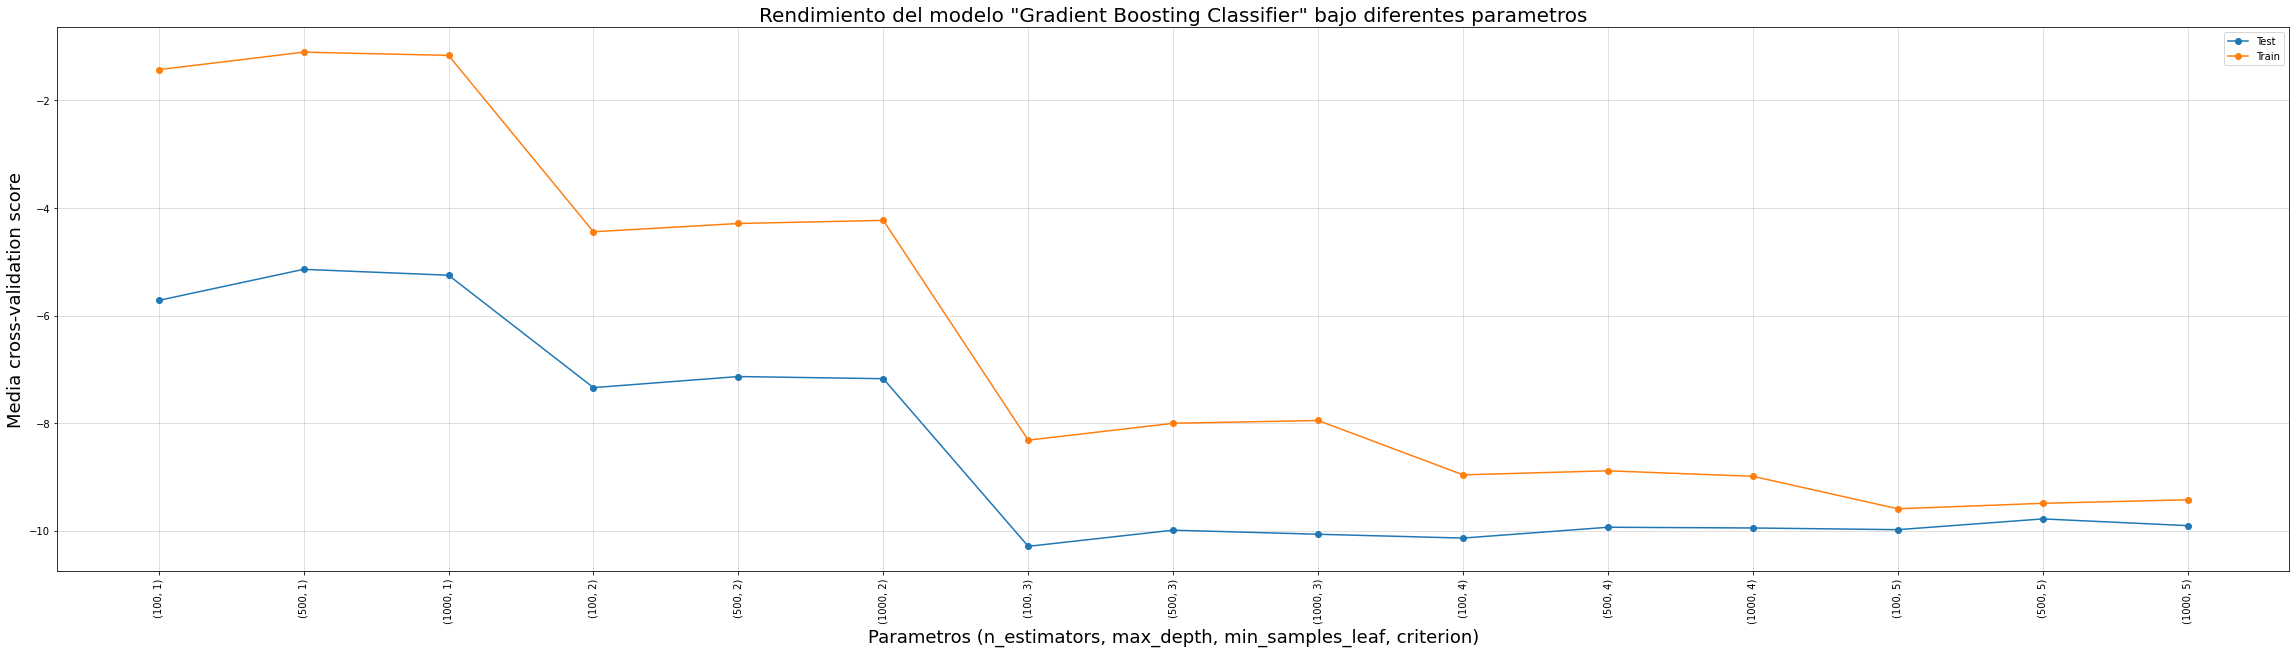

In [58]:
params = [(p['n_estimators'], p['min_samples_leaf']) for p in clf_1.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_1.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_1.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [59]:
#predicciones
y_pred = rf.predict(X_test)

In [60]:
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
7174,534,467,6,987,0,0,0,0,0,35456,2,2,2.0,0.0047,0.0,0.0047,0.0047,0.004688,1.160000e-05
5329,30,284,0,6720,0,0,0,0,0,17642,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.006600,5.377643e-17
6306,971,971,19,28705,0,0,0,0,0,22465,2,16,9.0,0.0074,0.0,0.0333,0.0333,0.033300,2.289835e-16
2599,64,168,0,21,0,0,0,0,0,31662,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.006600,5.377643e-17
2334,319,1737,0,82466,0,0,0,0,0,55518,1,2,2.0,0.0044,0.0,0.0044,0.0044,0.004400,3.816392e-17


In [61]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 180.95530273333281
Minima diferencia: 0.0


In [62]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
2942,59624,1792,210,110630,0,0,0,0,0,267445,0,2,489.0,1.5735,0.0,384.72075,384.72075,565.676053,180.955303


In [63]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
2106,46,281,0,227,0,0,0,0,0,431,1,4,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0
1339,0,8,0,13,0,0,0,0,0,3,1,2,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0
6397,252,694,2,64841,0,0,0,0,0,25253,1,3,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0
728,11737,1520,157,10666,2,0,0,0,2,51973,0,103,375.0,2.1815,0.0,409.03125,409.03125,409.03125,0.0
1311,1417,954,9,416,0,0,0,0,0,17495,2,2,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,555,65,5,204,4,0,0,0,4,3626,3,2,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0
4015,11737,1520,157,10666,0,0,0,1,1,51973,0,103,375.0,2.1815,0.0,409.03125,409.03125,409.03125,0.0
3545,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.0,409.03125,409.03125,409.03125,0.0
4744,634,810,2,76,0,0,0,0,0,3157,1,4,0.0,0.0044,0.0,0.00000,0.00000,0.00000,0.0


In [64]:
df_eval_t1 = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']]

In [65]:
y_pred_22 = clf_1.predict(df_eval_t1)

In [66]:
df_2['indice_influencia'] = y_pred_22

In [67]:
y_pred_22

array([2.63741434e+01, 2.20000000e-03, 4.40000000e-03, ...,
       4.40000000e-03, 4.40000000e-03, 1.51239380e+00])

In [68]:
# 1. Asegurarse de tener las mismas columnas en df_3 que en X
df_3 = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']]
df_3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct
0,17771,4132,214,494,36,12,4,8,60,16772,0,64,104.0,0.5057,0.09375,26.29640
1,1430,1773,10,8738,0,0,0,0,0,140642,2,3,1.0,0.0044,0.00000,0.00220
2,2236,2418,6,21815,0,0,0,0,0,16662,2,3,2.0,0.0044,0.00000,0.00440
3,130,100,1,1865,0,0,0,0,0,1309,2,6,2.0,0.0044,0.00000,0.00440
4,2750,4957,9,34413,0,0,0,0,0,32246,1,4,3.0,0.0049,0.00000,0.00735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,1,51,0,26,0,0,0,0,0,571,1,2,2.0,0.0044,0.00000,0.00440
7365,436,2063,8,3429,0,0,0,0,0,25148,1,5,4.0,0.0044,0.00000,0.00880
7366,255,1586,2,9050,0,0,0,0,0,5104,1,2,2.0,0.0044,0.00000,0.00440
7367,756,798,5,4202,0,0,0,0,0,35662,2,2,2.0,0.0044,0.00000,0.00440


In [69]:
X_new_1 = df_3.loc[4].values.reshape(1,-1)

In [70]:
# 2. Hacer predicciones en df_3 con el modelo entrenado
y_pred = lr.predict(X_new_1)
y_pred

array([19.14716275])

In [71]:
df_2.loc[4][['indice_influencia']]

indice_influencia    0.007352
Name: 4, dtype: float64

### 3.1.4 Modelo GradientBoostingRegressor

In [72]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 1], 'max_depth': [2, 3, 4, 5, 6, 7]}
# Instanciamos el modelo knn
gbc = GradientBoostingRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_2 = GridSearchCV(gbc, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_2.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_2.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_2.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_2.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_2.predict(X_test),squared=False))

Los mejores parametros fueron:  {'learning_rate': 0.1, 'max_depth': 2}
La mejor precisión con estos parametros fue:  -3.892069707441234
El RMSE para la data de entrenamiento: 0.29141989780982336
El RMSE para la data de prueba: 13.297242505202634
CPU times: user 1.37 s, sys: 625 ms, total: 2 s
Wall time: 10.1 s


In [73]:
gbc = GradientBoostingRegressor(**clf_2.best_params_)
gbc.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, gbc.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, gbc.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.2914198978098236
El RMSE para la data de prueba: 13.934522935333204


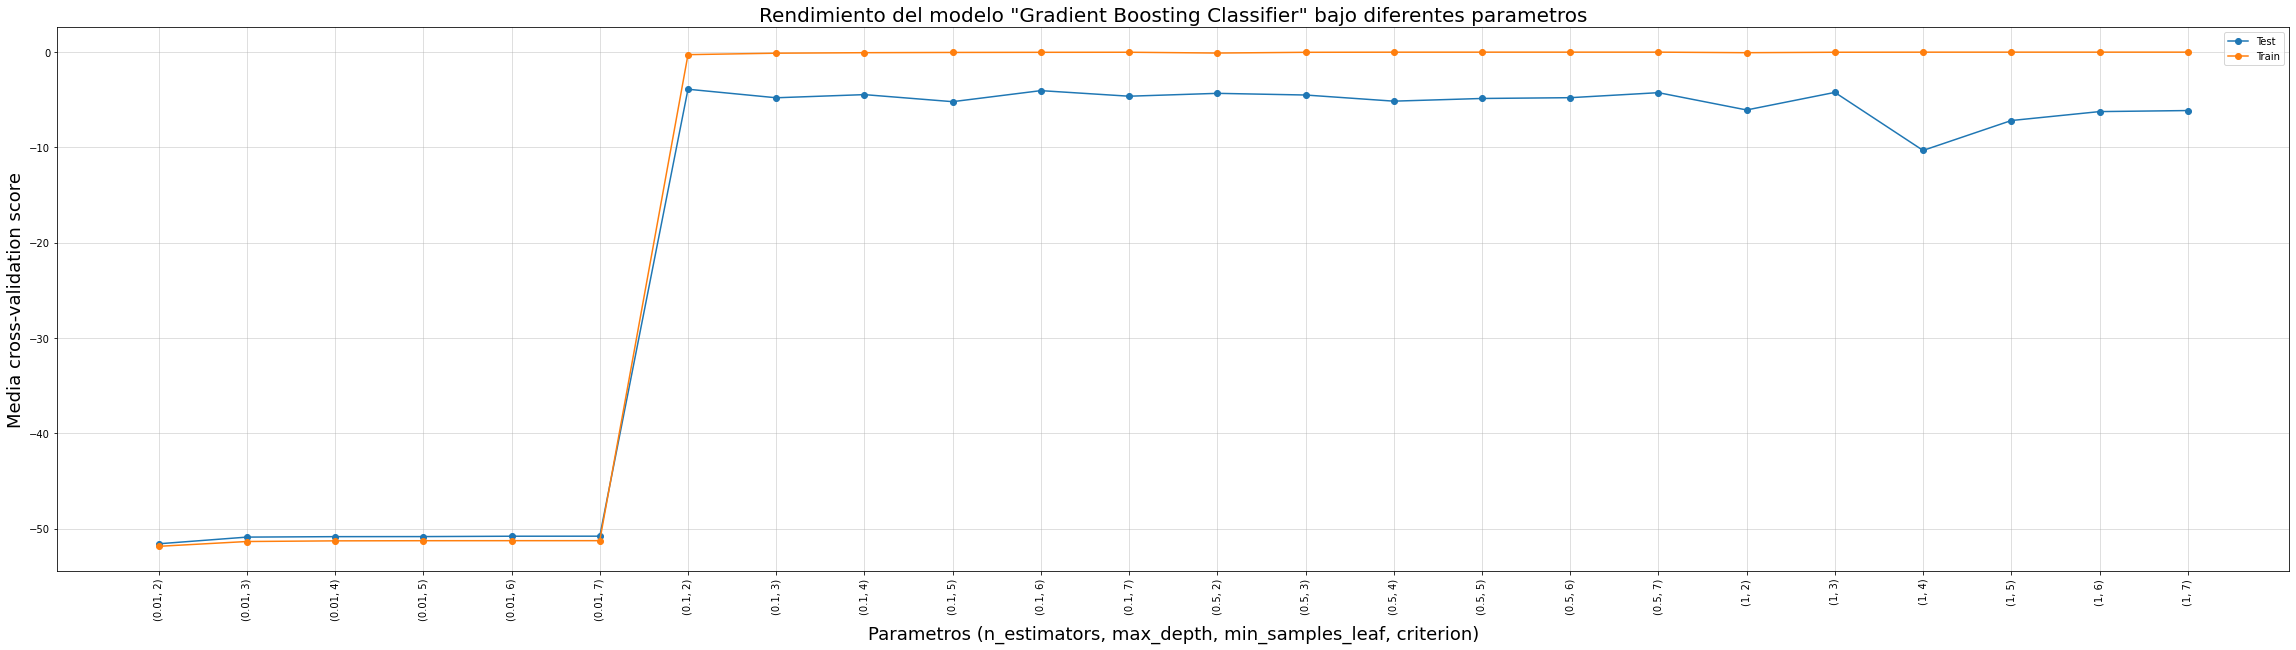

In [74]:
params = [(p['learning_rate'], p['max_depth']) for p in clf_2.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_2.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_2.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [75]:
#predicciones
y_pred = gbc.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
7174,534,467,6,987,0,0,0,0,0,35456,2,2,2.0,0.0047,0.0,0.0047,0.0047,0.037931,0.033231
5329,30,284,0,6720,0,0,0,0,0,17642,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.037931,0.031331
6306,971,971,19,28705,0,0,0,0,0,22465,2,16,9.0,0.0074,0.0,0.0333,0.0333,0.037931,0.004631
2599,64,168,0,21,0,0,0,0,0,31662,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.037931,0.031331
2334,319,1737,0,82466,0,0,0,0,0,55518,1,2,2.0,0.0044,0.0,0.0044,0.0044,0.037931,0.033531


In [79]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 419.9743156156403
Minima diferencia: 0.0008985990377521486


In [80]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
5403,21105,614,62,25329,1133,627,65,126,1951,55079,0,47,961.0,3.324,6.670213,1597.182,1603.852213,1183.877897,419.974316


In [81]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
5311,553,2965,4,21609,1,1,0,0,2,106981,1,6,4.0,0.0074,0.083333,0.0148,0.098133,0.099032,0.000899


### 3.1.5 Modelo DecisionTreeRegressor

In [82]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo dt
dt = DecisionTreeRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf = GridSearchCV(dt, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf.best_params_)
print('La mejor precisión con estos parametros fue: ', clf.best_score_)

Los mejores parametros fueron:  {'max_depth': 6, 'min_samples_leaf': 2}
La mejor precisión con estos parametros fue:  -5.201253317950018
CPU times: user 325 ms, sys: 104 ms, total: 430 ms
Wall time: 692 ms


In [83]:
dt = DecisionTreeRegressor(**clf.best_params_)
dt.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, dt.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, dt.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 1.628447601242436
El RMSE para la data de prueba: 1.5572742074516757


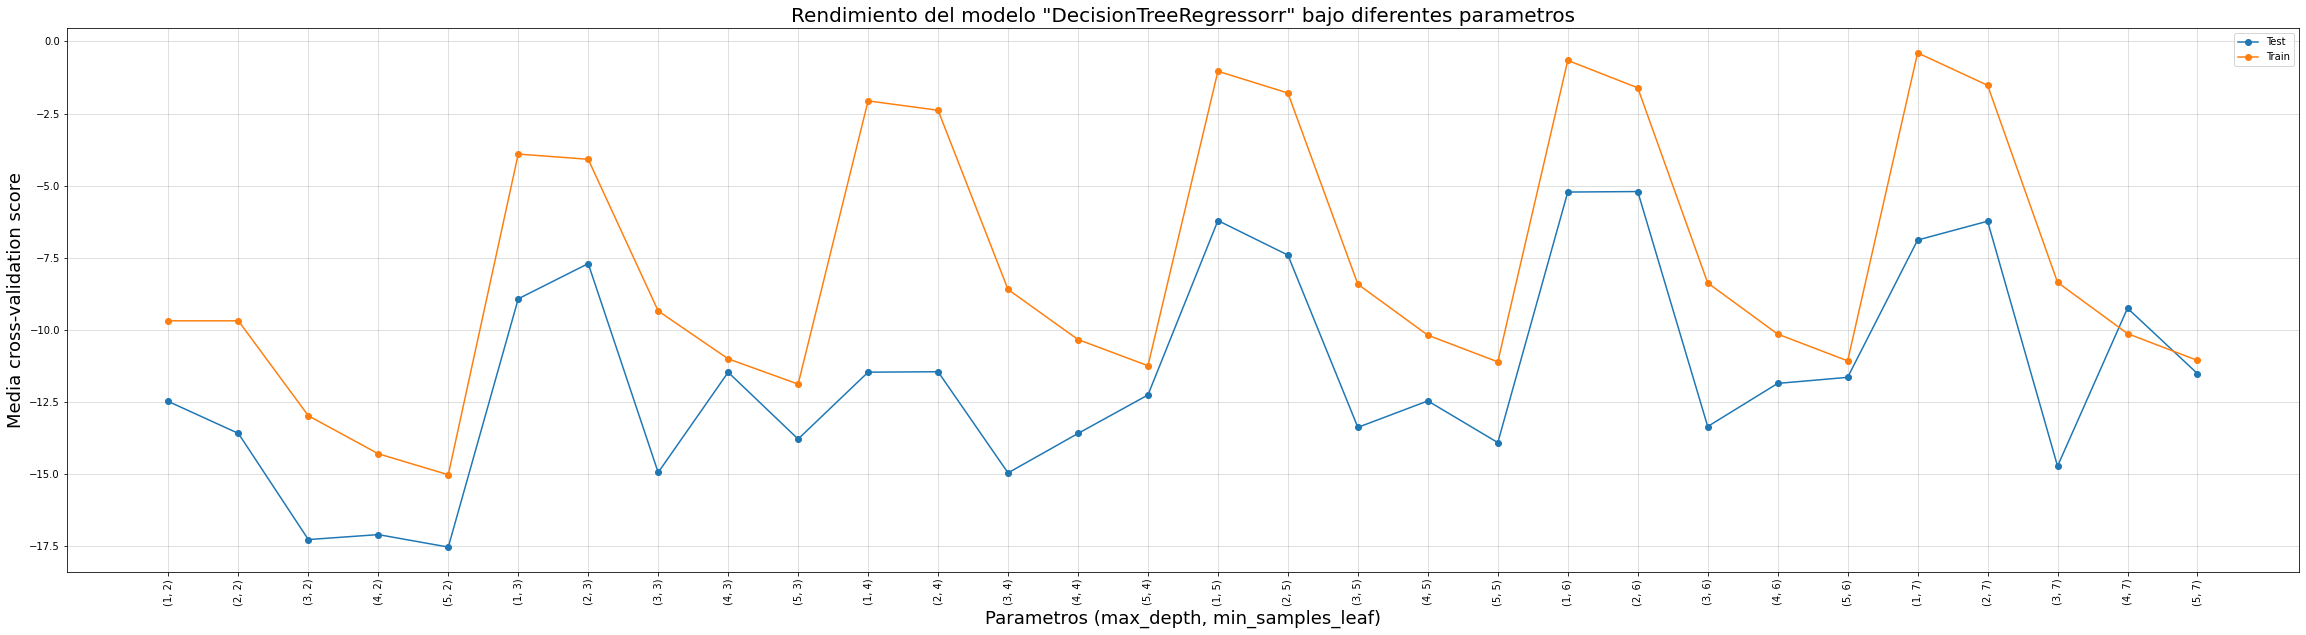

In [84]:
params = [(p['min_samples_leaf'], p['max_depth']) for p in clf.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, min_samples_leaf)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "DecisionTreeRegressorr" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [85]:
# Predicciones
y_pred = dt.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
7174,534,467,6,987,0,0,0,0,0,35456,2,2,2.0,0.0047,0.0,0.0047,0.0047,0.140554,0.135854
5329,30,284,0,6720,0,0,0,0,0,17642,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.140554,0.133954
6306,971,971,19,28705,0,0,0,0,0,22465,2,16,9.0,0.0074,0.0,0.0333,0.0333,0.140554,0.107254
2599,64,168,0,21,0,0,0,0,0,31662,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.140554,0.133954
2334,319,1737,0,82466,0,0,0,0,0,55518,1,2,2.0,0.0044,0.0,0.0044,0.0044,0.140554,0.136154


In [86]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 59.91756553398051
Minima diferencia: 0.0


In [87]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
1963,11737,1520,157,10666,293,45,1,15,354,51973,0,103,375.0,2.1815,0.218447,409.03125,409.249697,469.167262,59.917566


In [88]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
728,11737,1520,157,10666,2,0,0,0,2,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
1725,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
3400,11737,1520,157,10666,3,1,0,1,5,51973,0,103,375.0,2.1815,0.004854,409.03125,409.036104,409.036104,0.0
1494,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
2498,11737,1520,157,10666,16,0,0,4,20,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
4402,11737,1520,157,10666,1,0,0,1,2,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
3539,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
1205,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
937,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0
4502,11737,1520,157,10666,0,0,0,0,0,51973,0,103,375.0,2.1815,0.000000,409.03125,409.031250,409.031250,0.0


### 3.1.6 Modelo KNeighborsRegressor

In [89]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Instanciamos el modelo KNR sin escalamiento
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f146535d280>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

Los mejores parametros fueron:  {'algorithm': 'auto', 'n_neighbors': 5}
La mejor precisión con estos parametros fue:  -14.909930431700795
CPU times: user 472 ms, sys: 105 ms, total: 578 ms
Wall time: 1.37 s


In [90]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 
# Instanciamos el modelo KNR
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb99ca64280>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

Los mejores parametros fueron:  {'algorithm': 'auto', 'n_neighbors': 7}
La mejor precisión con estos parametros fue:  -22.22672778082862
CPU times: user 484 ms, sys: 80.3 ms, total: 564 ms
Wall time: 1.99 s


In [91]:
knr = KNeighborsRegressor(**clf_3.best_params_)
knr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, knr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, knr.predict(X_test_scaled),squared=False))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fca19085d30>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

El RMSE para la data de entrenamiento: 18.06295485168059
El RMSE para la data de prueba: 42.321408085375104


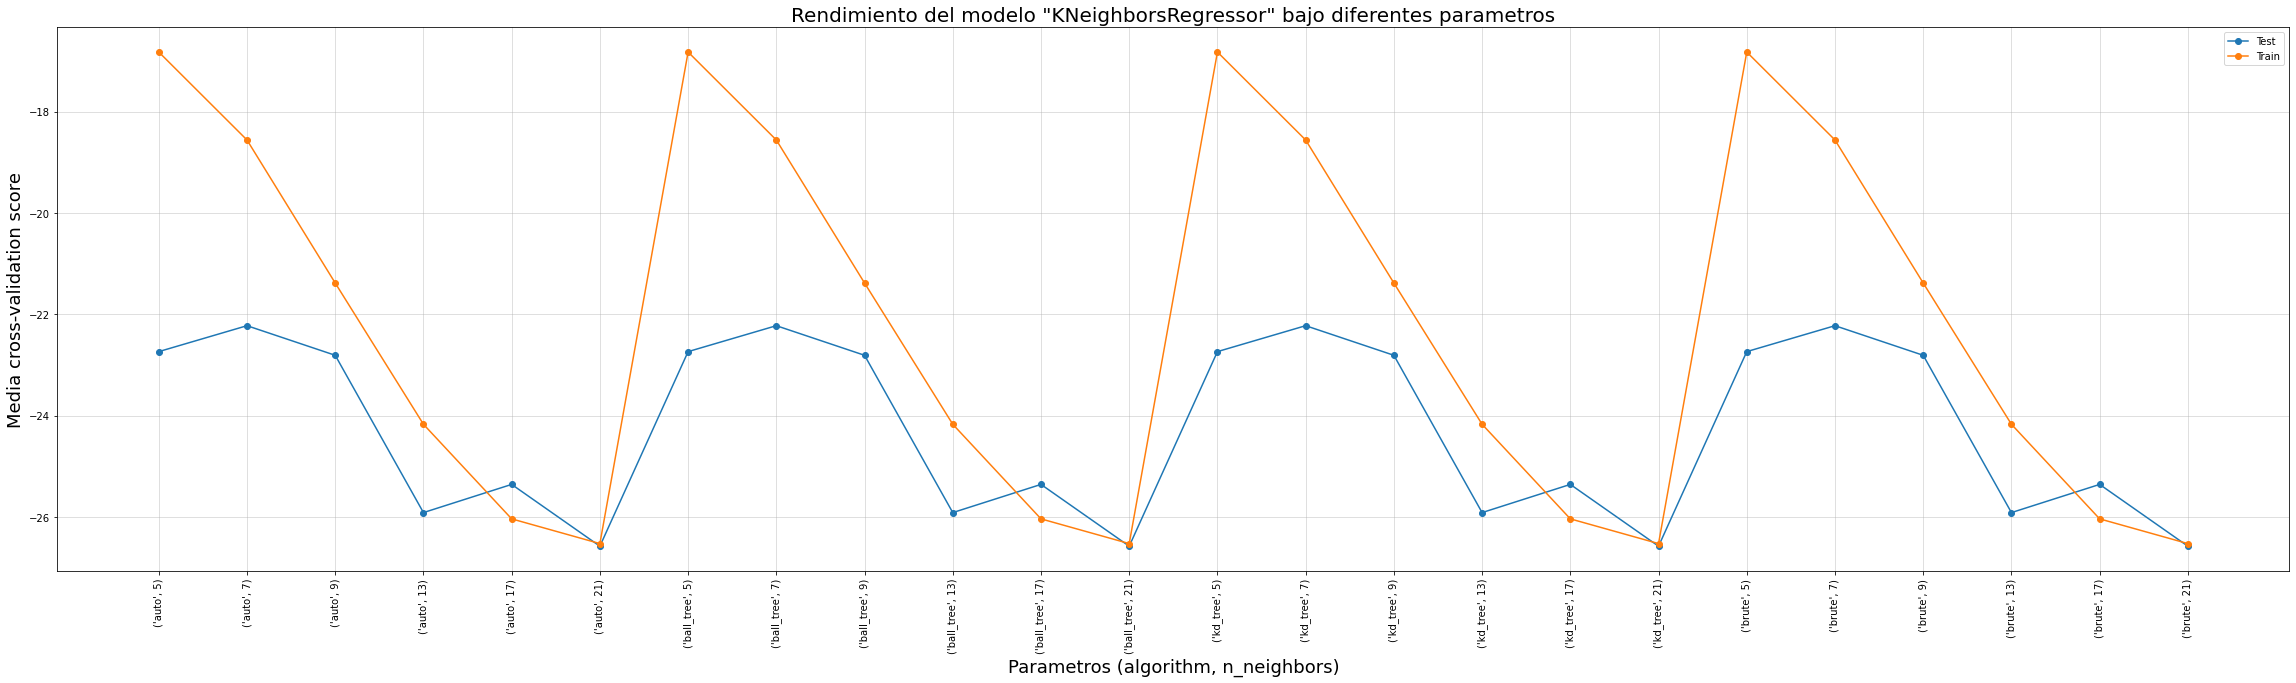

In [92]:
params = [(p['algorithm'], p['n_neighbors']) for p in clf_3.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_3.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_3.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (algorithm, n_neighbors)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "KNeighborsRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [94]:
# Predicciones
y_pred = knr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fca190105e0>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


,"(followers,)","(followings,)","(listed_count,)","(favourites_count,)","(likes_count,)","(retweet_count,)","(quote_count,)","(comments_count,)","(reactions_count,)","(statuses_count,)","(tipo_usuario,)","(count_user,)","(Degree,)","(pageranks_desnormalizado,)","(aceptacion_50_pct,)","(relacion_50_pct,)",y_test,y_pred,diferencia
0,-0.110380,-0.265640,-0.130000,-0.447351,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.187046,1.127061,-0.522031,-0.205264,-0.204686,-0.040689,-0.127855,0.0047,0.011914,0.007214
1,-0.112391,-0.316904,-0.138069,-0.339244,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.257347,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.005343,0.001257
2,-0.108636,-0.124454,-0.112519,0.075323,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238314,1.127061,0.337510,-0.129857,-0.197616,-0.040689,-0.127651,0.0333,0.033300,0.000000
3,-0.112255,-0.349400,-0.138069,-0.465566,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.202019,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.005657,0.000943
4,-0.111238,0.090127,-0.138069,1.089086,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.107874,-0.289455,-0.522031,-0.205264,-0.205471,-0.040689,-0.127858,0.0044,0.003771,0.000629


In [95]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 1075.5591481762917
Minima diferencia: 0.0


In [96]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,"(followers,)","(followings,)","(listed_count,)","(favourites_count,)","(likes_count,)","(retweet_count,)","(quote_count,)","(comments_count,)","(reactions_count,)","(statuses_count,)","(tipo_usuario,)","(count_user,)","(Degree,)","(pageranks_desnormalizado,)","(aceptacion_50_pct,)","(relacion_50_pct,)",y_test,y_pred,diferencia
1701,-0.028127,-0.224461,-0.054696,0.014529,36.23193,4.534236,48.228182,107.744302,34.390981,-0.109393,-1.705971,2.240778,10.125557,8.486778,0.075025,11.316456,1597.958596,522.399448,1075.559148


In [97]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,"(followers,)","(followings,)","(listed_count,)","(favourites_count,)","(likes_count,)","(retweet_count,)","(quote_count,)","(comments_count,)","(reactions_count,)","(statuses_count,)","(tipo_usuario,)","(count_user,)","(Degree,)","(pageranks_desnormalizado,)","(aceptacion_50_pct,)","(relacion_50_pct,)",y_test,y_pred,diferencia
2,-0.108636,-0.124454,-0.112519,0.075323,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238314,1.127061,0.337510,-0.129857,-0.197616,-0.040689,-0.127651,0.0333,0.0333,0.0
6,-0.112494,-0.393941,-0.138069,-0.465943,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238144,-0.289455,-0.276448,-0.216037,-0.205471,-0.040689,-0.127873,0.0022,0.0022,0.0
10,-0.111752,-0.225862,-0.135379,-0.460381,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.247272,-0.289455,0.705885,-0.129857,-0.205471,-0.040689,-0.127747,0.0198,0.0198,0.0
14,0.333832,0.061834,0.468401,-0.461455,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,1.489091,-1.705971,2.793340,-0.194492,-0.180858,-0.040689,-0.127741,0.0207,0.0207,0.0
24,-0.111605,0.055671,-0.138069,0.329193,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.200559,-0.289455,1.626821,0.128683,-0.195521,-0.040689,-0.126920,0.1353,0.1353,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,-0.112498,-0.390859,-0.138069,-0.464755,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.242998,-0.289455,-0.399239,-0.216037,-0.205471,-0.040689,-0.127873,0.0022,0.0022,0.0
2188,-0.112052,-0.177399,-0.136724,-0.463190,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.289514,-0.289455,0.521697,-0.108312,-0.205471,-0.040689,-0.127716,0.0242,0.0242,0.0
2194,-0.111728,-0.283289,-0.131345,0.522683,-0.088206,-0.069657,-0.106037,-0.128792,-0.098497,-0.228385,-0.289455,1.012863,0.010186,-0.086855,-0.040689,-0.123972,0.5467,0.5467,0.0
2197,-0.111728,-0.099242,-0.135379,-0.239925,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.262067,-0.289455,-0.522031,-0.205264,-0.205471,-0.040689,-0.127858,0.0044,0.0044,0.0


### 3.1.7 Modelo Red Neural feedforward

In [98]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping

In [99]:
# Normalizar las variables de entrada
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=27)

In [100]:
# Cantidad de variables de entrada
X_scaled.shape

(7369, 16)

In [101]:
# Arquitectura de red neural
model = tf.keras.Sequential()
model.add(layers.Dense(128, input_shape=(16,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo con la función de pérdida RMSE
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


2023-06-07 18:05:47.383384: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-07 18:05:47.383517: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fb-2): /proc/driver/nvidia/version does not exist
2023-06-07 18:05:47.384672: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [102]:
early_stopping = EarlyStopping(monitor="val_loss", patience = 5)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/50
162/162 [==============================] - 1s 3ms/step - loss: 13814.5928 - mse: 13814.5928 - val_loss: 2604.7463 - val_mse: 2604.7463
Epoch 2/50
162/162 [==============================] - 0s 2ms/step - loss: 987.6450 - mse: 987.6450 - val_loss: 132.9837 - val_mse: 132.9837
Epoch 3/50
162/162 [==============================] - 0s 2ms/step - loss: 52.7708 - mse: 52.7708 - val_loss: 235.4472 - val_mse: 235.4472
Epoch 4/50
162/162 [==============================] - 0s 2ms/step - loss: 24.5820 - mse: 24.5820 - val_loss: 576.1801 - val_mse: 576.1801
Epoch 5/50
162/162 [==============================] - 0s 2ms/step - loss: 18.5866 - mse: 18.5866 - val_loss: 198.1082 - val_mse: 198.1082
Epoch 6/50
162/162 [==============================] - 0s 2ms/step - loss: 16.4859 - mse: 16.4859 - val_loss: 456.4274 - val_mse: 456.4274
Epoch 7/50
162/162 [==============================] - 0s 2ms/step - loss: 29.8060 - mse: 29.8060 - val_loss: 121.5207 - val_mse: 121.5207
Epoch 8/50
162/162 [====

In [103]:
# Evaluar el modelo en el conjunto de prueba
loss, mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error en el conjunto de prueba: ", rmse)

70/70 [==============================] - 0s 1ms/step - loss: 383.4643 - mse: 383.4643
Root Mean Squared Error en el conjunto de prueba:  19.58224514582462


In [110]:
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, model.predict(X_train_scaled), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, model.predict(X_test_scaled), squared=False))

El RMSE para la data de entrenamiento: 2.3812629831287637
El RMSE para la data de prueba: 19.58224587167514


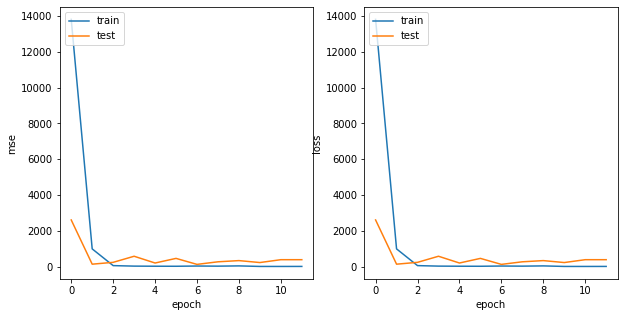

In [105]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['mse'])
ax[0].plot(history.history['val_mse'])
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('mse')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_mse'])
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')

plt.show()

In [106]:
#predicciones
y_pred = model.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred.reshape(1,-1)[0]})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
7174,534,467,6,987,0,0,0,0,0,35456,2,2,2.0,0.0047,0.0,0.0047,0.0047,0.398504,0.393804
5329,30,284,0,6720,0,0,0,0,0,17642,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.293688,0.287088
6306,971,971,19,28705,0,0,0,0,0,22465,2,16,9.0,0.0074,0.0,0.0333,0.0333,0.347425,0.314125
2599,64,168,0,21,0,0,0,0,0,31662,1,3,3.0,0.0044,0.0,0.0066,0.0066,0.279487,0.272887
2334,319,1737,0,82466,0,0,0,0,0,55518,1,2,2.0,0.0044,0.0,0.0044,0.0044,-0.338803,0.343203


In [107]:
y_pred.reshape(1,-1)[0]

array([0.39850414, 0.29368842, 0.34742534, ..., 0.3535167 , 0.80895317,
       0.47928822], dtype=float32)

In [108]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 734.0785921604888
Minima diferencia: 0.0008442781448364522


In [109]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
5403,21105,614,62,25329,1133,627,65,126,1951,55079,0,47,961.0,3.324,6.670213,1597.182,1603.852213,869.773621,734.078592


In [111]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
5753,1259,1934,2,7691,1,1,0,0,2,10747,1,1,2.0,0.0048,0.5,0.0048,0.5048,0.503956,0.000844


### 3.1.8 Modelo XGBRegressor

In [112]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Instanciamos el modelo XGBRegressor sin escalamiento
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 2, 'n_estimators': 200}
La mejor precisión con estos parametros fue:  -9.267844679065353
CPU times: user 9.48 s, sys: 202 ms, total: 9.68 s
Wall time: 2.93 s


In [113]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo XGBRegressor
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 2, 'n_estimators': 200}
La mejor precisión con estos parametros fue:  -9.267855007419083
CPU times: user 13.7 s, sys: 91.7 ms, total: 13.8 s
Wall time: 2.06 s


In [114]:
xgb = XGBRegressor(**clf_4.best_params_)
xgb.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, xgb.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, xgb.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.05494123736184558
El RMSE para la data de prueba: 6.789551654470338


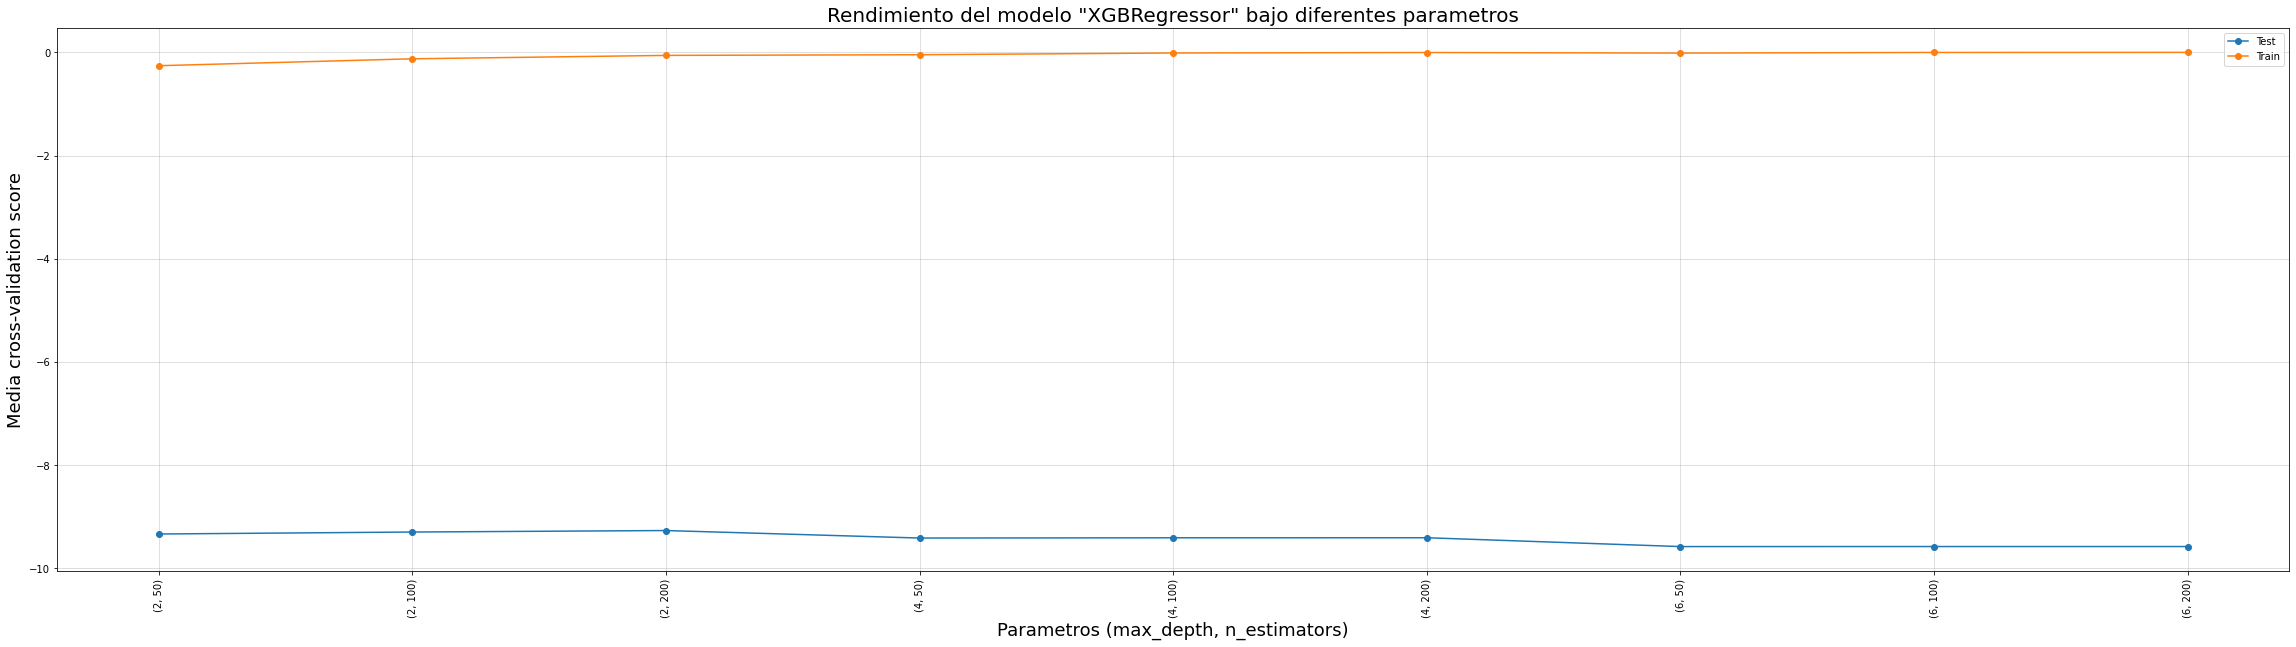

In [115]:
params = [(p['max_depth'], p['n_estimators']) for p in clf_4.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_4.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_4.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, n_estimators)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "XGBRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [116]:
#predicciones
y_pred = xgb.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
0,-0.110380,-0.265640,-0.130000,-0.447351,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.187046,1.127061,-0.522031,-0.205264,-0.204686,-0.040689,-0.127855,0.0047,0.004999,0.000299
1,-0.112391,-0.316904,-0.138069,-0.339244,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.257347,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
2,-0.108636,-0.124454,-0.112519,0.075323,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238314,1.127061,0.337510,-0.129857,-0.197616,-0.040689,-0.127651,0.0333,0.025698,0.007602
3,-0.112255,-0.349400,-0.138069,-0.465566,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.202019,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.004999,0.001601
4,-0.111238,0.090127,-0.138069,1.089086,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.107874,-0.289455,-0.522031,-0.205264,-0.205471,-0.040689,-0.127858,0.0044,0.002794,0.001606


In [117]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 280.8485249023438
Minima diferencia: 1.606434732675556e-05


In [118]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
1465,0.125364,0.105534,0.144323,1.62017,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,0.728474,-1.705971,-0.522031,5.04094,3.903159,-0.040689,2.628764,384.72075,665.569275,280.848525


In [119]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
1,-0.112391,-0.316904,-0.138069,-0.339244,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.257347,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
18,-0.111689,-0.079913,-0.136724,-0.360364,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.301354,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
47,-0.111920,-0.384416,-0.138069,0.435470,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,0.114356,1.127061,-0.399239,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
157,-0.110444,0.032980,-0.138069,-0.140927,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.243843,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
161,-0.112207,-0.252194,-0.138069,0.160934,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.235121,-0.289455,-0.399239,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,-0.111198,-0.352201,-0.138069,-0.104533,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.294866,1.127061,-0.337843,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
2054,-0.110316,0.040824,-0.123277,-0.287520,-0.133101,-0.069657,-0.106037,0.212579,-0.098497,-0.194264,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
2125,-0.108704,0.001606,-0.128656,1.030724,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,0.028806,-0.289455,-0.522031,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016
2142,-0.112076,-0.327549,-0.138069,-0.273717,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.052644,-0.289455,-0.399239,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.006616,0.000016


### 3.1.9 Modelo LGBMRegressor

In [120]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Instanciamos el modelo LGBMRegressor sin escalamiento
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -5.37055269093518
CPU times: user 12 s, sys: 61 ms, total: 12.1 s
Wall time: 2.02 s


In [121]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LGBMRegressor
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -5.49889451904927
CPU times: user 10.5 s, sys: 52.4 ms, total: 10.5 s
Wall time: 1 s


In [122]:
lgbm = lgb.LGBMRegressor(**clf_5.best_params_)
lgbm.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lgbm.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lgbm.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 1.0239527083376645
El RMSE para la data de prueba: 2.714298233403022


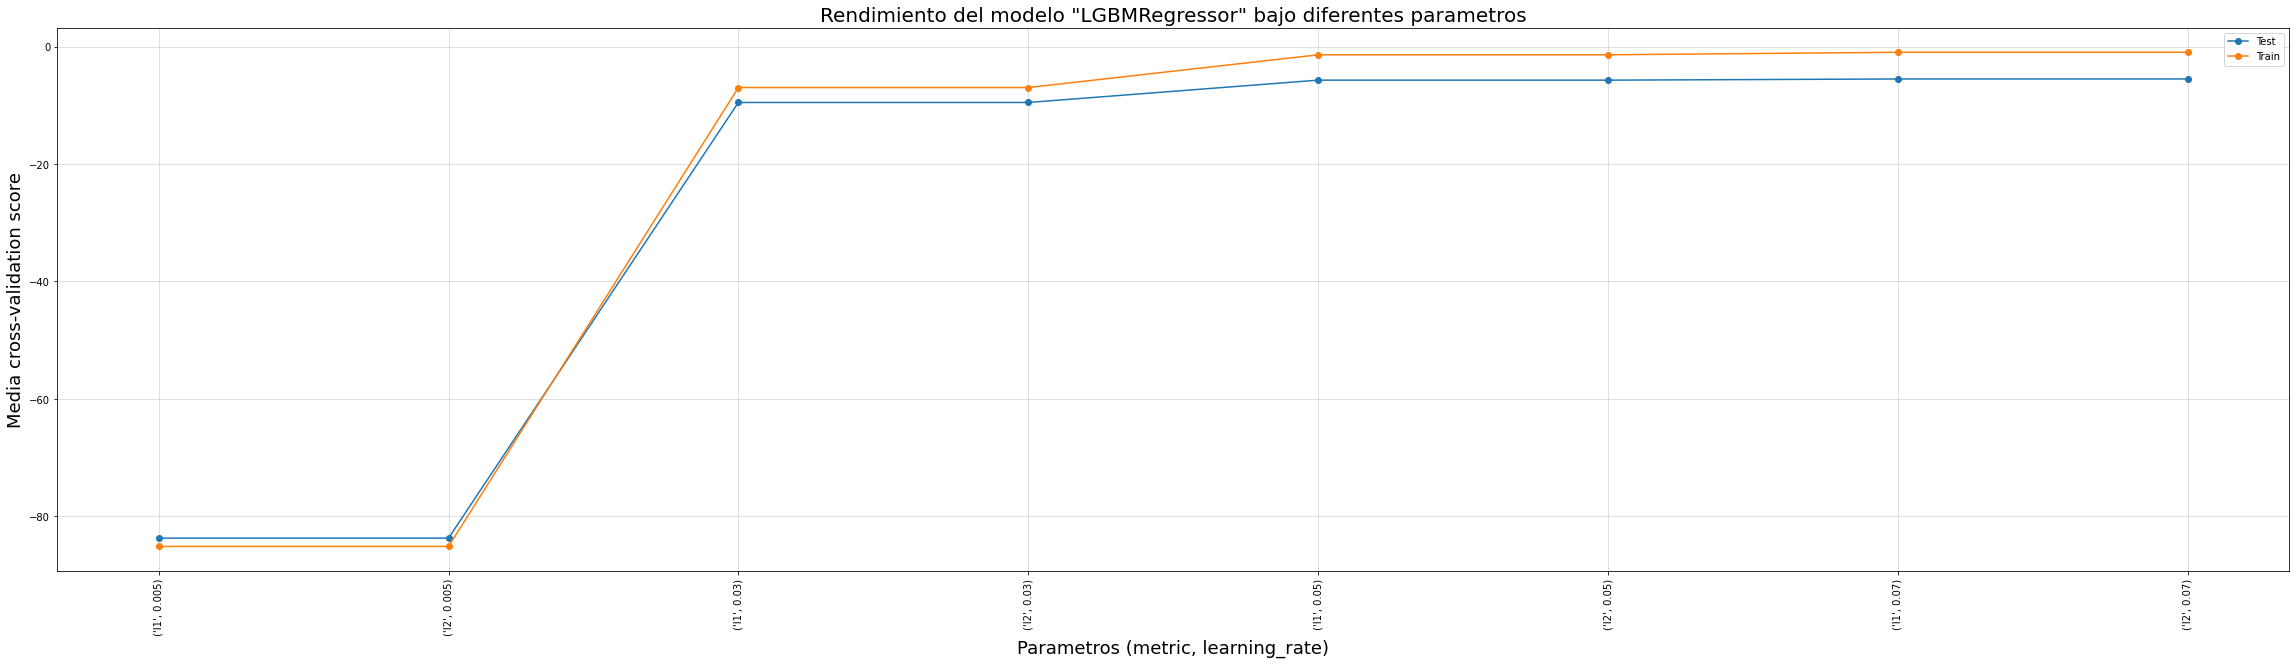

In [123]:
params = [(p['metric'], p['learning_rate']) for p in clf_5.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_5.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_5.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (metric, learning_rate)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "LGBMRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [124]:
#predicciones
y_pred = lgbm.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
0,-0.110380,-0.265640,-0.130000,-0.447351,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.187046,1.127061,-0.522031,-0.205264,-0.204686,-0.040689,-0.127855,0.0047,0.017288,0.012588
1,-0.112391,-0.316904,-0.138069,-0.339244,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.257347,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.019316,0.012716
2,-0.108636,-0.124454,-0.112519,0.075323,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.238314,1.127061,0.337510,-0.129857,-0.197616,-0.040689,-0.127651,0.0333,0.045290,0.011990
3,-0.112255,-0.349400,-0.138069,-0.465566,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.202019,-0.289455,-0.460635,-0.194492,-0.205471,-0.040689,-0.127842,0.0066,0.019316,0.012716
4,-0.111238,0.090127,-0.138069,1.089086,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.107874,-0.289455,-0.522031,-0.205264,-0.205471,-0.040689,-0.127858,0.0044,0.017288,0.012888


In [125]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 126.02452473946067
Minima diferencia: 7.938836120313653e-05


In [126]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
1465,0.125364,0.105534,0.144323,1.62017,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,0.728474,-1.705971,-0.522031,5.04094,3.903159,-0.040689,2.628764,384.72075,510.745275,126.024525


In [127]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,y_test,y_pred,diferencia
97,-0.111708,-0.277126,-0.136724,-0.443372,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.324132,-0.289455,-0.153656,0.053276,-0.001755,-0.040689,-0.120232,1.0686,1.068679,0.000079
1976,-0.111708,-0.277126,-0.136724,-0.443372,-0.133101,-0.069657,-0.106037,-0.128792,-0.126402,-0.324132,-0.289455,-0.153656,0.053276,-0.001755,-0.040689,-0.120232,1.0686,1.068679,0.000079


### 3.1.10 Prediciendo nuevos valores (Con el mejor Modelo Linear Regression)

In [128]:
# df_3 = X_test.sample(n=8,replace=True)
df_3 = df_2.sample(n=8,replace=True)
df_3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,eigencentrality,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia,Authority,Hub,X,Y,Size
1586,7,138,0,592,2,0,0,1,3,966,...,0.003672,0.0120,0.0,0.04800,0.047979,0.000091,0.002449,0.198230,0.773517,0.008325
31,1243,1641,3,81542,0,0,0,0,0,38663,...,0.000000,0.0044,0.0,0.00220,0.002200,0.000000,0.031260,0.609813,0.671532,0.001041
386,1213,4998,0,1487,0,0,0,0,0,10641,...,0.029356,0.0385,0.0,0.09625,0.096361,0.000139,0.031333,0.631002,0.446687,0.005203
3871,196,1061,2,11987,0,0,0,0,0,16446,...,0.000000,0.0044,0.0,0.00440,0.004400,0.000000,0.005826,0.834408,0.470162,0.002081
5268,175,552,0,10981,0,0,0,0,0,10762,...,0.001239,0.0056,0.0,0.01400,0.014004,0.001339,0.000202,0.249161,0.594262,0.005203
492,316,541,2,2310,0,0,0,0,0,3365,...,0.000000,0.0044,0.0,0.00220,0.002200,0.000000,0.000118,0.551182,0.253854,0.001041
7001,50,760,1,7708,0,0,0,0,0,2367,...,0.002443,0.0123,0.0,0.04305,0.043055,0.001080,0.006304,0.523694,0.739495,0.007284
2139,680,2192,13,11034,3,0,0,0,3,42835,...,0.001793,0.0064,0.0,0.01600,0.016029,0.000246,0.002430,0.459372,0.812799,0.005203


In [129]:
df_3.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'indegree', 'outdegree', 'Degree', 'modularity_class', 'Eccentricity',
       'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'eigencentrality', 'pageranks_desnormalizado',
       'aceptacion_50_pct', 'relacion_50_pct', 'indice_influencia',
       'Authority', 'Hub', 'X', 'Y', 'Size'],
      dtype='object')

In [130]:
# 1. Asegurarse de tener las mismas columnas en df_3 que en X
df_3 = df_3[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']]
df_3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct
1586,7,138,0,592,2,0,0,1,3,966,1,4,8.0,0.0120,0.0,0.04800
31,1243,1641,3,81542,0,0,0,0,0,38663,1,3,1.0,0.0044,0.0,0.00220
386,1213,4998,0,1487,0,0,0,0,0,10641,1,3,5.0,0.0385,0.0,0.09625
3871,196,1061,2,11987,0,0,0,0,0,16446,1,2,2.0,0.0044,0.0,0.00440
5268,175,552,0,10981,0,0,0,0,0,10762,1,4,5.0,0.0056,0.0,0.01400
492,316,541,2,2310,0,0,0,0,0,3365,1,2,1.0,0.0044,0.0,0.00220
7001,50,760,1,7708,0,0,0,0,0,2367,1,7,7.0,0.0123,0.0,0.04305
2139,680,2192,13,11034,3,0,0,0,3,42835,1,3,5.0,0.0064,0.0,0.01600


In [135]:
X_new = df_3.loc[492].values.reshape(1,-1)

In [136]:
# 2. Hacer predicciones en df_3 con el modelo entrenado
y_pred = lr.predict(X_new)
y_pred

array([18.42842463])

In [137]:
df_2.loc[1586][['indice_influencia']]

indice_influencia    0.047979
Name: 1586, dtype: float64

---
---

### 3.1.11 Feature Importance (Seleccion de Caracteristicas mas importantes)

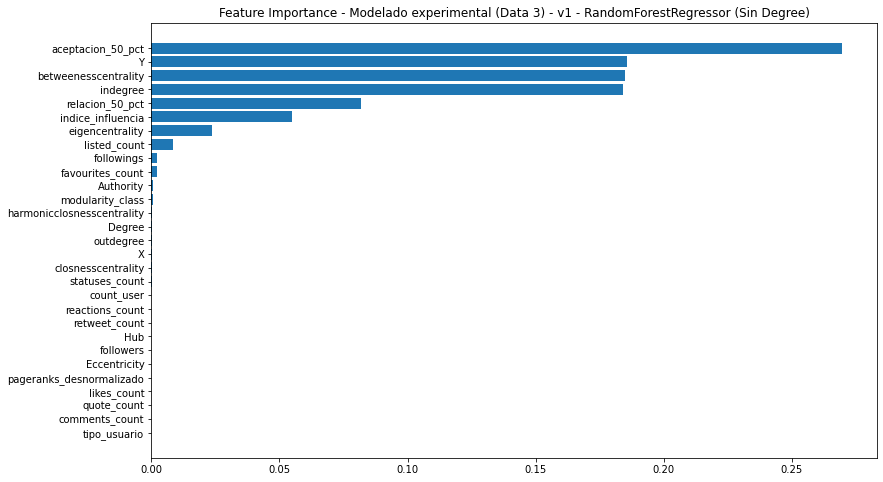

In [281]:
# 3. Prueba de importancia de características: Si el modelo de regresión lineal muestra que "Degree" es la variable más importante, puedes realizar una prueba adicional utilizando algún método de evaluación de características, 
# como el análisis de importancia de características o un modelo de árbol de decisión. Esto te permitirá evaluar la importancia relativa de las variables en función de su capacidad para predecir el resultado objetivo.
from sklearn.ensemble import RandomForestRegressor

X_ = df_2.drop(['Degree', 'Y', 'betweenesscentrality', 'eigencentrality', 'modularity_class', 'X'], axis=1)  # Variables predictoras sin la variable "Degree"
y_ = df_2['Degree']  # Variable objetivo "Degree"

model = RandomForestRegressor()  # Puedes utilizar otro modelo si lo deseas
model.fit(X_, y_)

feature_importance = model.feature_importances_
sort = model.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_2.columns[sort], model.feature_importances_[sort])
plt.title("Feature Importance - Modelado experimental (Data 3) - v1 - RandomForestRegressor (Sin Degree)")
# plot_importance(xgb)
plt.show()

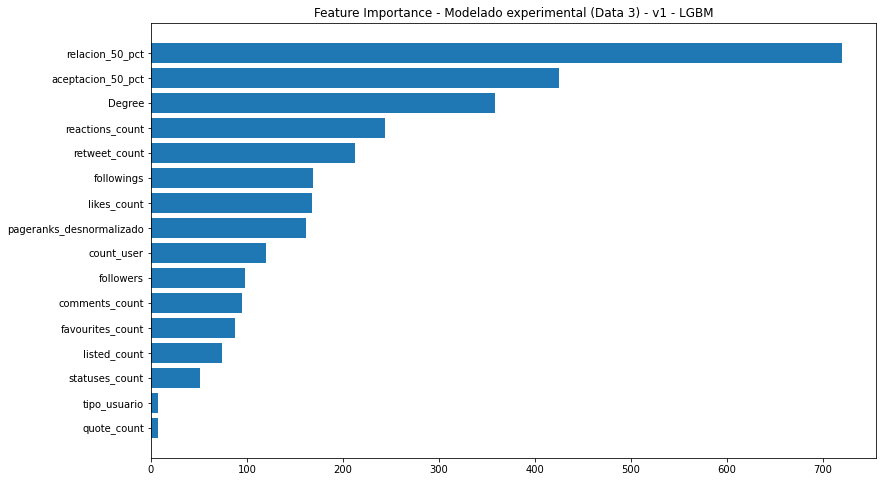

In [140]:
lgbm = lgb.LGBMRegressor(**clf_5.best_params_)
lgbm.fit(X_train_scaled, y_train)

sort = lgbm.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_3.columns[sort], lgbm.feature_importances_[sort])
plt.title("Feature Importance - Modelado experimental (Data 3) - v1 - LGBM")
# plot_importance(xgb)
plt.show()

In [141]:
params = {'max_depth': 2, 'n_estimators': 200} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)

# Seleccionar las características más importantes
sfm = SelectFromModel(xgb, threshold=0.1)
sfm.fit(X_train_scaled, y_train)

# Seleccionar las características más importantes en el conjunto de entrenamiento y de prueba
X_train_imp = sfm.transform(X_train_scaled)

In [142]:
X_train_imp

array([[-0.20526425],
       [ 0.82889515],
       [-0.12985679],
       ...,
       [-0.15140178],
       [-0.20526425],
       [-0.21603674]])

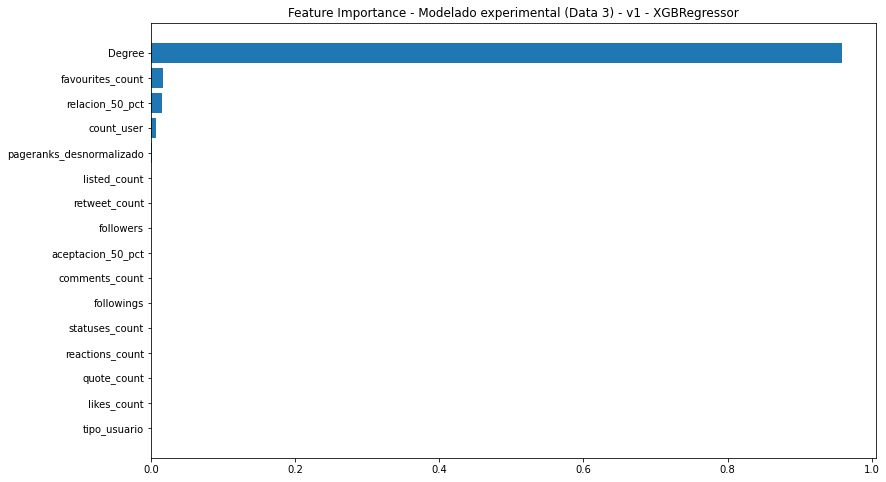

In [143]:
# Entrenar el modelo
# params = {'eta': 0.15, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 0.1, 'seed': 88}
params = {'max_depth': 2, 'n_estimators': 200, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)
# model = xgb.XGBRegressor(random_state=88, **params)
# model.fit(X_train_sclaed, y_train)

# Graficar la importancia de las características

sort = xgb.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_3.columns[sort], xgb.feature_importances_[sort])
plt.title("Feature Importance - Modelado experimental (Data 3) - v1 - XGBRegressor")
# plot_importance(xgb)
plt.show()

In [144]:
# Entrenar el modelo
# params = {'eta': 0.15, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 0.1, 'seed': 88}
params = {'max_depth': 2, 'n_estimators': 200, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)
# Obtener la importancia de las características
importance = xgb.feature_importances_
# Crear un DataFrame con los nombres de las características y su importancia
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
# Ordenar las características por importancia descendente
feature_importance = feature_importance.sort_values('importance', ascending=False)
# Mostrar las características ordenadas por importancia
print(feature_importance)

                     feature    importance
12                    Degree  9.584824e-01
3           favourites_count  1.645769e-02
15           relacion_50_pct  1.512458e-02
11                count_user  7.094859e-03
13  pageranks_desnormalizado  1.951731e-03
2               listed_count  4.485329e-04
5              retweet_count  2.429211e-04
0                  followers  8.319275e-05
14         aceptacion_50_pct  7.958734e-05
7             comments_count  1.769063e-05
1                 followings  8.179212e-06
9             statuses_count  4.975404e-06
8            reactions_count  1.690242e-06
6                quote_count  1.020283e-06
4                likes_count  6.663998e-07
10              tipo_usuario  3.356928e-07


In [145]:
print(X_train.columns)

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'Degree', 'pageranks_desnormalizado', 'aceptacion_50_pct',
       'relacion_50_pct'],
      dtype='object')


/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [146]:
importances = xgb.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/p

In [147]:
# cols_use
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}: {importances[sorted_idx[i]]}")

1. Degree: 0.9584823846817017
2. favourites_count: 0.016457688063383102
3. relacion_50_pct: 0.015124576166272163
4. count_user: 0.007094859145581722
5. pageranks_desnormalizado: 0.001951730577275157
6. listed_count: 0.0004485328681766987
7. retweet_count: 0.00024292110174428672
8. followers: 8.319275366375223e-05
9. aceptacion_50_pct: 7.95873420429416e-05
10. comments_count: 1.769062873790972e-05
11. followings: 8.17921227280749e-06
12. statuses_count: 4.9754044084693305e-06
13. reactions_count: 1.690242470431258e-06
14. quote_count: 1.0202826388194808e-06
15. likes_count: 6.663998419753625e-07
16. tipo_usuario: 3.35692789121822e-07


In [148]:
cols_use = []
for i, feature in enumerate(sorted_features):
    
    if importances[sorted_idx[i]] != 0:
        cols_use.append(feature)
        print(f"{i+1}. {feature}: {importances[sorted_idx[i]]}")

1. Degree: 0.9584823846817017
2. favourites_count: 0.016457688063383102
3. relacion_50_pct: 0.015124576166272163
4. count_user: 0.007094859145581722
5. pageranks_desnormalizado: 0.001951730577275157
6. listed_count: 0.0004485328681766987
7. retweet_count: 0.00024292110174428672
8. followers: 8.319275366375223e-05
9. aceptacion_50_pct: 7.95873420429416e-05
10. comments_count: 1.769062873790972e-05
11. followings: 8.17921227280749e-06
12. statuses_count: 4.9754044084693305e-06
13. reactions_count: 1.690242470431258e-06
14. quote_count: 1.0202826388194808e-06
15. likes_count: 6.663998419753625e-07
16. tipo_usuario: 3.35692789121822e-07


In [149]:
# Entrenar el modelo
params = {'max_depth': 2, 'n_estimators': 200, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
importance = xgb.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})

# Ordenar las características por importancia descendente
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Mostrar las características ordenadas por importancia
print(feature_importance)

                     feature    importance
12                    Degree  9.584824e-01
3           favourites_count  1.645769e-02
15           relacion_50_pct  1.512458e-02
11                count_user  7.094859e-03
13  pageranks_desnormalizado  1.951731e-03
2               listed_count  4.485329e-04
5              retweet_count  2.429211e-04
0                  followers  8.319275e-05
14         aceptacion_50_pct  7.958734e-05
7             comments_count  1.769063e-05
1                 followings  8.179212e-06
9             statuses_count  4.975404e-06
8            reactions_count  1.690242e-06
6                quote_count  1.020283e-06
4                likes_count  6.663998e-07
10              tipo_usuario  3.356928e-07


In [150]:
feature_importance[:10]

,feature,importance
12,Degree,0.958482
3,favourites_count,0.016458
15,relacion_50_pct,0.015125
11,count_user,0.007095
13,pageranks_desnormalizado,0.001952
2,listed_count,0.000449
5,retweet_count,0.000243
0,followers,0.000083
14,aceptacion_50_pct,0.000080
7,comments_count,0.000018


In [151]:
feature_importance[feature_importance['importance']==0.00]

,feature,importance


In [152]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)

LinearRegression()

Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


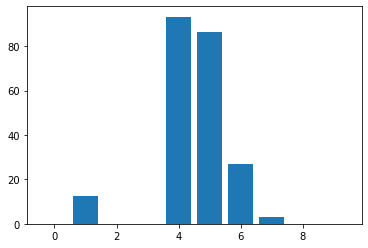

In [153]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [171]:
X_train.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'Degree', 'pageranks_desnormalizado', 'aceptacion_50_pct',
       'relacion_50_pct'],
      dtype='object')

Variable: followers, Score: 14.57181
Variable: followings, Score: 41.79211
Variable: listed_count, Score: -0.00000
Variable: favourites_count, Score: 0.00000
Variable: likes_count, Score: 0.00000
Variable: retweet_count, Score: 44.71054
Variable: quote_count, Score: -0.00000
Variable: comments_count, Score: -0.00000
Variable: reactions_count, Score: 0.00000
Variable: statuses_count, Score: -0.00000
Variable: tipo_usuario, Score: 0.00000
Variable: count_user, Score: 64.69656
Variable: Degree, Score: 0.00000
Variable: pageranks_desnormalizado, Score: 13.84542
Variable: aceptacion_50_pct, Score: 0.00000
Variable: relacion_50_pct, Score: 0.00000


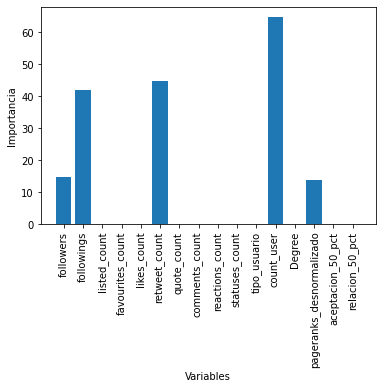

In [174]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Definir el conjunto de datos
X_, y_ = make_regression(n_samples=1000, n_features=16, n_informative=5, random_state=1)
# Definir el modelo
model = LinearRegression()
# Ajustar el modelo
model.fit(X_, y_)
# Obtener la importancia de las características
importance = model.coef_

# Definir los nombres de las variables
variable_names = X_train.columns

# Resumir la importancia de las características
for i, v in enumerate(importance):
    print('Variable: %s, Score: %.5f' % (variable_names[i], v))

# Graficar la importancia de las características
plt.bar(variable_names, importance)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.xticks(rotation=90)
plt.show()

In [160]:
# X.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'Degree', 'pageranks_desnormalizado', 'aceptacion_50_pct',
       'relacion_50_pct'],
      dtype='object')

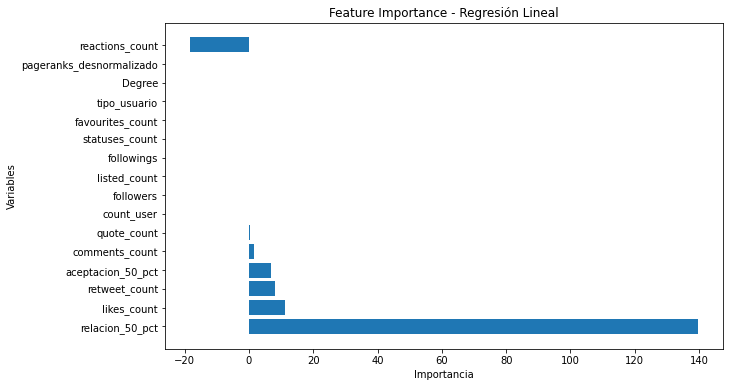

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los coeficientes de regresión del modelo
coeficientes = lr.coef_

# Obtener los nombres de las variables
nombres_variables = X_train.columns

# Ordenar los coeficientes y los nombres de las variables de mayor a menor
indices_ordenados = np.argsort(coeficientes)[::-1]
coeficientes_ordenados = coeficientes[indices_ordenados]
nombres_variables_ordenados = [nombres_variables[i] for i in indices_ordenados]

# Crear el gráfico de Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(coeficientes_ordenados)), coeficientes_ordenados, align='center')
plt.yticks(range(len(nombres_variables_ordenados)), nombres_variables_ordenados)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Feature Importance - Regresión Lineal')

plt.show()

# 4. Validacion de resultados, prediciendo nuevos valores

In [326]:
# df_3 = X_test.sample(n=8,replace=True)
df__3 = df_2.sample(n=8,replace=True)
df__3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,eigencentrality,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia,Authority,Hub,X,Y,Size
7096,69,1292,0,1498,0,0,0,0,0,2198,...,0.000000,0.0044,0.0,0.0044,0.004400,0.000000,0.000722,0.744366,0.736920,0.002081
6336,5568,557,38,11607,0,0,0,0,0,46305,...,0.000000,0.0044,0.0,0.0000,0.000000,0.000000,0.000000,0.920738,0.740270,0.000000
6874,21105,614,62,25329,1,0,0,3,4,55079,...,1.000000,3.3240,0.0,1597.1820,1597.184011,0.972579,0.000423,0.603649,0.622570,1.000000
3939,24,96,0,89,0,0,0,0,0,2460,...,0.000988,0.0128,0.0,0.0192,0.019173,0.000000,0.000089,0.057507,0.597962,0.003122
3952,319,401,2,172677,0,0,0,0,0,82494,...,0.000000,0.0044,0.0,0.0220,0.022000,0.000000,0.041067,0.257531,0.550014,0.010406
575,17771,4132,214,494,0,0,0,0,0,16772,...,0.139298,0.5057,0.0,26.2964,26.296400,0.032597,0.001246,0.245088,0.400068,0.108221
4458,325,987,0,19693,0,0,0,0,0,2905,...,0.000000,0.0044,0.0,0.0132,0.013200,0.000000,0.033003,0.562127,0.726875,0.006243
1336,6,8,0,5,0,0,0,0,0,30253,...,0.000000,0.0044,0.0,0.0022,0.002200,0.000000,0.000000,0.737911,0.170497,0.001041


In [327]:
df__3.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'indegree', 'outdegree', 'Degree', 'modularity_class', 'Eccentricity',
       'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'eigencentrality', 'pageranks_desnormalizado',
       'aceptacion_50_pct', 'relacion_50_pct', 'indice_influencia',
       'Authority', 'Hub', 'X', 'Y', 'Size'],
      dtype='object')

In [328]:
# 1. Asegurarse de tener las mismas columnas en df_3 que en X
df__3 = df__3[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
     'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct']]
df__3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct
7096,69,1292,0,1498,0,0,0,0,0,2198,1,2,2.0,0.0044,0.0,0.0044
6336,5568,557,38,11607,0,0,0,0,0,46305,0,4,0.0,0.0044,0.0,0.0000
6874,21105,614,62,25329,1,0,0,3,4,55079,0,47,961.0,3.3240,0.0,1597.1820
3939,24,96,0,89,0,0,0,0,0,2460,1,3,3.0,0.0128,0.0,0.0192
3952,319,401,2,172677,0,0,0,0,0,82494,1,16,10.0,0.0044,0.0,0.0220
575,17771,4132,214,494,0,0,0,0,0,16772,0,64,104.0,0.5057,0.0,26.2964
4458,325,987,0,19693,0,0,0,0,0,2905,1,7,6.0,0.0044,0.0,0.0132
1336,6,8,0,5,0,0,0,0,0,30253,1,7,1.0,0.0044,0.0,0.0022


In [329]:
X__new = df__3.loc[7096].values.reshape(1,-1)

In [330]:
# 2. Hacer predicciones en df_3 con el modelo entrenado
y__pred = lr.predict(X__new)
y__pred

array([0.0044])

In [176]:
df_2.loc[7096][['indice_influencia']]

indice_influencia    0.0044
Name: 7096, dtype: float64

In [177]:
df_2.loc[7096]

followers                       69.000000
followings                    1292.000000
listed_count                     0.000000
favourites_count              1498.000000
likes_count                      0.000000
retweet_count                    0.000000
quote_count                      0.000000
comments_count                   0.000000
reactions_count                  0.000000
statuses_count                2198.000000
tipo_usuario                     1.000000
count_user                       2.000000
indegree                         0.000000
outdegree                        2.000000
Degree                           2.000000
modularity_class               152.000000
Eccentricity                    10.000000
closnesscentrality               0.180655
harmonicclosnesscentrality       0.197796
betweenesscentrality             0.000000
eigencentrality                  0.000000
pageranks_desnormalizado         0.004400
aceptacion_50_pct                0.000000
relacion_50_pct                  0

##  4.1 Visualizaciones (metricas comparativas)

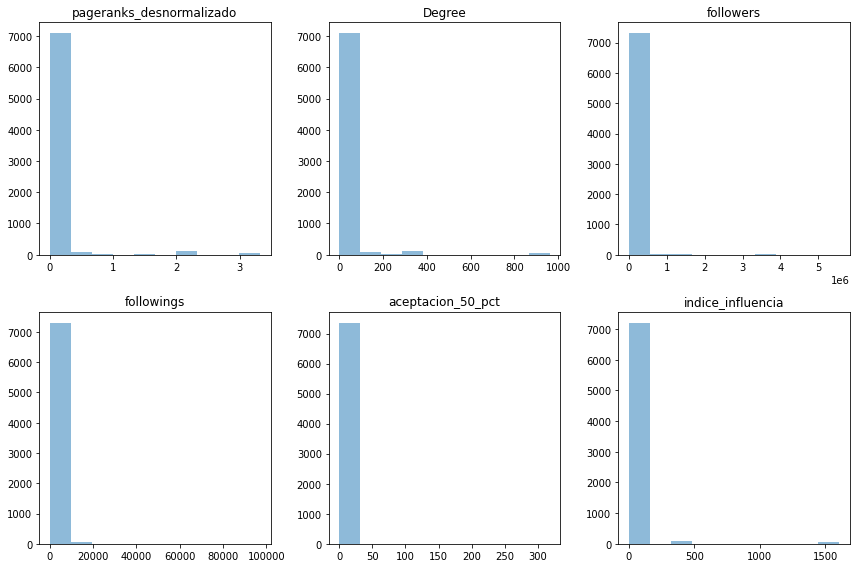

In [178]:
import matplotlib.pyplot as plt

# Variables
variables = ['pageranks_desnormalizado', 'Degree', 'followers',
             'followings', 'aceptacion_50_pct', 'indice_influencia']

# Crear una figura y ejes con 2 filas y 3 columnas de subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Iterar sobre las variables y los subplots
for i, variable in enumerate(variables):
    # Obtener las coordenadas del subplot correspondiente
    row = i // 3
    col = i % 3
    
    # Graficar el histograma en el subplot correspondiente
    axs[row, col].hist(df[variable], bins=10, alpha=0.5)
    axs[row, col].set_title(variable)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 4.2 Mean Absolute Error (MAE)

In [179]:
# 1. Mean Absolute Error (MAE):
from sklearn.metrics import mean_absolute_error

# Calcular el MAE para los datos de entrenamiento
mae_train = mean_absolute_error(y_train, clf_4.predict(X_train_scaled))

# Calcular el MAE para los datos de prueba
mae_test = mean_absolute_error(y_test, clf_4.predict(X_test_scaled))

### 4.3 R-squared (R²)

In [180]:
# 2. R-squared (R²):
from sklearn.metrics import r2_score

# Calcular el R² para los datos de entrenamiento
r2_train = r2_score(y_train, clf_4.predict(X_train_scaled))

# Calcular el R² para los datos de prueba
r2_test = r2_score(y_test, clf_4.predict(X_test_scaled))


In [181]:
# # 3. Mean Squared Logarithmic Error (MSLE): ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
# from sklearn.metrics import mean_squared_log_error

# # Calcular el MSLE para los datos de entrenamiento
# msle_train = mean_squared_log_error(y_train, clf_4.predict(X_train_scaled))

# # Calcular el MSLE para los datos de prueba
# msle_test = mean_squared_log_error(y_test, clf_4.predict(X_test_scaled))

### 4.4 Median Absolute Error (MedAE)

In [182]:
# 4. Median Absolute Error (MedAE):
from sklearn.metrics import median_absolute_error

# Calcular el MedAE para los datos de entrenamiento
medae_train = median_absolute_error(y_train, clf_4.predict(X_train_scaled))

# Calcular el MedAE para los datos de prueba
medae_test = median_absolute_error(y_test, clf_4.predict(X_test_scaled))

### 4.5 Comparacion de metricas de evaluacion del mejor modelo (Linear Regressor)

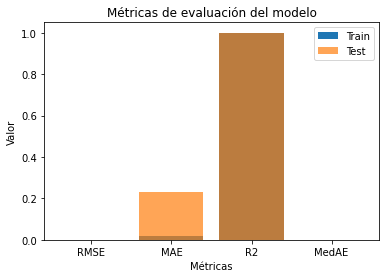

In [290]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Calcular las predicciones del modelo
y_pred_train = clf_.predict(X_train_scaled)
y_pred_test = clf_.predict(X_test_scaled)

# Calcular las métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# mae_train = mean_absolute_error(y_train, y_pred_train)
# mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

medae_train = median_absolute_error(y_train, y_pred_train)
medae_test = median_absolute_error(y_test, y_pred_test)

# Crear el gráfico de barras
labels = ['RMSE', 'MAE', 'R2', 'MedAE']
# labels = ['RMSE', 'R2', 'MedAE']
metrics_train = [rmse_train, mae_train, r2_train, medae_train]
# metrics_train = [rmse_train,  r2_train, medae_train]
metrics_test = [rmse_test, mae_test, r2_test, medae_test]
# metrics_test = [rmse_test,  r2_test, medae_test]

plt.bar(labels, metrics_train, label='Train')
plt.bar(labels, metrics_test, label='Test', alpha=0.7)
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de evaluación del modelo')
plt.legend()
plt.show()

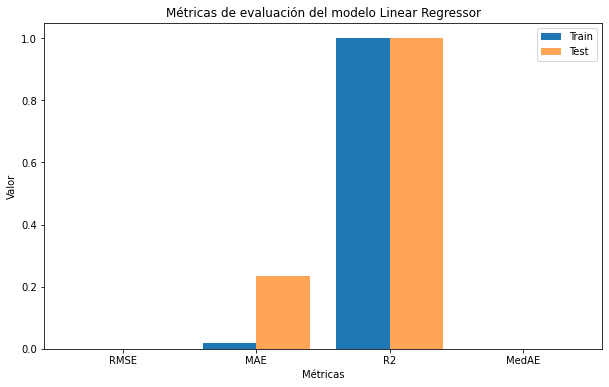

In [291]:
# Definir la posición de las barras para entrenamiento y prueba
x_train = np.arange(len(labels))
x_test = x_train + 0.4  # Ajustar el espaciado entre las barras

# Definir el ancho de las barras
width = 0.4

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras para entrenamiento y prueba
ax.bar(x_train, metrics_train, width, label='Train')
ax.bar(x_test, metrics_test, width, label='Test', alpha=0.7)

# Configurar los ejes y las etiquetas
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Métricas de evaluación del modelo Linear Regressor')
ax.set_xticks(x_train + width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

In [293]:
print(labels)
print(metrics_train)
print(metrics_test)

['RMSE', 'MAE', 'R2', 'MedAE']
[1.7530987484615856e-13, 0.018099021323237575, 1.0, 3.340903942383733e-14]
[1.9970092160962376e-13, 0.23276005247258952, 1.0, 3.3549118344522455e-14]


In [295]:
import pandas as pd

# Crear el diccionario con los datos
metrics_dict = {
    'Métricas': labels,
    'Train': metrics_train,
    'Test': metrics_test
}

# Crear el dataframe
metrics_df = pd.DataFrame(metrics_dict)

# Mostrar el dataframe
metrics_df


,Métricas,Train,Test
0,RMSE,1.753099e-13,1.997009e-13
1,MAE,1.809902e-02,2.327601e-01
2,R2,1.000000e+00,1.000000e+00
3,MedAE,3.340904e-14,3.354912e-14


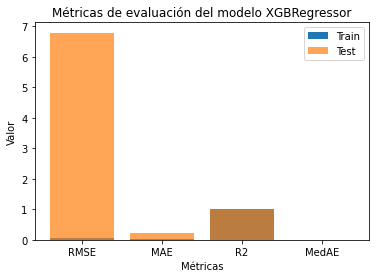

In [234]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Calcular las predicciones del modelo XGBRegressor
y_pred_train = clf_4.predict(X_train_scaled)
y_pred_test = clf_4.predict(X_test_scaled)

# Calcular las métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# mae_train = mean_absolute_error(y_train, y_pred_train)
# mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

medae_train = median_absolute_error(y_train, y_pred_train)
medae_test = median_absolute_error(y_test, y_pred_test)

# Crear el gráfico de barras
labels = ['RMSE', 'MAE', 'R2', 'MedAE']
# labels = ['RMSE', 'R2', 'MedAE']
metrics_train = [rmse_train, mae_train, r2_train, medae_train]
# metrics_train = [rmse_train,  r2_train, medae_train]
metrics_test = [rmse_test, mae_test, r2_test, medae_test]
# metrics_test = [rmse_test,  r2_test, medae_test]

plt.bar(labels, metrics_train, label='Train')
plt.bar(labels, metrics_test, label='Test', alpha=0.7)
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de evaluación del modelo XGBRegressor')
plt.legend()
plt.show()

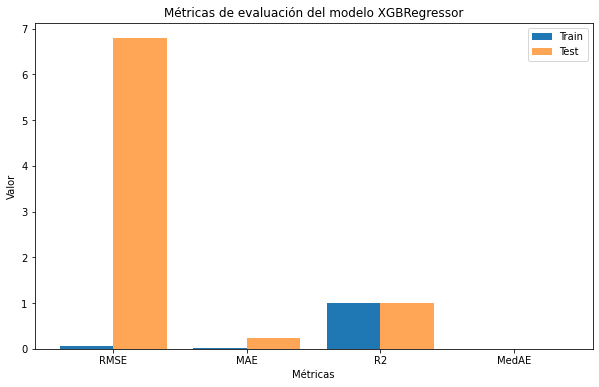

In [235]:
# Definir la posición de las barras para entrenamiento y prueba
x_train = np.arange(len(labels))
x_test = x_train + 0.4  # Ajustar el espaciado entre las barras

# Definir el ancho de las barras
width = 0.4

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras para entrenamiento y prueba
ax.bar(x_train, metrics_train, width, label='Train')
ax.bar(x_test, metrics_test, width, label='Test', alpha=0.7)

# Configurar los ejes y las etiquetas
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Métricas de evaluación del modelo XGBRegressor')
ax.set_xticks(x_train + width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

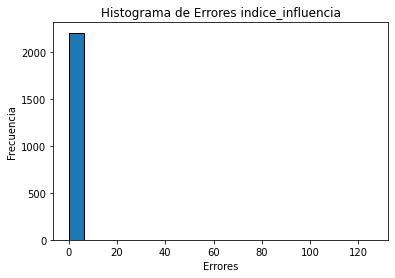

In [188]:
# Calcular los errores (diferencia entre los valores reales y los valores predichos)
errores = df_predict['diferencia']

# Graficar el histograma de los errores
plt.hist(errores, bins=20, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Errores indice_influencia')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

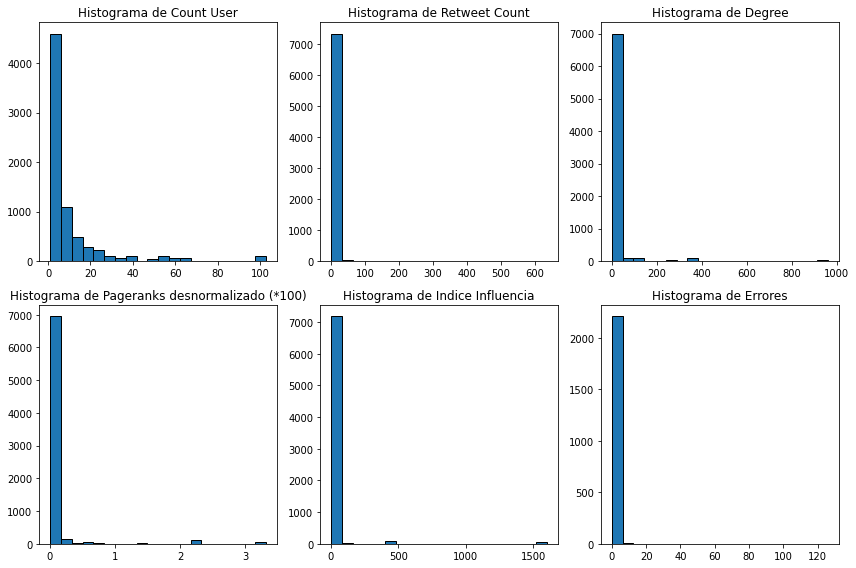

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Histograma para count_user
axs[0, 0].hist(df_2['count_user'], bins=20, edgecolor='black')
axs[0, 0].set_title('Histograma de Count User')

# Histograma para retweet_count
axs[0, 1].hist(df_2['retweet_count'], bins=20, edgecolor='black')
axs[0, 1].set_title('Histograma de Retweet Count')

# Histograma para Degree
axs[0, 2].hist(df_2['Degree'], bins=20, edgecolor='black')
axs[0, 2].set_title('Histograma de Degree')

# Histograma para pageranks
axs[1, 0].hist(df_2['pageranks_desnormalizado'], bins=20, edgecolor='black')
axs[1, 0].set_title('Histograma de Pageranks desnormalizado (*100)')

# Histograma para indice_influencia
axs[1, 1].hist(df['indice_influencia'], bins=20, edgecolor='black')
axs[1, 1].set_title('Histograma de Indice Influencia')

# Histograma para diferencia
axs[1, 2].hist(df_predict['diferencia'], bins=20, edgecolor='black')
axs[1, 2].set_title('Histograma de Errores')

# Ajustar la distancia entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

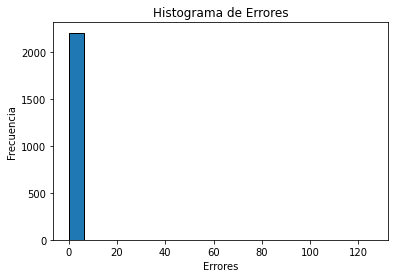

In [237]:
# Calcular los errores (diferencia entre los valores reales y los valores predichos)
errores = df_predict['diferencia']

# Graficar el histograma de los errores
plt.hist(errores, bins=20, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [191]:
df['username'] 

0       foro_todofutbol
1        miguel28gangel
2        RichardZapata8
3           correajorge
4           LeafarPetit
             ...       
7364         javisu2272
7365        carlospa200
7366            wagg321
7367        Gustavo_BHR
7368         Lord11_BHR
Name: username, Length: 7369, dtype: object

---
**Nota:**

**Si bien en un modelo de regresión lineal los coeficientes de regresión no representan una medida directa de importancia de las variables, hay otras técnicas que puedes utilizar para analizar la importancia o influencia de las variables en el modelo. A continuación, te sugiero algunas opciones:**

- **Análisis de coeficientes y p-values:** Analizamos los coeficientes de regresión y los p-values asociados para evaluar la significancia estadística de cada variable en el modelo. Esto nos dará una idea de qué variables tienen una relación más fuerte con la variable de respuesta. Utilizamos la biblioteca statsmodels para obtener estos resultados.

- **Análisis de correlación:** Calculamos la matriz de correlación entre las variables independientes y la variable dependiente. Las variables con una correlación más fuerte (positiva o negativa) pueden considerarse como más importantes en el modelo. Utilizamos la biblioteca pandas para calcular la matriz de correlación y la biblioteca seaborn para visualizarla.

- **Selección de variables:** Al tener un conjunto de variables independientes grande, puedes utilizar técnicas de selección de variables para identificar las variables más relevantes. Algunas técnicas populares incluyen la selección hacia adelante (forward selection), selección hacia atrás (backward selection) o eliminación recursiva de características (recursive feature elimination). Utilizamos la biblioteca scikit-learn que ofrece varias funciones y algoritmos para la selección de variables.

- **Análisis de residuos:** Analizamos los residuos del modelo de regresión para identificar patrones o dependencias que puedan sugerir la importancia de ciertas variables. Por ejemplo, si hay un patrón sistemático en los residuos en relación con una variable específica, eso podría indicar que esa variable es importante en el modelo. Utilizamos gráficos de residuos y realizar pruebas adicionales para investigar más a fondo.
---

### 4.6 Análisis de coeficientes y p-values

In [297]:
# https://stackoverflow.com/questions/71106940/cannot-import-name-centered-from-scipy-signal-signaltools
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [307]:
X_train

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,tipo_usuario,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct
2560,1031,565,5,4590,2,0,0,0,2,15040,2,4,2.0,0.0063,0.000000,0.00630
5906,10373,211,83,1095,0,0,0,0,0,9798,0,14,98.0,0.2350,0.000000,11.51500
6803,1376,1028,2,1338,0,0,0,0,0,68966,2,14,9.0,0.0109,0.000000,0.04905
5330,133,267,0,31114,0,0,0,0,0,32544,1,2,2.0,0.0044,0.000000,0.00440
4785,1150147,214,3448,1370,7,2,0,2,11,36907,0,12,4.0,0.0075,0.083333,0.01500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,971,971,19,28705,0,0,0,0,0,22465,2,16,9.0,0.0074,0.000000,0.03330
6687,1967,1154,7,3971,0,0,0,0,0,4318,2,2,2.0,0.0044,0.000000,0.00440
3912,69,74,0,1117,0,0,0,0,0,56334,2,12,7.0,0.0044,0.000000,0.01540
3768,1796,5004,15,8691,0,0,0,0,0,69862,1,2,2.0,0.0044,0.000000,0.00440


In [310]:
# Análisis de coeficientes y p-values:
import statsmodels.api as sm
import pandas as pd

# Cargar los datos
# data = pd.read_csv('datos.csv')
# X = data[['Variable1', 'Variable2', 'Variable3']]
# y = data['VariableObjetivo']

# Añadir una constante a la matriz de características
X1 = sm.add_constant(X_train)

# Ajustar el modelo de regresión
model = sm.OLS(y_train, X1).fit()

# Obtener los coeficientes de regresión y los p-values
coeficients = model.params
p_values = model.pvalues

# Imprimir los resultados
results = pd.DataFrame({'Coeficientes': coeficients, 'p-values': p_values})
print(results)

                          Coeficientes      p-values
const                    -6.540175e-15  9.798850e-01
followers                 6.842552e-18  1.056767e-06
followings               -2.261019e-15  0.000000e+00
listed_count             -2.445271e-16  6.228105e-01
favourites_count          2.915516e-17  1.651104e-42
likes_count              -3.122420e-15  9.486918e-01
retweet_count            -2.236724e-15  9.661398e-01
quote_count               2.213358e-14  9.179436e-01
comments_count            7.270089e-16  9.934260e-01
reactions_count           5.178010e-15  9.065958e-01
statuses_count            7.606809e-18  4.587182e-51
tipo_usuario              9.045412e-15  9.565739e-01
count_user                4.934554e-16  9.624977e-01
Degree                    3.950953e-16  9.614590e-01
pageranks_desnormalizado -1.112012e-13  9.230838e-01
aceptacion_50_pct         1.000000e+00  0.000000e+00
relacion_50_pct           1.000000e+00  0.000000e+00


- **Los resultados obtenidos muestran los coeficientes de regresión y los p-values correspondientes para cada variable en el modelo de regresión lineal. Estos valores son útiles para evaluar la importancia estadística de cada variable en relación con la variable objetivo. Los coeficientes de regresión indican la dirección y magnitud del impacto de cada variable en la variable objetivo. Por ejemplo, un coeficiente positivo significa que un aumento en el valor de la variable está asociado con un aumento en la variable objetivo, mientras que un coeficiente negativo indica una relación inversa.**

- **Los p-values proporcionan una medida de la significancia estadística de cada coeficiente. Un p-value pequeño (generalmente por debajo de un umbral establecido, como 0.05) indica que el coeficiente es estadísticamente significativo, lo que sugiere una relación real entre la variable y la variable objetivo. Por otro lado, un p-value grande sugiere que el coeficiente no es estadísticamente significativo y que la variable puede no tener una influencia importante en el modelo.**

- **En base a los resultados que has obtenido, puedes observar que algunas variables como "aceptacion_50_pct" y "relacion_50_pct" tienen coeficientes con magnitudes relativamente grandes y p-values muy pequeños, lo que indica una fuerte influencia estadísticamente significativa en la variable objetivo. Estas variables tienen coeficientes positivos y p-values de 0.0, lo que sugiere una relación fuerte y altamente significativa con la variable objetivo. Lo cual es logico por que estas suman el indice de influencia**

**Nota: Es importante considerar tanto los coeficientes como los p-values al interpretar la importancia de las variables en el modelo de regresión lineal. Además, otros factores como la correlación entre las variables y el contexto del problema también deben tenerse en cuenta para obtener una comprensión completa de la influencia de las variables en el modelo.**

---

**Según los resultados, las tres variables con los mayores coeficientes y los p-values más pequeños son:**

- **1. "aceptacion_50_pct":**
    - **Coeficiente: 1.000000**
    - **p-value: 0.0**
    


- **2. "relacion_50_pct":**

    - **Coeficiente: 1.000000**
    - **p-value: 0.0**

**Esto sugiere que estas dos variables tienen una relación más fuerte y estadísticamente significativa con la variable objetivo en el modelo de regresión lineal. Estas variables tienen coeficientes positivos y p-values muy pequeños, lo que indica que tienen una fuerte influencia estadísticamente significativa en la variable objetivo.**


### 4.7 Correlacion
Vamos a evaluar estadísticamente la correlación entre las variables y confirmar la importancia de la variable "Degree" en relación con las demás, puedes realizar algunas pruebas adicionales utilizando métodos estadísticos:

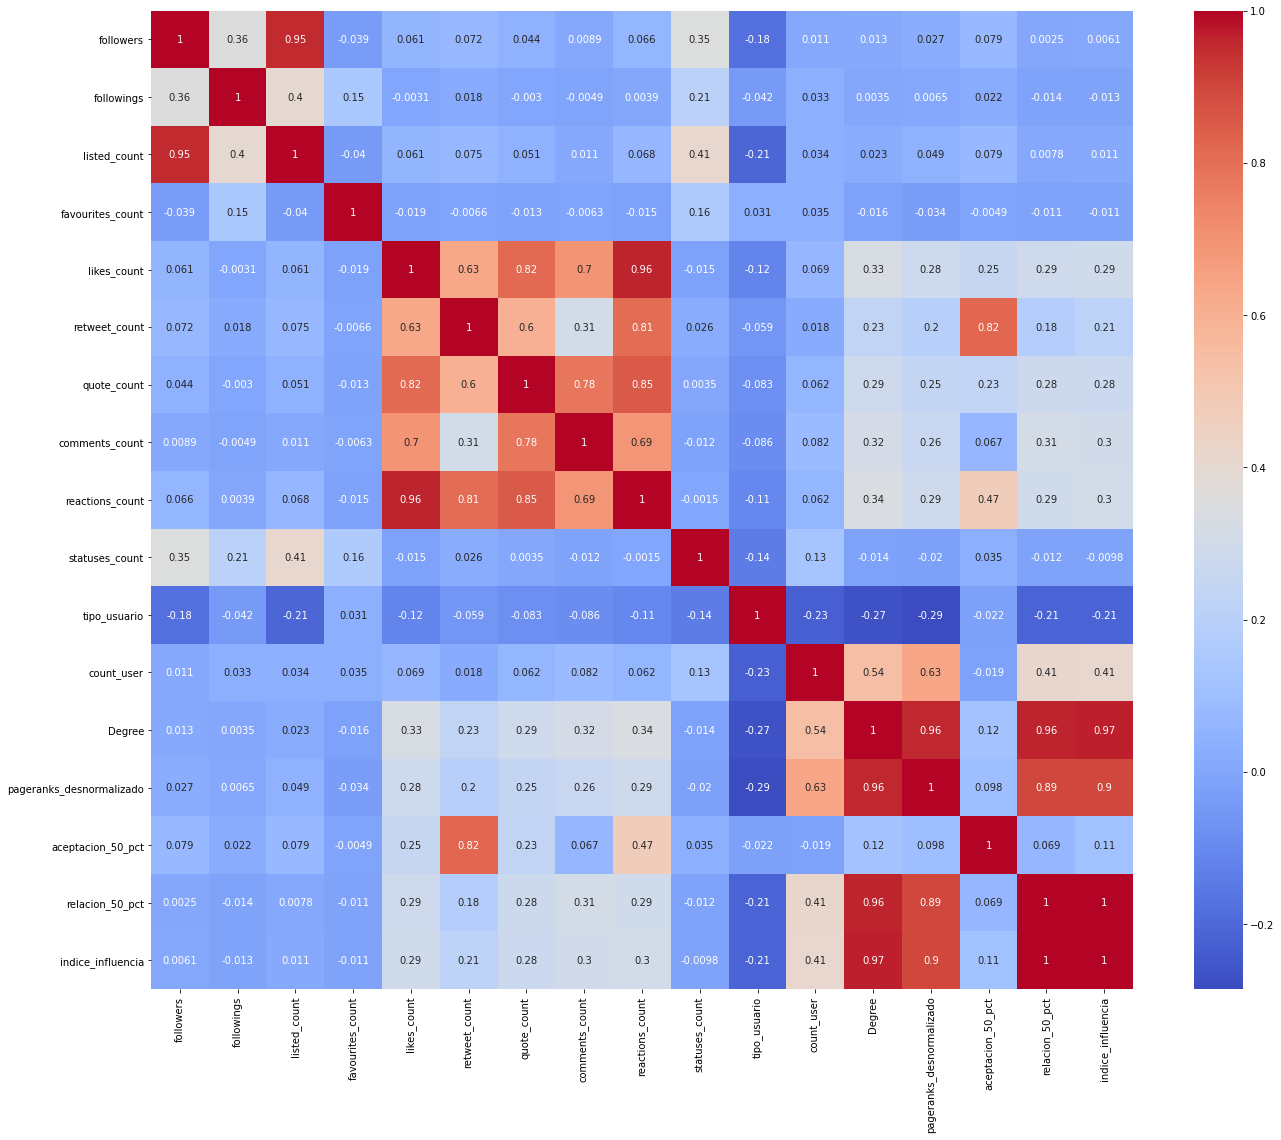

In [245]:
# Análisis de correlación
import pandas as pd
import seaborn as sns
# Calcular la matriz de correlación
correlation_matrix = df_2[['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'tipo_usuario', 'count_user',
       'Degree', 'pageranks_desnormalizado', 'aceptacion_50_pct',
       'relacion_50_pct','indice_influencia']].corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(22,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [321]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Calcular las correlaciones de Pearson y Spearman junto con los p-values
correlations = {}
p_values = {}

# Calcular correlación y p-value para la variable 'relacion_50_pct'
correlations['relacion_50_pct'], p_values['relacion_50_pct'] = pearsonr(df_2['relacion_50_pct'], df_2['indice_influencia'])
correlations['relacion_50_pct (Spearman)'], p_values['relacion_50_pct (Spearman)'] = spearmanr(df_2['relacion_50_pct'], df_2['indice_influencia'])

# Calcular correlación y p-value para la variable 'aceptacion_50_pct'
correlations['aceptacion_50_pct'], p_values['aceptacion_50_pct'] = pearsonr(df_2['aceptacion_50_pct'], df_2['indice_influencia'])
correlations['aceptacion_50_pct (Spearman)'], p_values['aceptacion_50_pct (Spearman)'] = spearmanr(df_2['aceptacion_50_pct'], df_2['indice_influencia'])

# Calcular correlación y p-value para la variable 'Degree'
correlations['Degree'], p_values['Degree'] = pearsonr(df_2['Degree'], df_2['indice_influencia'])
correlations['Degree (Spearman)'], p_values['Degree (Spearman)'] = spearmanr(df_2['Degree'], df_2['indice_influencia'])

# Crear el DataFrame de resultados
results = pd.DataFrame({'Correlación Pearson': [correlations['relacion_50_pct'], correlations['aceptacion_50_pct'], correlations['Degree']],
                        'p-value Pearson': [p_values['relacion_50_pct'], p_values['aceptacion_50_pct'], p_values['Degree']],
                        'Correlación Spearman': [correlations['relacion_50_pct (Spearman)'], correlations['aceptacion_50_pct (Spearman)'], correlations['Degree (Spearman)']],
                        'p-value Spearman': [p_values['relacion_50_pct (Spearman)'], p_values['aceptacion_50_pct (Spearman)'], p_values['Degree (Spearman)']]},
                       index=['relacion_50_pct', 'aceptacion_50_pct', 'Degree'])

# Imprimir los resultados
results

,Correlación Pearson,p-value Pearson,Correlación Spearman,p-value Spearman
relacion_50_pct,0.998857,0.000000e+00,0.966319,0.0
aceptacion_50_pct,0.111525,7.842466e-22,0.465667,0.0
Degree,0.965753,0.000000e+00,0.911071,0.0


In [324]:
# 1. Prueba de correlación de Pearson: Puedes calcular la correlación de Pearson entre las variables numéricas utilizando la función pearsonr de la biblioteca scipy.stats. Esta prueba te dará el coeficiente de correlación y un valor p para evaluar la significancia de la correlación. Un valor alto para el coeficiente de correlación y un valor bajo para p indicarán una correlación fuerte y significativa.
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_2['relacion_50_pct'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.9988571185459725
p_value: 0.0


In [325]:
# 1. Prueba de correlación de Pearson: Puedes calcular la correlación de Pearson entre las variables numéricas utilizando la función pearsonr de la biblioteca scipy.stats. Esta prueba te dará el coeficiente de correlación y un valor p para evaluar la significancia de la correlación. Un valor alto para el coeficiente de correlación y un valor bajo para p indicarán una correlación fuerte y significativa.
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_2['aceptacion_50_pct'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.1115251006806712
p_value: 7.842466415374291e-22


In [323]:
# 1. Prueba de correlación de Pearson: Puedes calcular la correlación de Pearson entre las variables numéricas utilizando la función pearsonr de la biblioteca scipy.stats. Esta prueba te dará el coeficiente de correlación y un valor p para evaluar la significancia de la correlación. Un valor alto para el coeficiente de correlación y un valor bajo para p indicarán una correlación fuerte y significativa.
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_2['Degree'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.9657530190061506
p_value: 0.0


In [327]:
# 2. Prueba de correlación de Spearman: Si tus variables no siguen una distribución normal o si la relación no es lineal, puedes utilizar la correlación de Spearman en lugar de la de Pearson. Esta prueba calcula la correlación basada en los rangos de los datos en lugar de los valores exactos.
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df_2['relacion_50_pct'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.9663190408353785
p_value: 0.0


In [328]:
# 2. Prueba de correlación de Spearman: Si tus variables no siguen una distribución normal o si la relación no es lineal, puedes utilizar la correlación de Spearman en lugar de la de Pearson. Esta prueba calcula la correlación basada en los rangos de los datos en lugar de los valores exactos.
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df_2['aceptacion_50_pct'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.4656665084125445
p_value: 0.0


In [329]:
# 2. Prueba de correlación de Spearman: Si tus variables no siguen una distribución normal o si la relación no es lineal, puedes utilizar la correlación de Spearman en lugar de la de Pearson. Esta prueba calcula la correlación basada en los rangos de los datos en lugar de los valores exactos.
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df_2['Degree'], df_2['indice_influencia'])
print('Correlacion:', correlation)
print('p_value:', p_value)

Correlacion: 0.9110707153481806
p_value: 0.0


- **La discrepancia entre el coeficiente y el p-value de la variable "aceptacion_50_pct" y los valores de correlación de Pearson y Spearman con la variable "indice_influencia" puede deberse a la naturaleza de las medidas y la relación subyacente en los datos.**

- **El coeficiente y el p-value se refieren a la relación entre la variable "aceptacion_50_pct" y la variable "indice_influencia" en el modelo de regresión lineal. Un coeficiente de 1.0 y un p-value de 0.0 indican una relación perfecta y altamente significativa entre estas dos variables en el contexto del modelo de regresión lineal. Esto significa que, según el modelo de regresión lineal, la variable "aceptacion_50_pct" tiene el mayor impacto en la predicción de la variable "indice_influencia".**

- **Sin embargo, al calcular la correlación de Pearson y Spearman, se evalúa la relación general entre las variables sin considerar un modelo específico. En este caso, la variable "Degree" muestra una correlación más alta con la variable "indice_influencia" en comparación con "aceptacion_50_pct". Esto puede indicar que, a nivel de correlación, "Degree" tiene una relación más fuerte y directa con "indice_influencia".**

- **Es importante tener en cuenta que la interpretación de los resultados puede variar según el enfoque y el contexto del análisis. El coeficiente y el p-value del modelo de regresión lineal reflejan la influencia dentro del modelo, mientras que la correlación de Pearson y Spearman evalúa la relación general entre las variables sin considerar un modelo específico.**

#### Nota: Evaluar Degree vs Indice_Influencia
** Si deseas evaluar la variable "Degree" en función de otra variable con la cual tiene una alta correlación (0.97 según el heatmap), puedes realizar lo siguiente:**

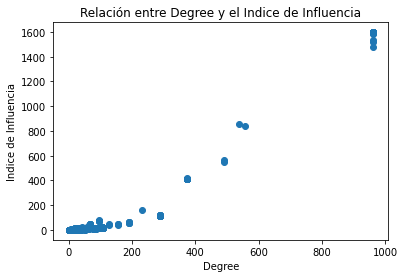

In [272]:
# 3. Graficar la relación entre las dos variables: Puedes utilizar un gráfico de dispersión para visualizar la relación entre "Degree" y la otra variable. Esto te permitirá observar la tendencia general de los puntos y determinar si existe una relación lineal o no.
import matplotlib.pyplot as plt

plt.scatter(df_2['Degree'], df_2['indice_influencia'])
plt.xlabel('Degree')
plt.ylabel('Indice de Influencia')
plt.title('Relación entre Degree y el Indice de Influencia')
plt.show()


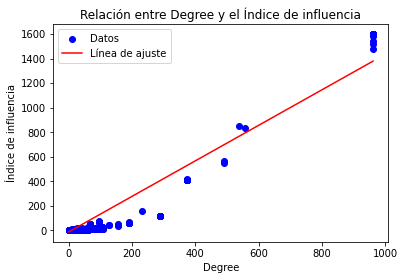

In [274]:
import matplotlib.pyplot as plt

# Datos de Degree y el índice de influencia
degree = df_2['Degree']
influencia = df_2['indice_influencia']

# Gráfico de dispersión
plt.scatter(degree, influencia, color='blue', label='Datos')

# Ajuste de la línea recta
coefficients = np.polyfit(degree, influencia, 1)
polynomial = np.poly1d(coefficients)
x__ = np.linspace(min(degree), max(degree), 100)
plt.plot(x__, polynomial(x__), color='red', label='Línea de ajuste')

# Configuración del gráfico
plt.xlabel('Degree')
plt.ylabel('Índice de influencia')
plt.title('Relación entre Degree y el Índice de influencia')
plt.legend()

# Mostrar el gráfico
plt.show()

**Si tienes un valor atípico que distorsiona la relación entre las variables, es posible que al eliminarlo obtengas una relación más lineal entre "Degree" y el índice de influencia.**

**Para evaluar esto, seguimos los siguientes pasos:**

- Identificamos el usuario con el mayor índice de influencia, que actúa como un outlier.
- Creamos una copia del DataFrame original y eliminamos el registro correspondiente a ese usuario.
- Volvemos a realizar el gráfico de dispersión y ajuste de línea con los datos modificados.
- Comparamos visualmente la relación entre "Degree" y el índice de influencia antes y después de eliminar el outlier.

Aquí los haremos asi:

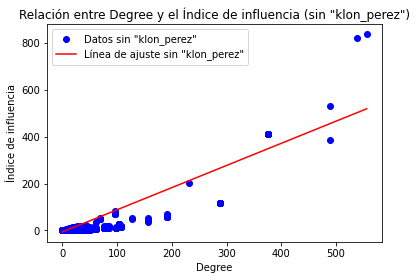

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una copia del DataFrame sin las filas del usuario "klon_perez"
df_cleaned = df[df['username'] != 'klon_perez']

# Datos de Degree y el índice de influencia (sin el usuario "klon_perez")
degree_cleaned = df_cleaned['Degree']
influencia_cleaned = df_cleaned['indice_influencia']

# Gráfico de dispersión sin el usuario "klon_perez"
plt.scatter(degree_cleaned, influencia_cleaned, color='blue', label='Datos sin "klon_perez"')

# Ajuste de la línea recta sin el usuario "klon_perez"
coefficients_cleaned = np.polyfit(degree_cleaned, influencia_cleaned, 1)
polynomial_cleaned = np.poly1d(coefficients_cleaned)
x_cleaned = np.linspace(min(degree_cleaned), max(degree_cleaned), 100)
plt.plot(x_cleaned, polynomial_cleaned(x_cleaned), color='red', label='Línea de ajuste sin "klon_perez"')

# Configuración del gráfico
plt.xlabel('Degree')
plt.ylabel('Índice de influencia')
plt.title('Relación entre Degree y el Índice de influencia (sin "klon_perez")')
plt.legend()

# Mostrar el gráfico
plt.show()

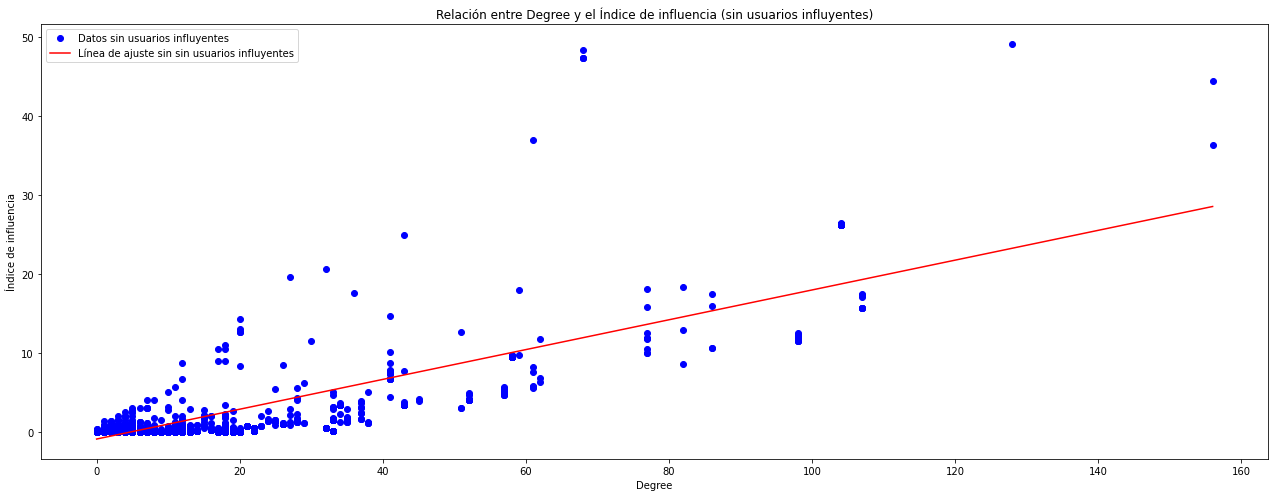

In [276]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una copia del DataFrame sin las filas del usuario "klon_perez"
df_cleaned = df[df['indice_influencia'] < 50] # usuarios menos influyentes

# Datos de Degree y el índice de influencia (sin el usuario "klon_perez")
degree_cleaned = df_cleaned['Degree']
influencia_cleaned = df_cleaned['indice_influencia']

# Gráfico de dispersión sin el usuario "klon_perez"
plt.figure(figsize=(22, 8))
plt.scatter(degree_cleaned, influencia_cleaned, color='blue', label='Datos sin usuarios influyentes')

# Ajuste de la línea recta sin el usuario "klon_perez"
coefficients_cleaned = np.polyfit(degree_cleaned, influencia_cleaned, 1)
polynomial_cleaned = np.poly1d(coefficients_cleaned)
x_cleaned = np.linspace(min(degree_cleaned), max(degree_cleaned), 100)

plt.plot(x_cleaned, polynomial_cleaned(x_cleaned), color='red', label='Línea de ajuste sin sin usuarios influyentes')

# Configuración del gráfico
plt.xlabel('Degree')
plt.ylabel('Índice de influencia')
plt.title('Relación entre Degree y el Índice de influencia (sin usuarios influyentes)')
plt.legend()

# Mostrar el gráfico

plt.show();

- **Nota: la variable relacion_50_pct determina exactamente el indice de influencia (Esta correlacionado fuertemente, segun este mapa), y este variable a su vez viene determinada en gran medida por el Degree.**

In [273]:
# 4. Calcular una medida de relación adicional: Además de la correlación, puedes utilizar otras medidas de relación, como el coeficiente de determinación (R^2), para evaluar la fuerza de la relación entre las variables. El coeficiente de determinación proporciona una medida de cuánta varianza en la variable "Degree" puede ser explicada por la otra variable.
from sklearn.linear_model import LinearRegression

Xlr = df_2[['indice_influencia']]
ylr = df_2['Degree']

model = LinearRegression()
model.fit(Xlr, ylr)

r_squared = model.score(Xlr, ylr)
r_squared

0.9326788937194945

- **Un valor alto de R^2 (cerca de 1) indicaría que la variable "Degree" explica una gran cantidad de la variabilidad en "Indice de influencia".**

#### Nota: Resumen resultados 
- **Los resultados obtenidos indican una alta correlación entre la variable "Degree" y la variable objetivo "indice de influencia". Tanto el coeficiente de correlación de Pearson (0.964) como el coeficiente de correlación de Spearman (0.932) son cercanos a 1, lo que sugiere una fuerte relación positiva entre las variables.**

- **Además, el valor de R^2 (0.930) indica que aproximadamente el 93% de la variabilidad en la variable objetivo puede ser explicada por la variable "Degree". Esto confirma que "Degree" es una variable importante para predecir el valor de "indice de influencia".**

- **Los valores de p-value (0.0) para ambos coeficientes de correlación indican que la probabilidad de obtener una correlación tan alta por azar es extremadamente baja, lo que refuerza la evidencia de una relación significativa entre las variables.**

- **El grafico parece ser mas bien una curva, pero si se observa al usuario con mayor Indice de Influencia, el cual funge como outlier, al retirarlo es probable que en lugar de una ligera curva se obtenga una linea recta.Lo cual tendria sentido por la caracteristica atipica que representa ser influyente.**

- **Al realizar el grafico sin el usuario mas influyente se aprecia mejor una distribucion lineal, sin embargo quedan usuarios influyentes que distorsionan la linea recta, habria que filtrarlos a partir de un umbral y observar nuevamente la relacion.**

- **En conclusión, estos resultados respaldan la importancia de la variable "Degree" para predecir la variable objetivo "indice de influencia" en tu modelo.**

### 4.8 Selección de variables

In [334]:
# Selección de variables:
from sklearn.feature_selection import SelectKBest, f_regression

# Cargar los datos

# Aplicar la selección de variables utilizando la prueba F
selector = SelectKBest(f_regression, k=2)
X_selected = selector.fit_transform(X, y)

# Obtener los índices de las variables seleccionadas
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de las variables seleccionadas
selected_variables = X.columns[selected_indices]

# Imprimir las variables seleccionadas
selected_variables

Index(['Degree', 'relacion_50_pct'], dtype='object')

- **En la selección de variables se utilizó la técnica de prueba F para identificar las variables más relevantes en el modelo. Mediante el uso de la función `SelectKBest` de la biblioteca scikit-learn, se seleccionaron las 2 variables con mayor relación con la variable objetivo. Los resultados indicaron que las variables seleccionadas fueron 'Degree' y 'relacion_50_pct', lo cual implica que estas dos variables tienen una mayor influencia en el modelo en comparación con las demás variables consideradas.**

### 4.9 Análisis de residuos

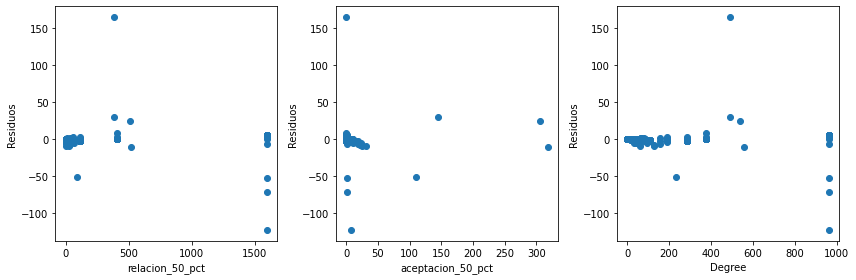

In [335]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Añadir una constante a la matriz de características
X_const = sm.add_constant(df_2[['relacion_50_pct', 'aceptacion_50_pct', 'Degree']])

# Ajustar el modelo de regresión
model = sm.OLS(df_2['indice_influencia'], X_const).fit()

# Obtener los residuos del modelo
residuals = model.resid

# Graficar los residuos en función de cada variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_2['relacion_50_pct'], residuals)
plt.xlabel('relacion_50_pct')
plt.ylabel('Residuos')

plt.subplot(1, 3, 2)
plt.scatter(df_2['aceptacion_50_pct'], residuals)
plt.xlabel('aceptacion_50_pct')
plt.ylabel('Residuos')

plt.subplot(1, 3, 3)
plt.scatter(df_2['Degree'], residuals)
plt.xlabel('Degree')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()

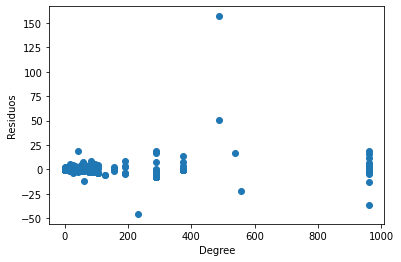

In [336]:
# Análisis de residuos:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar los datos
# data = pd.read_csv('datos.csv')
# X = data[['Variable1', 'Variable2', 'Variable3']]
# y = data['VariableObjetivo']

# Añadir una constante a la matriz de características
X_3 = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Obtener los residuos del modelo
residuals = model.resid

# Graficar los residuos en función de una variable específica
plt.scatter(X_3['Degree'], residuals)
plt.xlabel('Degree')
plt.ylabel('Residuos')
plt.show()

### 4.10 Coeficiente de determinación (R^2)
Para evaluar la bondad de ajuste del modelo de regresión. Este coeficiente indica la proporción de la varianza de la variable de respuesta que puede ser explicada por las variables independientes en el modelo.

In [330]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Crear un DataFrame con las variables de interés
data = pd.DataFrame({'relacion_50_pct': df_2['relacion_50_pct'],
                     'aceptacion_50_pct': df_2['aceptacion_50_pct'],
                     'Degree': df_2['Degree'],
                     'indice_influencia': df_2['indice_influencia']})

# Calcular el coeficiente de determinación para cada variable
results = []
for column in ['relacion_50_pct', 'aceptacion_50_pct', 'Degree']:
    Xlr = data[['indice_influencia']]
    ylr = data[column]

    model = LinearRegression()
    model.fit(Xlr, ylr)

    r_squared = model.score(Xlr, ylr)
    results.append({'Variable': column, 'Coeficiente de determinación (R^2)': r_squared})

# Crear un DataFrame con los resultados
df_r_squared = pd.DataFrame(results)
df_r_squared


,Variable,Coeficiente de determinación (R^2)
0,relacion_50_pct,0.997716
1,aceptacion_50_pct,0.012438
2,Degree,0.932679


### 4.11 - Top 10 Usuarios mas influyentes

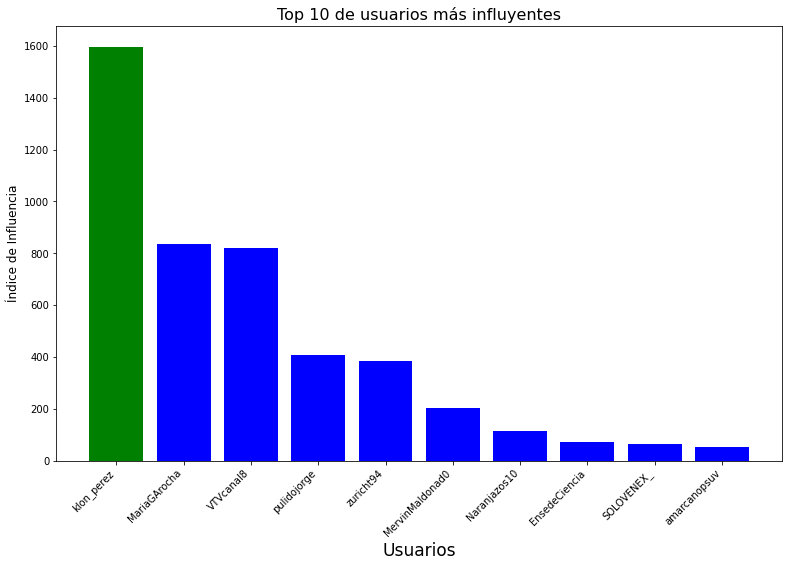

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtener los 10 usuarios más influyentes sin duplicados
usuarios_mas_influyentes = df.drop_duplicates(subset='username').nlargest(10, 'indice_influencia')

# Ordenar los usuarios por influencia de mayor a menor
usuarios_mas_influyentes = usuarios_mas_influyentes.sort_values('indice_influencia', ascending=False)

# Obtener el usuario con el mayor índice de influencia
usuario_max_influencia = usuarios_mas_influyentes.iloc[0]['username']

# Definir colores para las barras
colores = ['green' if usuario == usuario_max_influencia else 'blue' for usuario in usuarios_mas_influyentes['username']]

# Crear el gráfico de barras
plt.figure(figsize=(13, 8))
plt.bar(usuarios_mas_influyentes['username'], usuarios_mas_influyentes['indice_influencia'], color=colores)

# Ajustar el título y los ejes
plt.title('Top 10 de usuarios más influyentes', fontsize=16)
plt.xlabel('Usuarios', fontsize=17)
plt.ylabel('Índice de Influencia', fontsize=12)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


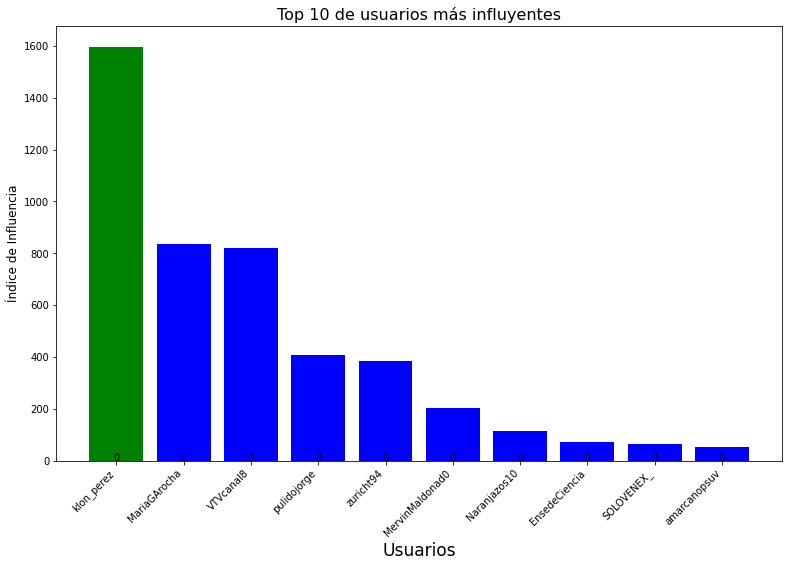

In [278]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los 10 usuarios más influyentes sin duplicados
usuarios_mas_influyentes = df.drop_duplicates(subset='username').nlargest(10, 'indice_influencia')

# Ordenar los usuarios por influencia de mayor a menor
usuarios_mas_influyentes = usuarios_mas_influyentes.sort_values('indice_influencia', ascending=False)

# Obtener el usuario con el mayor índice de influencia
usuario_max_influencia = usuarios_mas_influyentes.iloc[0]['username']

# Obtener los nombres de usuario y tipos de usuario
nombres_usuarios = usuarios_mas_influyentes['username'].tolist()
tipos_usuarios = usuarios_mas_influyentes['tipo_usuario'].tolist()

# Definir colores para las barras
colores = ['green' if usuario == usuario_max_influencia else 'blue' for usuario in nombres_usuarios]

# Crear el gráfico de barras
plt.figure(figsize=(13, 8))
plt.bar(nombres_usuarios, usuarios_mas_influyentes['indice_influencia'], color=colores)

# Ajustar el título y los ejes
plt.title('Top 10 de usuarios más influyentes', fontsize=16)
plt.xlabel('Usuarios', fontsize=17)
plt.ylabel('Índice de Influencia', fontsize=12)

# Agregar los tipos de usuario como etiquetas en el eje x
plt.xticks(rotation=45, ha='right')
for i, tipo_usuario in enumerate(tipos_usuarios):
    plt.text(i, -0.05, tipo_usuario, ha='center', fontsize=10)

# Mostrar el gráfico
plt.show()

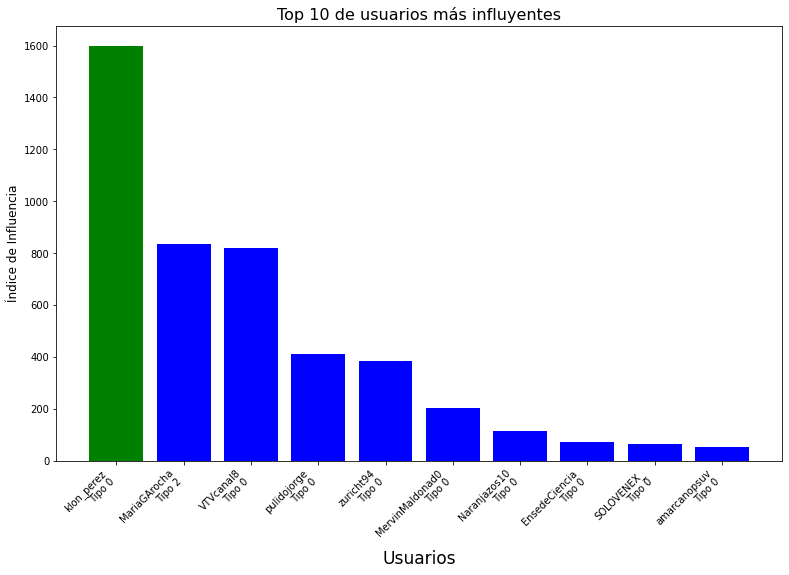

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los 10 usuarios más influyentes sin duplicados
usuarios_mas_influyentes = df.drop_duplicates(subset='username').nlargest(10, 'indice_influencia')

# Ordenar los usuarios por influencia de mayor a menor
usuarios_mas_influyentes = usuarios_mas_influyentes.sort_values('indice_influencia', ascending=False)

# Obtener el usuario con el mayor índice de influencia
usuario_max_influencia = usuarios_mas_influyentes.iloc[0]['username']

# Obtener los nombres de usuario y tipos de usuario
nombres_usuarios = usuarios_mas_influyentes['username'].tolist()
tipos_usuarios = usuarios_mas_influyentes['tipo_usuario'].tolist()

# Definir colores para las barras
colores = ['green' if usuario == usuario_max_influencia else 'blue' for usuario in nombres_usuarios]

# Crear el gráfico de barras
plt.figure(figsize=(13, 8))
plt.bar(nombres_usuarios, usuarios_mas_influyentes['indice_influencia'], color=colores)

# Ajustar el título y los ejes
plt.title('Top 10 de usuarios más influyentes', fontsize=16)
plt.xlabel('Usuarios', fontsize=17)
plt.ylabel('Índice de Influencia', fontsize=12)

# Modificar las etiquetas del eje x para incluir el tipo de usuario
etiquetas = [f'{usuario}\nTipo {tipo}' for usuario, tipo in zip(nombres_usuarios, tipos_usuarios)]
plt.xticks(range(len(nombres_usuarios)), etiquetas, rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

### 4.12 - Top 3 Usuarios mas influyentes

In [379]:
df.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name',
       ...
       'Y', 'Size', 'Color', 'count_user', 'reactions_name', 'tipo_usuario',
       'pageranks_desnormalizado', 'aceptacion_50_pct', 'relacion_50_pct',
       'indice_influencia'],
      dtype='object', length=108)

#### 4.12.1 - Primer Usuario mas influyente - klon_perez

In [380]:
df[df['username']=='klon_perez']['description'][:1]

24    Periodista / Narrador de fútbol
Name: description, dtype: object

In [381]:
df[df['username']=='klon_perez'][['followers','followings','tipo_usuario','likes_count','retweet_count','comments_count','quote_count','reactions_count','count_user','Degree','pageranks_desnormalizado','aceptacion_50_pct','relacion_50_pct','indice_influencia']].sort_values(['retweet_count'], ascending=False)[:10]

,followers,followings,tipo_usuario,likes_count,retweet_count,comments_count,quote_count,reactions_count,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia
5403,21105,614,0,1133,627,126,65,1951,47,961.0,3.324,6.670213,1597.182,1603.852213
5134,21105,614,0,219,92,19,8,338,47,961.0,3.324,0.978723,1597.182,1598.160723
6948,21105,614,0,176,73,63,22,334,47,961.0,3.324,0.776596,1597.182,1597.958596
1084,21151,614,0,810,73,316,38,1237,47,961.0,3.324,0.776596,1597.182,1597.958596
48,21151,614,0,397,69,52,7,525,47,961.0,3.324,0.734043,1597.182,1597.916043
4711,21105,614,0,431,56,182,32,701,47,961.0,3.324,0.595745,1597.182,1597.777745
4932,21105,614,0,352,35,86,17,490,47,961.0,3.324,0.372340,1597.182,1597.554340
663,21151,614,0,111,35,8,1,155,47,961.0,3.324,0.372340,1597.182,1597.554340
523,21151,614,0,249,27,25,5,306,47,961.0,3.324,0.287234,1597.182,1597.469234
5525,21105,614,0,76,19,7,0,102,47,961.0,3.324,0.202128,1597.182,1597.384128


#### 4.12.2 - Segundo Usuario mas influyente - MariaGArocha

In [382]:
df[df['username']=='MariaGArocha']['description'][:1]

2541    Venezolana, Portugueseña, Araureña.\n\n #LaJusticiaJamasVendraDeLosCulpables
Name: description, dtype: object

In [383]:
df[df['username']=='MariaGArocha'][['followers','followings','tipo_usuario','likes_count','retweet_count','comments_count','quote_count','reactions_count','count_user','Degree','pageranks_desnormalizado','aceptacion_50_pct','relacion_50_pct','indice_influencia']].sort_values(['retweet_count'], ascending=False)[:10]

,followers,followings,tipo_usuario,likes_count,retweet_count,comments_count,quote_count,reactions_count,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia
2541,8822,8907,2,336,636,4,5,981,1,556.0,1.8649,318.0,518.4422,836.4422


#### 4.12.3 - Tercer Usuario mas influyente - VTVcanal8

In [384]:
df[df['username']=='VTVcanal8']['description'][:1]

227    Somos Venezolana de Televisión, 24 horas en vivo  \nSíguenos: http://instagram.com/vtv_canal8/ | http://facebook.com/VTVtuCanal | http://youtube.com/c/multimedio
Name: description, dtype: object

In [385]:
df[df['username']=='VTVcanal8'][['followers','followings','tipo_usuario','likes_count','retweet_count','comments_count','quote_count','reactions_count','count_user','Degree','pageranks_desnormalizado','aceptacion_50_pct','relacion_50_pct','indice_influencia']].sort_values(['retweet_count'], ascending=False)[:10]

,followers,followings,tipo_usuario,likes_count,retweet_count,comments_count,quote_count,reactions_count,count_user,Degree,pageranks_desnormalizado,aceptacion_50_pct,relacion_50_pct,indice_influencia
227,2059585,437,0,45,612,2,16,675,1,538.0,1.905,306.0,512.445,818.445


### 4.13 - Top 10 Usuarios mas influyentes por tipo de usuario

In [248]:
usuarios = df['username']
followers = df['followers']
followings = df['followings']
tipos_usuario = df['tipo_usuario']

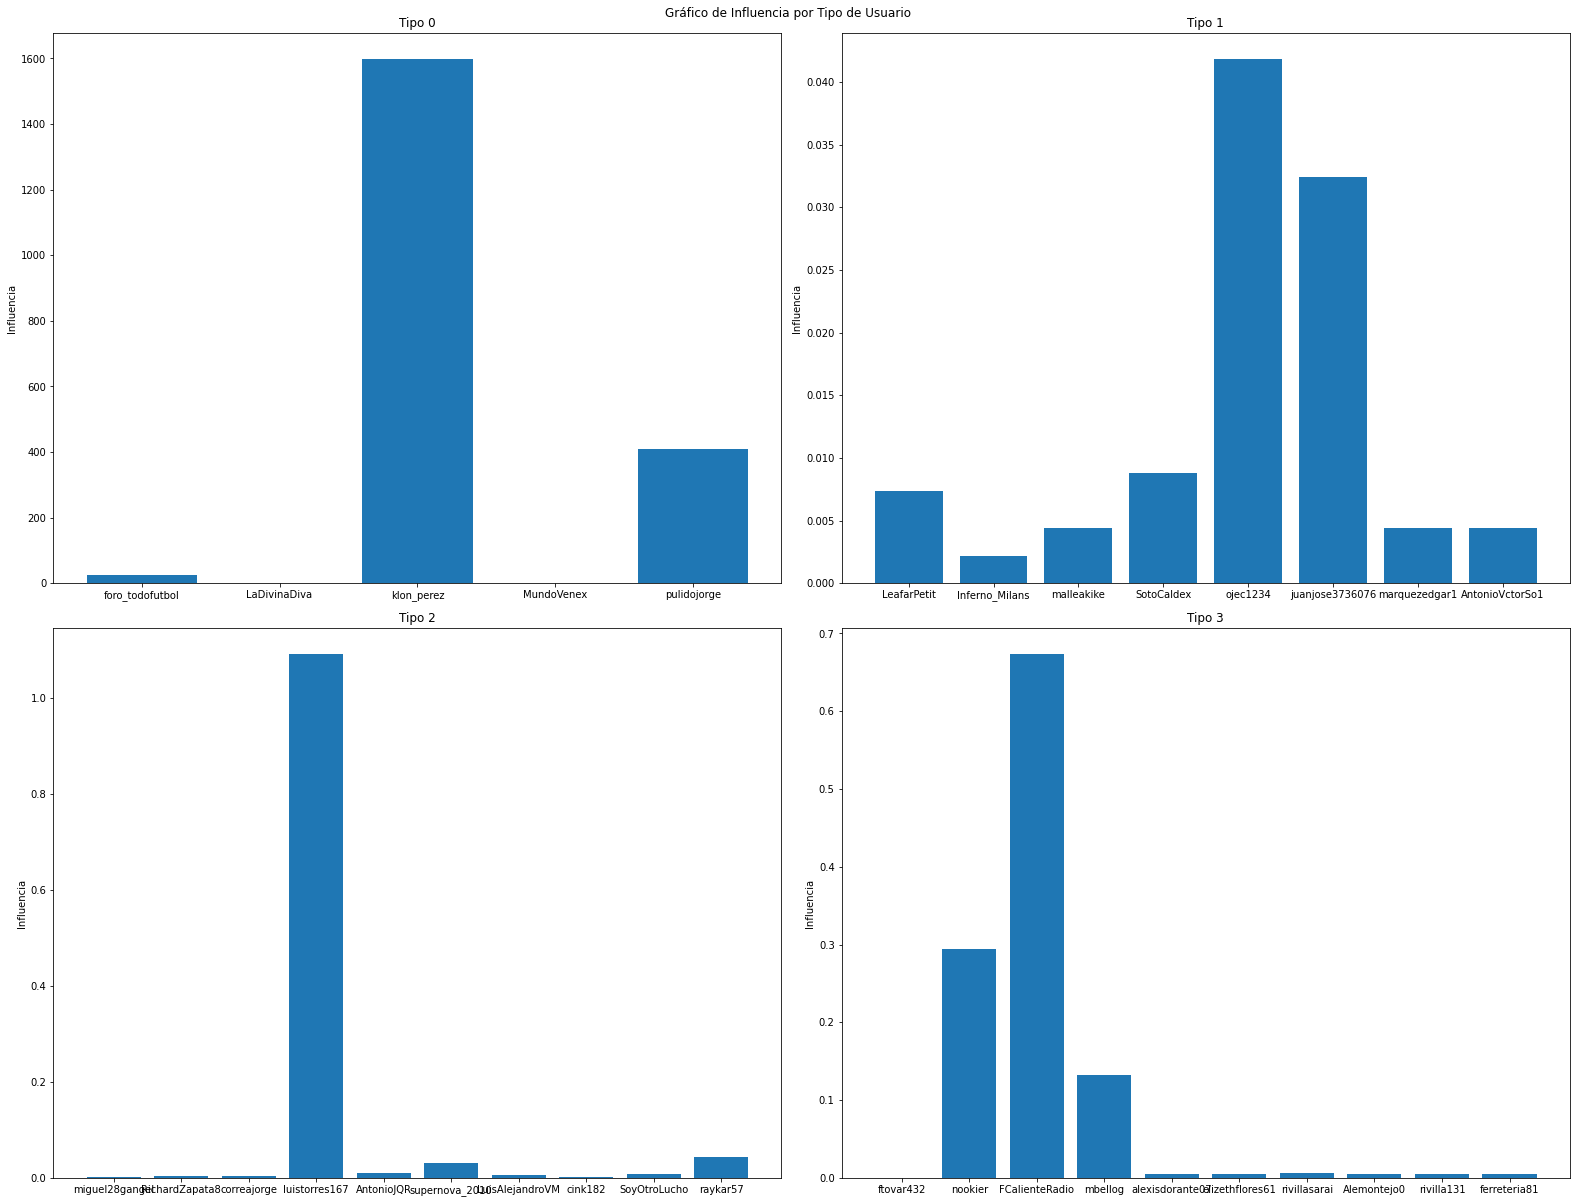

In [249]:
# Obtener los 10 usuarios más influyentes por tipo de usuario
usuarios_por_tipo = []
influencia_por_tipo = []
for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = usuarios[tipos_usuario == tipo][:10]  # Obtener los 10 usuarios más influyentes del tipo actual
    influencia_tipo = influencia[tipos_usuario == tipo][:10]  # Obtener los valores de influencia correspondientes
    usuarios_por_tipo.append(usuarios_tipo)
    influencia_por_tipo.append(influencia_tipo)

# Configuración del gráfico
fig, axs = plt.subplots(2, 2, figsize=(22, 17))  # 2 filas, 2 columnas de subplots
fig.suptitle('Gráfico de Influencia por Tipo de Usuario')

# Subplots
for i, ax in enumerate(axs.flat):
    ax.bar(usuarios_por_tipo[i], influencia_por_tipo[i])
    ax.set_title('Tipo {}'.format(i))
    ax.set_ylabel('Influencia')

# Ajustes de diseño
plt.tight_layout()
plt.show()

In [250]:
usuarios_por_tipo = []
influencia_por_tipo = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = df.loc[tipos_usuario == tipo, ['username', 'indice_influencia']].nlargest(10, 'indice_influencia')
    influencia_tipo = df.loc[tipos_usuario == tipo, 'indice_influencia'].nlargest(10)
    usuarios_por_tipo.append(usuarios_tipo)
    influencia_por_tipo.append(influencia_tipo)

# Imprimir los resultados
for i, tipo in enumerate([0, 1, 2, 3]):
    print(f"Usuarios más influyentes para el tipo {tipo}:")
    print(usuarios_por_tipo[i])
    print("\n")

Usuarios más influyentes para el tipo 0:
        username  indice_influencia
5403  klon_perez        1603.852213
5134  klon_perez        1598.160723
1084  klon_perez        1597.958596
6948  klon_perez        1597.958596
48    klon_perez        1597.916043
4711  klon_perez        1597.777745
663   klon_perez        1597.554340
4932  klon_perez        1597.554340
523   klon_perez        1597.469234
5525  klon_perez        1597.384128


Usuarios más influyentes para el tipo 1:
             username  indice_influencia
3657     LaVozDeJoseA           5.729900
546   venezuelamlibre           5.133100
6581  antonio_ceballo           3.666300
2726  antonio_ceballo           3.491300
6742  antonio_ceballo           3.491300
1233        gregarces           3.482656
136   antonio_ceballo           3.466300
1286  antonio_ceballo           3.466300
2713  antonio_ceballo           3.466300
3223  antonio_ceballo           3.466300


Usuarios más influyentes para el tipo 2:
            username  indi

In [251]:
usuarios_por_tipo = []
influencia_por_tipo = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    max_influencia_idx = df.loc[tipos_usuario == tipo, 'indice_influencia'].idxmax()
    usuario_max_influencia = df.loc[max_influencia_idx, ['username', 'indice_influencia']]
    usuarios_por_tipo.append(usuario_max_influencia)

# Imprimir los resultados
for i, tipo in enumerate([0, 1, 2, 3]):
    print(f"Usuario más influyente para el tipo {tipo}:")
    print(usuarios_por_tipo[i])
    print("\n")


Usuario más influyente para el tipo 0:
username              klon_perez
indice_influencia    1603.852213
Name: 5403, dtype: object


Usuario más influyente para el tipo 1:
username             LaVozDeJoseA
indice_influencia          5.7299
Name: 3657, dtype: object


Usuario más influyente para el tipo 2:
username             MariaGArocha
indice_influencia        836.4422
Name: 2541, dtype: object


Usuario más influyente para el tipo 3:
username             aranguismo18
indice_influencia        25.02625
Name: 1082, dtype: object




In [252]:
usuarios_por_tipo = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = df.loc[tipos_usuario == tipo, ['username', 'indice_influencia']]
    usuarios_tipo = usuarios_tipo.drop_duplicates(subset='username')  # Eliminar duplicados de usuarios
    usuarios_tipo = usuarios_tipo.nlargest(10, 'indice_influencia')  # Obtener los 10 usuarios con mayor influencia
    usuarios_por_tipo.append(usuarios_tipo)

# Imprimir los resultados
for i, tipo in enumerate([0, 1, 2, 3]):
    print(f"Usuarios más influyentes para el tipo {tipo}:")
    print(usuarios_por_tipo[i])
    print("\n")

Usuarios más influyentes para el tipo 0:
             username  indice_influencia
24         klon_perez        1597.182000
227         VTVcanal8         818.445000
62        pulidojorge         409.031250
2942        zuricht94         384.720750
2659  MervinMaldonad0         203.396650
628      Naranjazos10         115.387200
1599    EnsedeCiencia          70.339200
96         SOLOVENEX_          64.933567
447      amarcanopsuv          51.705600
1601    RincnCuriosoo          47.368800


Usuarios más influyentes para el tipo 1:
             username  indice_influencia
3657     LaVozDeJoseA            5.72990
136   antonio_ceballo            3.46630
852         gregarces            3.42710
1905   LaBellaBella36            3.07500
5358        gutimedin            3.04935
5777      SilanoRivas            2.54850
4059    JuanHenao1901            2.02360
6151      simonscolta            2.01640
277         Willy_G_8            1.70700
44         SegaBros09            1.65850


Usuarios más

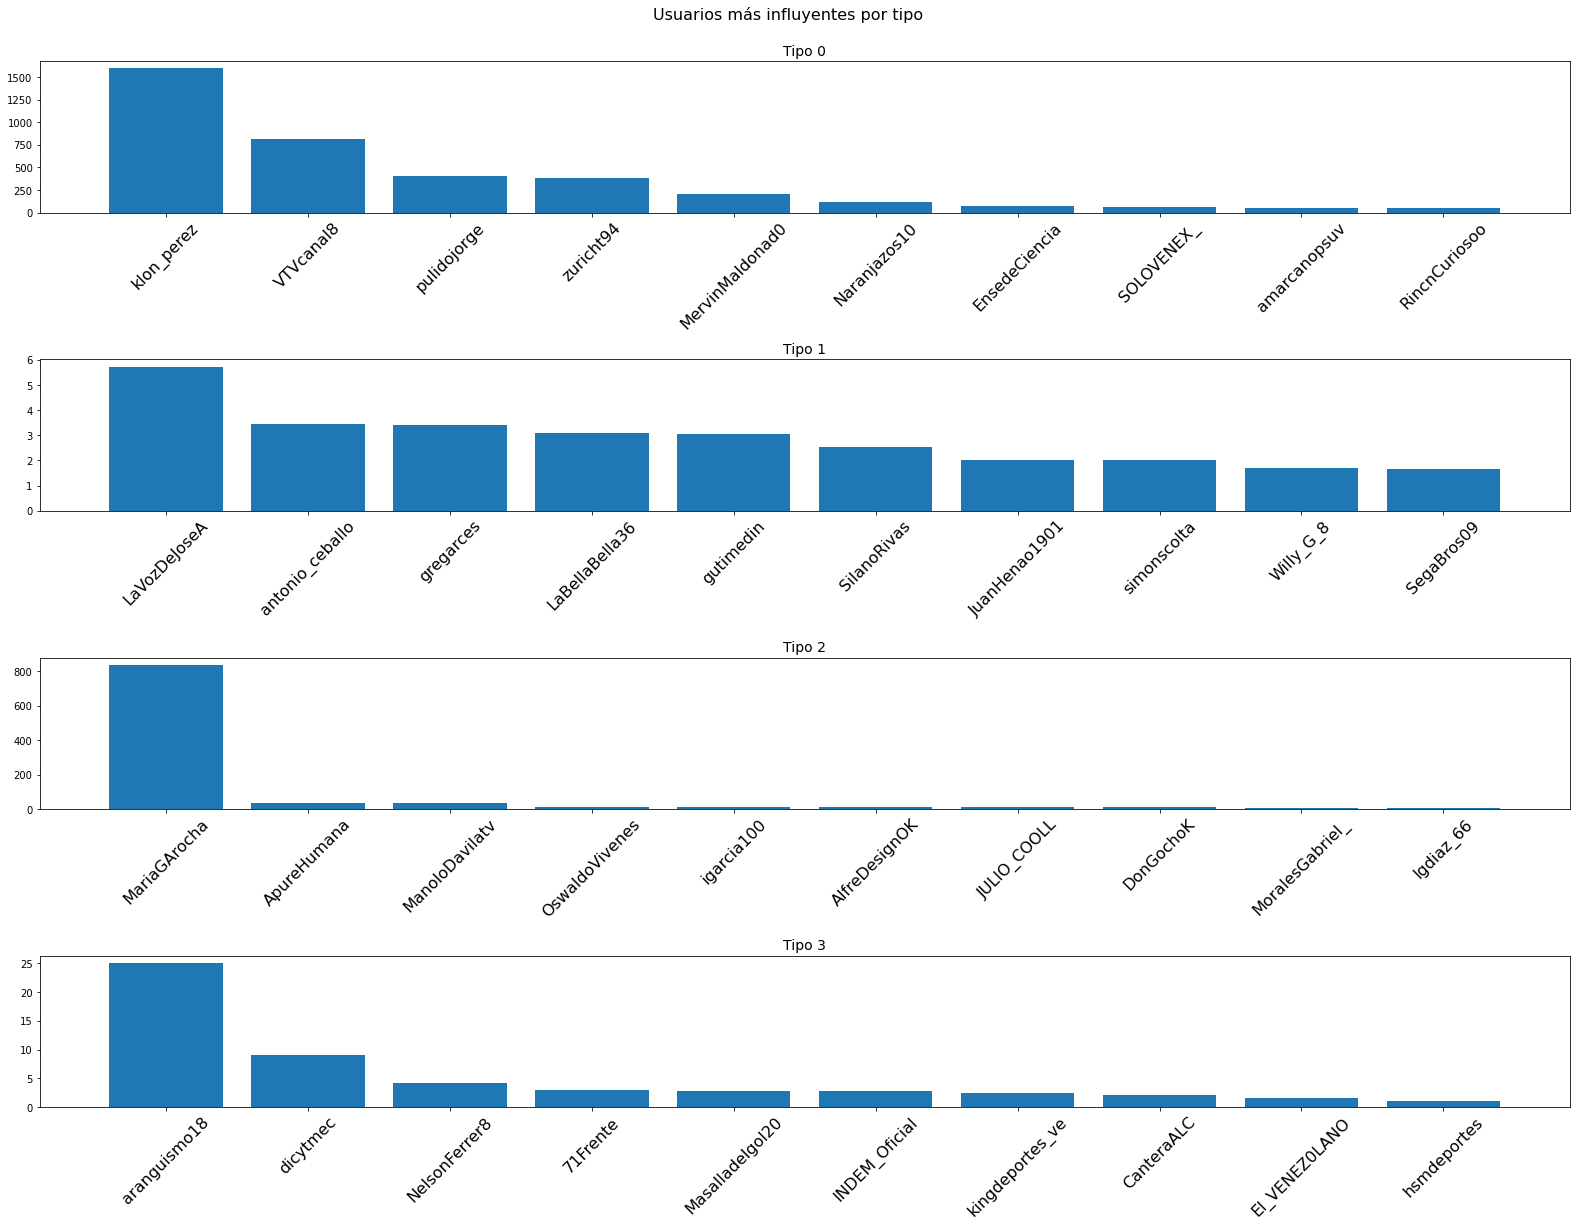

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

usuarios_por_tipo_dfs = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = df.loc[tipos_usuario == tipo, ['username', 'indice_influencia']]
    usuarios_tipo = usuarios_tipo.drop_duplicates(subset='username')  # Eliminar duplicados de usuarios
    usuarios_tipo = usuarios_tipo.nlargest(10, 'indice_influencia')  # Obtener los 10 usuarios con mayor influencia
    usuarios_por_tipo_dfs.append(usuarios_tipo)

# Crear el gráfico de subplots
fig, axs = plt.subplots(4, 1, figsize=(22, 17))
fig.suptitle('Usuarios más influyentes por tipo', fontsize=16, y=1)

# Graficar cada tipo de usuario en un subplot
for i, tipo in enumerate([0, 1, 2, 3]):
    usuarios_tipo_df = usuarios_por_tipo_dfs[i]
    axs[i].bar(usuarios_tipo_df['username'], usuarios_tipo_df['indice_influencia'])
    axs[i].set_title(f'Tipo {tipo}', fontsize=14)
    axs[i].tick_params(axis='x', rotation=45, labelsize=16)

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


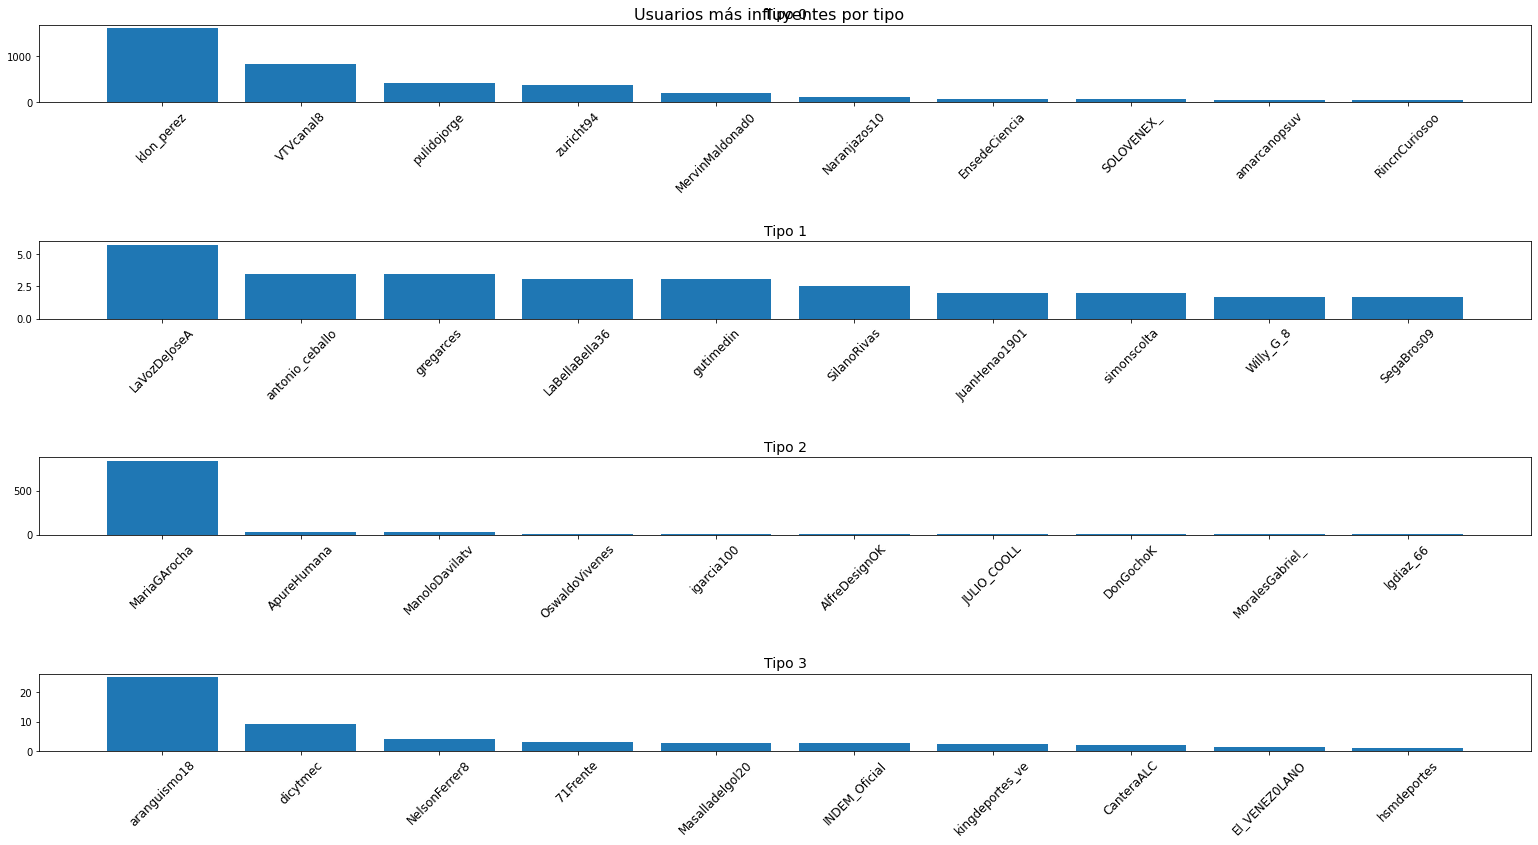

In [254]:
import pandas as pd
import matplotlib.pyplot as plt

usuarios_por_tipo_dfs = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = df.loc[tipos_usuario == tipo, ['username', 'indice_influencia']]
    usuarios_tipo = usuarios_tipo.drop_duplicates(subset='username')  # Eliminar duplicados de usuarios
    usuarios_tipo = usuarios_tipo.nlargest(10, 'indice_influencia')  # Obtener los 10 usuarios con mayor influencia
    usuarios_por_tipo_dfs.append(usuarios_tipo)

# Crear el gráfico de subplots
fig, axs = plt.subplots(4, 1, figsize=(22, 13))
fig.suptitle('Usuarios más influyentes por tipo', fontsize=16, y=0.92)  # Ajustar fontsize y y

# Graficar cada tipo de usuario en un subplot
for i, tipo in enumerate([0, 1, 2, 3]):
    usuarios_tipo_df = usuarios_por_tipo_dfs[i]
    axs[i].bar(usuarios_tipo_df['username'], usuarios_tipo_df['indice_influencia'])
    axs[i].set_title(f'Tipo {tipo}', fontsize=14)  # Ajustar fontsize
    axs[i].tick_params(axis='x', rotation=45, labelsize=12)  # Ajustar fontsize

# Ajustar los espacios entre subplots
plt.tight_layout(pad=3)  # Aumentar el espacio entre subplots

# Mostrar el gráfico
plt.show()


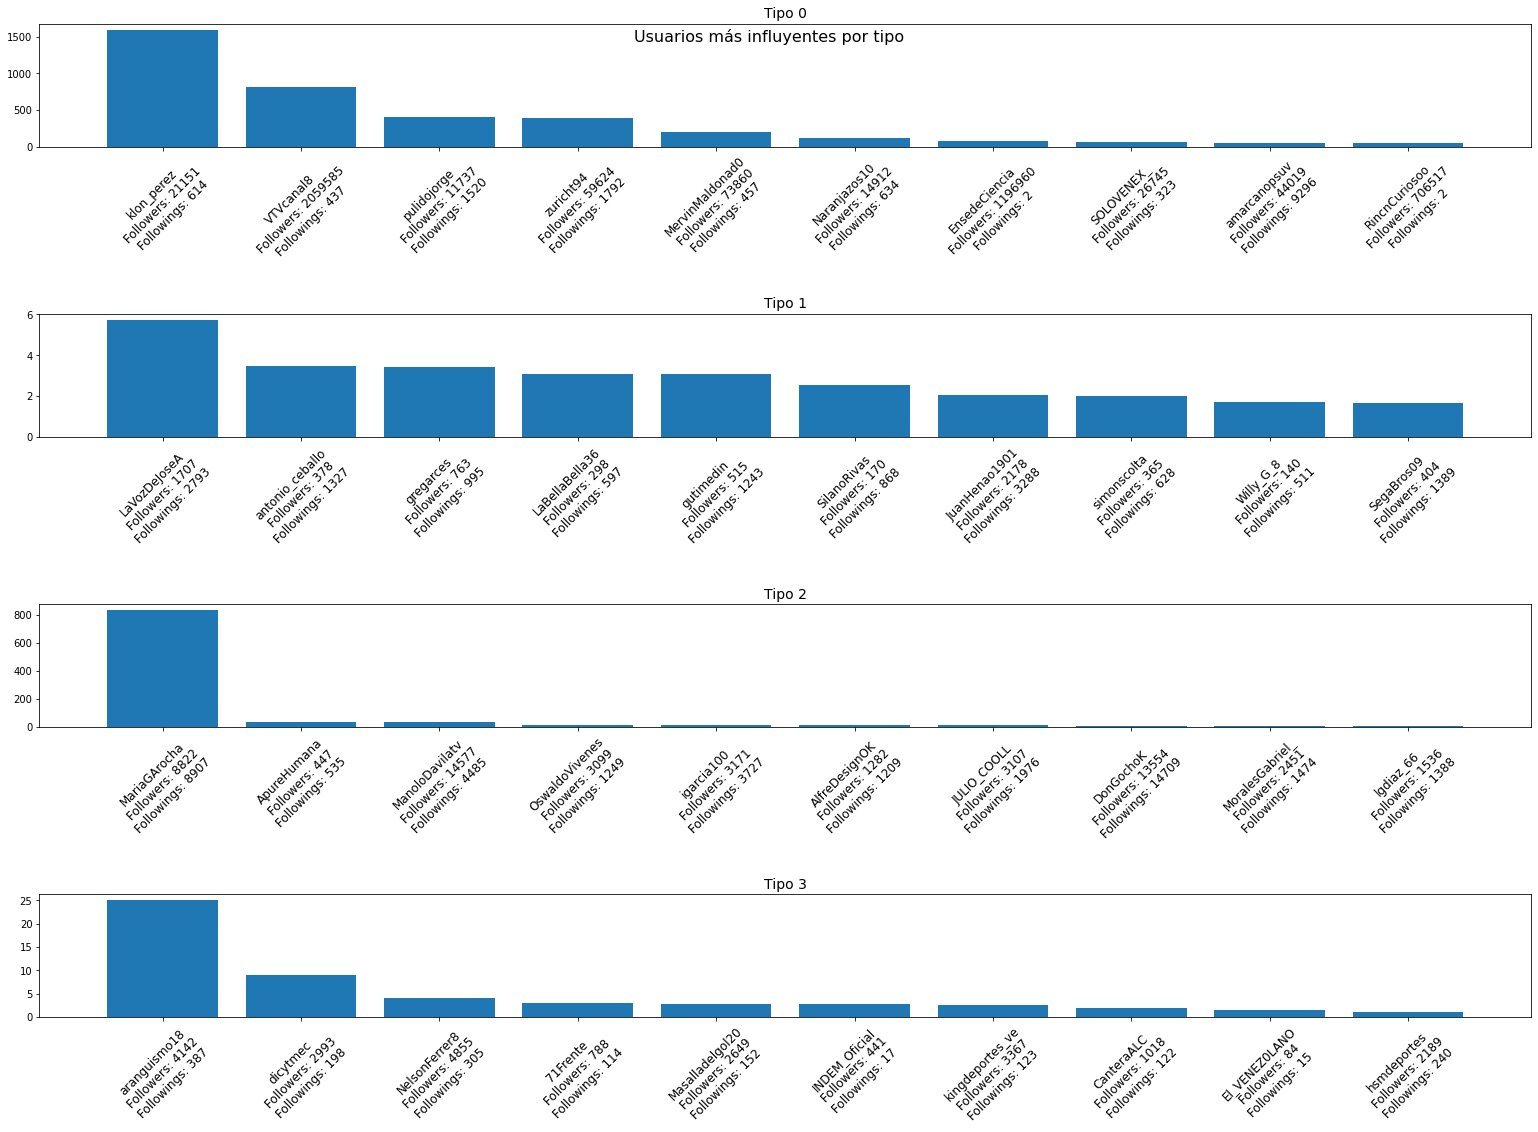

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

usuarios_por_tipo_dfs = []

for tipo in [0, 1, 2, 3]:  # Reemplaza [0, 1, 2, 3] con los valores reales de los tipos de usuario en tu DataFrame
    usuarios_tipo = df.loc[tipos_usuario == tipo, ['username', 'indice_influencia', 'followers', 'followings']]
    usuarios_tipo = usuarios_tipo.drop_duplicates(subset='username')  # Eliminar duplicados de usuarios
    usuarios_tipo = usuarios_tipo.nlargest(10, 'indice_influencia')  # Obtener los 10 usuarios con mayor influencia
    usuarios_por_tipo_dfs.append(usuarios_tipo)

# Crear el gráfico de subplots
fig, axs = plt.subplots(4, 1, figsize=(22, 17))
fig.suptitle('Usuarios más influyentes por tipo', fontsize=16, y=0.92)  # Ajustar fontsize y y

# Graficar cada tipo de usuario en un subplot
for i, tipo in enumerate([0, 1, 2, 3]):
    usuarios_tipo_df = usuarios_por_tipo_dfs[i]
    usuarios = usuarios_tipo_df['username']
    followers = usuarios_tipo_df['followers']
    followings = usuarios_tipo_df['followings']
    labels = [f'{usuario}\nFollowers: {follower}\nFollowings: {following}' for usuario, follower, following in zip(usuarios, followers, followings)]
    axs[i].bar(labels, usuarios_tipo_df['indice_influencia'])
    axs[i].set_title(f'Tipo {tipo}', fontsize=14)  # Ajustar fontsize
    axs[i].tick_params(axis='x', rotation=45, labelsize=12)  # Ajustar fontsize

# Ajustar los espacios entre subplots
plt.tight_layout(pad=3)  # Aumentar el espacio entre subplots

# Mostrar el gráfico
plt.show()

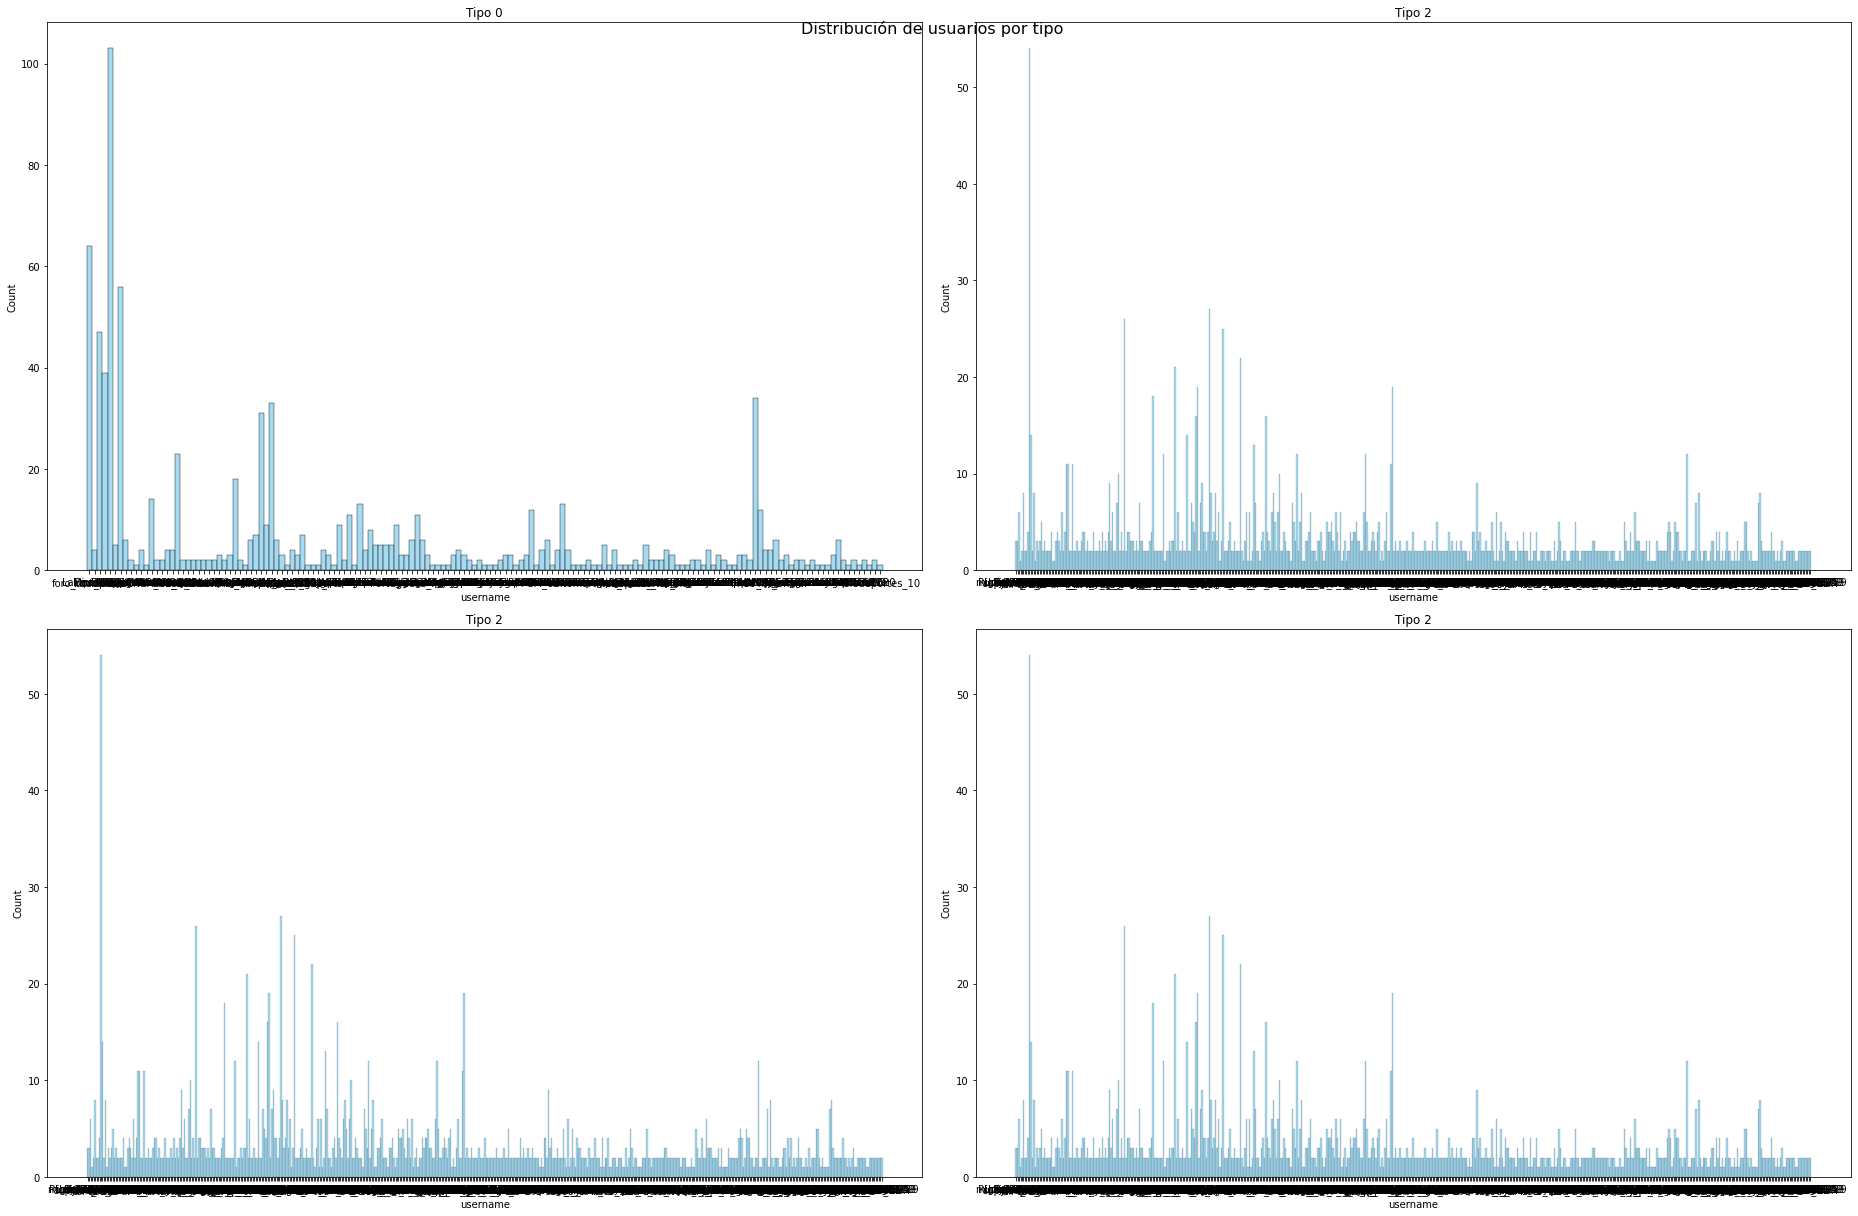

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los usuarios únicos por tipo de usuario
usuarios_tipo = df.drop_duplicates(subset='username')['tipo_usuario']

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(26, 17))

# Iterar sobre los subplots y los tipos de usuario
for ax, tipo_usuario in zip(axs.flatten(), usuarios_tipo):
    # Filtrar los usuarios por tipo de usuario
    usuarios_filtrados = df[df['tipo_usuario'] == tipo_usuario]['username']
    # Crear el histograma
    sns.histplot(data=usuarios_filtrados, ax=ax, color='skyblue')
    # Ajustar el título de cada subplot
    ax.set_title(f'Tipo {tipo_usuario}')
    # Ajustar el tamaño de la fuente
    ax.tick_params(axis='both', labelsize=10)
    

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Añadir un título general
plt.suptitle('Distribución de usuarios por tipo', fontsize=16)

# Mostrar el gráfico
plt.show()


# 5. Exportar modelo escogido

In [261]:
import joblib
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train_scaled, y_train)
# Guardar el modelo en un archivo
# joblib.dump(lr, 'modelo_lr_tf_idf_19052023.pkl') #19052023
# joblib.dump(lr, 'modelo_LinearRegression_TipoUsuario_IndiceInfluencia__01062023.pkl') #01062023
joblib.dump(lr, 'modelo_LinearRegression_TipoUsuario_IndiceInfluencia__07062023.pkl') #07062023

['modelo_LinearRegression_TipoUsuario_IndiceInfluencia__07062023.pkl']

In [262]:
import joblib
xgb = XGBRegressor(**clf_4.best_params_)
xgb.fit(X_train_scaled, y_train)
# Guardar el modelo en un archivo
# joblib.dump(lr, 'modelo_lr_tf_idf_19052023.pkl') #19052023
# joblib.dump(lr, 'modelo_XGBRegressor_TipoUsuario_IndiceInfluencia__29052023.pkl') #22052023
joblib.dump(lr, 'modelo_XGBRegressor_TipoUsuario_IndiceInfluencia__07062023.pkl') #22052023

['modelo_XGBRegressor_TipoUsuario_IndiceInfluencia__07062023.pkl']

In [263]:
import joblib
lgbm = lgb.LGBMRegressor(**clf_5.best_params_)
lgbm.fit(X_train_scaled, y_train)
# Guardar el modelo en un archivo
joblib.dump(lr, 'modelo_LGBMRegressor_TipoUsuario_IndiceInfluencia__07062023.pkl') #22052023

['modelo_LGBMRegressor_TipoUsuario_IndiceInfluencia__07062023.pkl']

In [ ]:
# Cargar el modelo desde el archivo
# # lr_loaded = joblib.load('modelo_lr_tf_idf_19052023.pkl')
# lr_loaded = joblib.load('modelo_lr_tf_idf_22052023.pkl')

In [ ]:
# # Cargar el modelo desde el archivo
# # lr_loaded = joblib.load('modelo_lr_tf_idf_19052023.pkl')
# lr_loaded = joblib.load('modelo_lr_tf_idf_22052023.pkl')

# 6. Graph Neural Network (Red neuronal de grafos)

In [207]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import networkx as nx
import dgl

# Definir el modelo GCN
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = dgl.nn.pytorch.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.pytorch.GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

In [208]:
# # Dividir los datos en conjunto de entrenamiento y conjunto de prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [209]:
# Creamos el grafo, agregando los atributos y aristas
G=nx.DiGraph()
G.clear()
G.add_nodes_from(df['username'].tolist())

nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['followers'].tolist())), 'followers' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['followings'].tolist())), 'followings' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['listed_count'].tolist())), 'listed_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['favourites_count'].tolist())), 'favourites_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['likes_count'].tolist())), 'likes_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['retweet_count'].tolist())), 'retweet_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['quote_count'].tolist())), 'quote_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['comments_count'].tolist())), 'comments_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['statuses_count'].tolist())), 'statuses_count' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['tipo_usuario'].tolist())), 'tipo_usuario' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['count_user'].tolist())), 'count_user' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['Degree'].tolist())), 'Degree' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['pageranks_desnormalizado'].tolist())), 'pageranks_desnormalizado' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['aceptacion_50_pct'].tolist())), 'aceptacion_50_pct' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['relacion_50_pct'].tolist())), 'relacion_50_pct' 
                      )
nx.set_node_attributes(G, 
                       dict(zip(df['username'].tolist(), df['indice_influencia'].tolist())), 'indice_influencia' 
                      )

for index, row in df.iterrows():
    node = row['username']
    if pd.notnull(row['retweet_screen_name']) and row['retweet_screen_name']!=0: # si reply, le agregamos un loop
        G.add_edge(node, row['retweet_screen_name'], weight = 0.5)


for index, row in df.iterrows():
    node = row['username']
    if pd.notnull(row['in_reply_to_screen_name']) and row['in_reply_to_screen_name']!=0: # si reply, le agregamos un loop
#         if row['in_reply_to_screen_name']!=0: # si es RT, le agregamos un loop
        G.add_edge(node, row['in_reply_to_screen_name'], weight = 1.0)

for index, row in df.iterrows():
    node = row['username']
    if pd.notnull(row['quote_screen_name']) and row['quote_screen_name']!=0: # si reply, le agregamos un loop
            G.add_edge(node, row['quote_screen_name'], weight = 2.0)

In [210]:
# Mostrar la información de cada nodo
dict(G.nodes(data=True))

{'foro_todofutbol': {'followers': 17743,
  'followings': 4114,
  'listed_count': 214,
  'favourites_count': 494,
  'likes_count': 18,
  'retweet_count': 1,
  'quote_count': 0,
  'comments_count': 8,
  'statuses_count': 16743,
  'tipo_usuario': 0,
  'count_user': 64,
  'Degree': 104.0,
  'pageranks_desnormalizado': 0.5057,
  'aceptacion_50_pct': 0.0078125,
  'relacion_50_pct': 26.296400000000002,
  'indice_influencia': 26.304212500000002},
 'miguel28gangel': {'followers': 1430,
  'followings': 1773,
  'listed_count': 10,
  'favourites_count': 8738,
  'likes_count': 0,
  'retweet_count': 0,
  'quote_count': 0,
  'comments_count': 0,
  'statuses_count': 140642,
  'tipo_usuario': 2,
  'count_user': 3,
  'Degree': 1.0,
  'pageranks_desnormalizado': 0.0044,
  'aceptacion_50_pct': 0.0,
  'relacion_50_pct': 0.0022,
  'indice_influencia': 0.0022},
 'RichardZapata8': {'followers': 2236,
  'followings': 2418,
  'listed_count': 6,
  'favourites_count': 21815,
  'likes_count': 0,
  'retweet_count':

In [211]:
# Acceder a la información de un nodo especifico (en este caso el nodo con id=1)
G.nodes(data=True)['foro_todofutbol']

{'followers': 17743,
 'followings': 4114,
 'listed_count': 214,
 'favourites_count': 494,
 'likes_count': 18,
 'retweet_count': 1,
 'quote_count': 0,
 'comments_count': 8,
 'statuses_count': 16743,
 'tipo_usuario': 0,
 'count_user': 64,
 'Degree': 104.0,
 'pageranks_desnormalizado': 0.5057,
 'aceptacion_50_pct': 0.0078125,
 'relacion_50_pct': 26.296400000000002,
 'indice_influencia': 26.304212500000002}

In [212]:
# Obtener la matriz de adyacencia del grafo
adjacency_matrix = nx.to_numpy_array(G)

In [213]:
import torch.optim as optim
import torch.nn as nn
   
# Definir el modelo
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.GraphConv(hidden_size, num_classes)
    
    def forward(self, g, features):
        x = torch.relu(self.conv1(g, features))
        x = self.conv2(g, x)
        return x

In [215]:
# Convertir los datos de entrenamiento a tensores de PyTorch
X_train = torch.tensor(X_train.values)
y_train = torch.tensor(y_train.values)

# Crear el grafo de entrenamiento
G_train = dgl.from_networkx(X_train)

AttributeError: 'Tensor' object has no attribute 'is_directed'

In [216]:
# Crear el grafo de entrenamiento
G_train = dgl.from_networkx(G_train, edge_attrs=None)
if not G_train.is_block:
    G_train.add_edges(zero_indegree_nodes, zero_indegree_nodes)  # Agregar self-loops al grafo de entrenamiento

NameError: name 'G_train' is not defined

In [218]:
# Definir los hiperparámetros
input_size = X_train.shape[1]
hidden_size = 16
num_classes = 1
learning_rate = 0.01
num_epochs = 100

In [219]:
# Crear el modelo y definir la función de pérdida
model = GCN(input_size, hidden_size, num_classes)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [220]:
# Convertir los datos de entrenamiento a DGLGraph
G_train = nx.from_numpy_array(adjacency_matrix)
G_train = dgl.DGLGraph(X_train)
G_train = dgl.add_self_loop(G_train)

DGLError: ('Unsupported graph data type:', <class 'torch.Tensor'>)

In [222]:
# Obtener los índices de los nodos con grado de entrada igual a cero
zero_indegree_nodes = (X_train.in_degrees() == 0).nonzero(as_tuple=True)[0]

# Agregar self-loops a los nodos con grado de entrada igual a cero
X_train.add_edges(zero_indegree_nodes, zero_indegree_nodes)

AttributeError: 'Tensor' object has no attribute 'in_degrees'

In [223]:
# Entrenamiento del modelo
model.train()
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(G_train, X_train)
    loss = criterion(outputs, y_train)

    # Backward y optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

AttributeError: 'Graph' object has no attribute 'local_scope'

In [224]:
# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    G_test = nx.from_numpy_array(adjacency_matrix)
    G_test = dgl.DGLGraph(G_test)
    outputs = model(G_test, X_test)
    loss = criterion(outputs, y_test)
    print('Loss en el conjunto de prueba: {:.4f}'.format(loss.item()))

DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

In [ ]:
# 'followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count','tipo_usuario','count_user',
#      'Degree', 'pageranks_desnormalizado','aceptacion_50_pct', 'relacion_50_pct', 'indice_influencia'

In [225]:
# Convertir los datos a numpy arrays
X_1 = X.to_numpy()
y_1 = y.to_numpy()

# Escalar las características
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=35)

# Generar la matriz de adyacencia utilizando NetworkX
adjacency_matrix = nx.to_numpy_array(G)

In [226]:
# Convertir los datos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

TypeError: expected TensorOptions(dtype=float, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)) (got TensorOptions(dtype=double, device=cpu, layout=Strided, requires_grad=false (default), pinned_memory=false (default), memory_format=(nullopt)))

In [227]:
# Crear el grafo utilizando NetworkX y convertirlo a DGLGraph
G = nx.from_numpy_array(adjacency_matrix)
G = dgl.DGLGraph(G)

In [228]:


# Definir los parámetros del modelo
in_feats = X_train.shape[1]
hidden_size = 64
num_classes = 1

# Crear instancia del modelo GCN
model_gcn = GCN(in_feats, hidden_size, num_classes)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer_gcn = optim.Adam(model_gcn.parameters(), lr=0.01)

# Entrenar el modelo GCN
model_gcn.train()
num_epochs = 100
for epoch in range(num_epochs):
    optimizer_gcn.zero_grad()
    outputs = model_gcn(G, X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_gcn.step()

# Evaluar el modelo GCN en conjunto de prueba
model_gcn.eval()
with torch.no_grad():
    y_pred_gcn = model_gcn(G, X_test)

# Calcular las métricas de evaluación
rmse_gcn = np.sqrt(mean_squared_error(y_test, y_pred_gcn))
mae_gcn = mean_absolute_error(y_test, y_pred_gcn)
r2_gcn = r2_score(y_test, y_pred_gcn)
medae_gcn = median_absolute_error(y_test, y_pred_gcn)

# Imprimir los resultados
print("Métricas de evaluación para el modelo GCN:")
print("RMSE:", rmse_gcn)
print("MAE:", mae_gcn)
print("R2 Score:", r2_gcn)
print("Median Absolute Error:", medae_gcn)

DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

#### ¡¡¡¡Gracias, gracias e infinitas gracias!!!!